In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Data Cleaning

In [3]:

data = pd.read_excel("Advogados I - Quant Final_20 de fevereiro de 2025_12.57 2.xlsx")
data.head()

/Users/jgfaraco/miniconda3/envs/env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


StartDate              EndDate            Status  \
0       Data de início           Data final  Tipo de resposta   
1  2024-11-12 09:07:32  2024-11-12 09:11:22                 0   
2  2024-11-12 09:15:29  2024-11-12 09:17:55                 0   
3  2024-11-12 09:11:15  2024-11-12 09:18:51                 0   
4  2024-11-12 09:25:14  2024-11-12 09:27:13                 0   

         IPAddress   Progress  Duration (in seconds)   Finished  \
0      Endereço IP  Progresso  Duração (em segundos)  Concluído   
1    177.92.69.242        100                    230          1   
2    201.90.31.146        100                    145          1   
3  189.112.183.243        100                    456          1   
4   104.30.160.205        100                    118          1   

                 RecordedDate         ResponseId          RecipientLastName  \
0             Data registrada     ID de resposta  Sobrenome do destinatário   
1  2024-11-12 09:11:23.604000  R_5PA2Aug4ctEytBv                        NaN   
2  2024-11-12 09:17:56.591000  R_1NKCetfrI9y788G                        NaN   
3  2024-11-12 09:18:52.620000  R_52DcY160wHLcsJc                        NaN   
4  2024-11-12 09:27:13.686000  R_5ghYNGhVRigNfyX                        NaN   

   ...                                               Q10A  \
0  ...  Por qual motivo você contratou advogados tempo...   
1  ...                                                NaN   
2  ...                                                NaN   
3  ...                                                  2   
4  ...                                                NaN   

                                         Q10A_7_TEXT  \
0  Por qual motivo você contratou advogados tempo...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                Q10B  \
0  Por qual motivo você nunca contratou advogados...   
1                                                  7   
2                                                  1   
3                                                NaN   
4                                                1,2   

                                         Q10B_7_TEXT  \
0  Por qual motivo você nunca contratou advogados...   
1  o recurso para o secondment é consumido do jur...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                 Q11  \
0  Você pretende utilizar o serviço de advogados ...   
1                                                  1   
2                                                  1   
3                                                  1   
4                                                  2   

                                          Q11_2_TEXT  \
0  Você pretende utilizar o serviço de advogados ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                Não tenho interesse   

                                          Q11_3_TEXT  \
0  Você pretende utilizar o serviço de advogados ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                 Q12  \
0  Quais empresas você enxerga como referência no...   
1                                                  4   
2                                                  4   
3                                                  5   
4                                                  5   

                  

In [4]:
data.describe()

StartDate     EndDate  Status    IPAddress  Progress  \
count               33          33      33           32        33   
unique              33          33       3           32         3   
top     Data de início  Data final       0  Endereço IP       100   
freq                 1           1      31            1        27   

        Duration (in seconds)  Finished     RecordedDate      ResponseId  \
count                      33        33               33              33   
unique                     31         3               33              33   
top                        43         1  Data registrada  ID de resposta   
freq                        2        27                1               1   

                RecipientLastName  ... Q10A  \
count                           1  ...   18   
unique                          1  ...   11   
top     Sobrenome do destinatário  ...    2   
freq                            1  ...    4   

                                              Q10A_7_TEXT Q10B  \
count                                                   4   10   
unique                                                  4    9   
top     Por qual motivo você contratou advogados tempo...    2   
freq                                                    1    2   

                                              Q10B_7_TEXT  Q11  \
count                                                   3   27   
unique                                                  3    4   
top     Por qual motivo você nunca contratou advogados...    1   
freq                                                    1   14   

                                               Q11_2_TEXT  \
count                                                   7   
unique                                                  7   
top     Você pretende utilizar o serviço de advogados ...   
freq                                                    1   

                                               Q11_3_TEXT Q12  \
count                                                   7  27   
unique                                                  7   8   
top     Você pretende utilizar o serviço de advogados ...   4   
freq                                                    1  11   

                                               Q12_6_TEXT  \
count                                                   5   
unique                                                  5   
top     Quais empresas você enxerga como referência no...   
freq                                                    1   

                                                      Q13  
count                                                   8  
unique                                                  8  
top     Você gostaria de fazer alguma observação, suge...  
freq                                                    1  

[4 rows x 40 columns]

In [5]:
'''
Dropando categorias inuteis
'''
data = data.drop("StartDate", axis=1)
data = data.drop("EndDate", axis=1)
data = data.drop("Status", axis=1)
data = data.drop("IPAddress", axis=1)
data = data.drop("Progress", axis=1)
data = data.drop("Duration (in seconds)", axis=1)
data = data.drop("Finished", axis=1)
data = data.drop("RecordedDate", axis=1)
data = data.drop("ResponseId", axis=1)
data = data.drop("RecipientLastName", axis=1)
data = data.drop("RecipientFirstName", axis=1)
data = data.drop("RecipientEmail", axis=1)
data = data.drop("ExternalReference", axis=1)
data = data.drop("DistributionChannel", axis=1)
data = data.drop("UserLanguage", axis=1)

In [6]:
data.head()

LocationLatitude   LocationLongitude                    Q1  \
0  Latitude do local  Longitude do local    Qual é o seu nome?   
1           -23.6283            -46.6409                Rafael   
2           -26.8766            -49.0969   Elisa Gabriela Buse   
3           -25.5026            -49.2908      anamaria batista   
4           -23.5335            -46.6359  Artur Ferraz Martins   

                               Q2  \
0  Em qual empresa você trabalha?   
1                     Echoenergia   
2                    Karsten S.A.   
3                         andritz   
4                          Foxbit   

                                                  Q3  \
0                                Qual é o seu cargo?   
1                                   gerente jurídico   
2  Coordenadora Jurídica e de Governança Corporativa   
3                               senior legal counsel   
4                   Gerente Jurídico e de Compliance   

                                 Q4  \
0             Indique o seu e-mail:   
1  rafael.renaux@echoenergia.com.br   
2         elisa.buse@karsten.com.br   
3    anamariabatistadavid@gmail.com   
4       artur.martins@foxbit.com.br   

                                                  Q5  \
0  Quantos advogados fazem parte do seu departame...   
1                                                  9   
2                                                  4   
3                                                 11   
4                                                  3   

                                                  Q6  \
0  Qual o maior desafio do seu departamento juríd...   
1                                                1,4   
2                                            1,2,3,4   
3                                                3,4   
4                                                  4   

                                           Q6_5_TEXT  \
0  Qual o maior desafio do seu departamento juríd...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                  Q7  ...  \
0  De que forma seu departamento jurídico atende ...  ...   
1                                                  2  ...   
2                                                  2  ...   
3                                                  3  ...   
4                                                  2  ...   

                                                Q10A  \
0  Por qual motivo você contratou advogados tempo...   
1                                                NaN   
2                                                NaN   
3                                                  2   
4                                                NaN   

                                         Q10A_7_TEXT  \
0  Por qual motivo você contratou advogados tempo...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                Q10B  \
0  Por qual motivo você nunca contratou advogados...   
1                                                  7   
2                                                  1   
3                                                NaN   
4                                                1,2   

                                         Q10B_7_TEXT  \
0  Por qual motivo você nunca contratou advogados...   
1  o recurso para o secondment é consumido do jur...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                 Q11  \
0  Você pretende utilizar o se

In [7]:
data.describe()

LocationLatitude  LocationLongitude      Q1     Q2                 Q3  \
count            30.0000            30.0000      32     32                 32   
unique           16.0000            16.0000      30     31                 31   
top             -23.6283           -46.6409  Rafael  Roche  Diretora Juridica   
freq              9.0000             9.0000       2      2                  2   

                           Q4  Q5   Q6  \
count                      32  27   27   
unique                     32  15   15   
top     Indique o seu e-mail:   4  1,4   
freq                        1   7    3   

                                                Q6_5_TEXT  Q7  ... Q10A  \
count                                                   4  27  ...   18   
unique                                                  4   5  ...   11   
top     Qual o maior desafio do seu departamento juríd...   2  ...    2   
freq                                                    1  14  ...    4   

                                              Q10A_7_TEXT Q10B  \
count                                                   4   10   
unique                                                  4    9   
top     Por qual motivo você contratou advogados tempo...    2   
freq                                                    1    2   

                                              Q10B_7_TEXT Q11  \
count                                                   3  27   
unique                                                  3   4   
top     Por qual motivo você nunca contratou advogados...   1   
freq                                                    1  14   

                                               Q11_2_TEXT  \
count                                                   7   
unique                                                  7   
top     Você pretende utilizar o serviço de advogados ...   
freq                                                    1   

                                               Q11_3_TEXT Q12  \
count                                                   7  27   
unique                                                  7   8   
top     Você pretende utilizar o serviço de advogados ...   4   
freq                                                    1  11   

                                               Q12_6_TEXT  \
count                                                   5   
unique                                                  5   
top     Quais empresas você enxerga como referência no...   
freq                                                    1   

                                                      Q13  
count                                                   8  
unique                                                  8  
top     Você gostaria de fazer alguma observação, suge...  
freq                                                    1  

[4 rows x 25 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LocationLatitude   30 non-null     object
 1   LocationLongitude  30 non-null     object
 2   Q1                 32 non-null     object
 3   Q2                 32 non-null     object
 4   Q3                 32 non-null     object
 5   Q4                 32 non-null     object
 6   Q5                 27 non-null     object
 7   Q6                 27 non-null     object
 8   Q6_5_TEXT          4 non-null      object
 9   Q7                 27 non-null     object
 10  Q7_4_TEXT          3 non-null      object
 11  Q8                 27 non-null     object
 12  Q8_5_TEXT          5 non-null      object
 13  Q9                 27 non-null     object
 14  Q9_4_TEXT          3 non-null      object
 15  Q10A               18 non-null     object
 16  Q10A_7_TEXT        4 non-null      object
 17 

In [9]:
print(data.iloc[-1])

LocationLatitude    -23.6301
LocationLongitude   -46.6378
Q1                       NaN
Q2                       NaN
Q3                       NaN
Q4                       NaN
Q5                       NaN
Q6                       NaN
Q6_5_TEXT                NaN
Q7                       NaN
Q7_4_TEXT                NaN
Q8                       NaN
Q8_5_TEXT                NaN
Q9                       NaN
Q9_4_TEXT                NaN
Q10A                     NaN
Q10A_7_TEXT              NaN
Q10B                     NaN
Q10B_7_TEXT              NaN
Q11                      NaN
Q11_2_TEXT               NaN
Q11_3_TEXT               NaN
Q12                      NaN
Q12_6_TEXT               NaN
Q13                      NaN
Name: 32, dtype: object


A ultima coluna do nosso DataFrame não contem dados, entao vamos dropar 

In [10]:
data = data.drop(data.index[-1])

Dropando colunas de pessaos que não chegaram a realmente preenhcer a pesquisa(só preencheram nome, email e empresa)

In [11]:
data = data.drop(data[data['Q1']=='Roberto Koshiyama'].index)
data = data.drop(data[data['Q1']=='Fabiana'].index)
data = data.drop(data[data['Q1']=='Daniel Pacheco'].index)
data = data.drop(data[data['Q1']=='Flávia Dini'].index)
data = data.drop(data[data['Q2']=='Globo'].index)

Toda primeira linha do df é uma descrição da coluna, entao vamos dropar

In [12]:
data=data.iloc[1:]
data

LocationLatitude LocationLongitude                               Q1  \
1          -23.6283          -46.6409                           Rafael   
2          -26.8766          -49.0969              Elisa Gabriela Buse   
3          -25.5026          -49.2908                 anamaria batista   
4          -23.5335          -46.6359             Artur Ferraz Martins   
5          -23.6283          -46.6409  Danilo Yoshinori Calado Takaesu   
6          -23.5335          -46.6359                    MURILO GRASSI   
7          -23.1798          -46.8816                           Renato   
8          -23.6283          -46.6409                          Anônimo   
9          -23.6283          -46.6409                        Lucas Rio   
10         -15.7783          -47.9319             Vanessa F. Lukaisus    
11         -23.6283          -46.6409                          Luciana   
12              -36          -59.9964         Fabiano de Melo Ferreira   
13         -23.5335          -46.6359                   Bruno Schweter   
14         -23.6283          -46.6409                          mariana   
15         -22.8305          -43.2192               caroline goncalves   
16         -15.7792          -47.9341           Ronaldo chagas muradas   
18         -23.5335          -46.6359                           Daniel   
19          22.2842          114.1759                Pablo F G Machado   
22          40.0558          -75.0773                     Erika Farias   
23         -23.6283          -46.6409                Ana Júlia Ribeiro   
24         -23.6283          -46.6409                Edith Bertoletti    
25         -22.8896          -43.1054                           Daniel   
27         -23.6301          -46.6378                Rafael Moscatelli   
28         -16.3293          -48.9509                      César Filho   
29         -23.5475          -46.6361                          Marjory   
30         -23.5475          -46.6361  JESSICA PAULA FERNANDES BARBOSA   

                                    Q2  \
1                          Echoenergia   
2                         Karsten S.A.   
3                              andritz   
4                               Foxbit   
5                            Cinepolis   
6                           Livelo S.A   
7                                Roche   
8                              Anônimo   
9                    RFM Incorporadora   
10                       GM Financial.   
11                       Grupo Bisutti   
12                     Grafeno Digital   
13                   Airbus | Helibras   
14                             Regreen   
15                           hp brasil   
16                     banco do brasil   
18                Atvos Agroindustrial   
19                          Suzano S.A   
22                      Puratos Brasil   
23                             Petlove   
24                            Goodman    
25                               Pitzi   
27                               S.I.N   
28                               Ontex   
29                             Habib´s   
30  Credz S/A Instituição de Pagamento   

                                                   Q3  \
1                                    gerente jurídico   
2   Coordenadora Jurídica e de Governança Corporativa   
3                                senior legal counsel   
4                    Gerente Jurídico e de Compliance   
5                                       Head of Legal   
6                            SUPERINTENDENTE JURÍDICO   
7                                             Diretor   
8                                             Anônimo   
9                               Coordenador Jurídico    
10             Superintendente executiva de finanças    
11                                   Gerente Jurídico   
12                     Diretor Jurídico e Regulatório   
13   Head of Legal, Compliance & Corporate Governance   
14                                  Diretora Juridica   
15            

Adicionando a coluna Tag

In [13]:

clientes = [
    'artur.martins@foxbit.com.br', 'daniloy10@hotmail.com',
    'jessica.barbosa@credz.com.br', 'lucrisbertolini@gmail.com'
]

ex_clientes = [
    'Edith.bertoletti@goodman.com', 'fdini@iguatemi.com.br', 'ana.ribeiro@petlove.com.br'
]

prospect_secondment = [
    'anamariabatistadavid@gmail.com', 'caroline.goncalves@hp.com',
    'cesar.filho@ontexglobal.com', 'danielb.silva@atvos.com',
    'elisa.buse@karsten.com.br', 'efarias@puratos.com',
    'lucas.sousa@rfm.com.br', 'rafael.renaux@echoenergia.com.br',
     'roberto.koshiyama@ivienergia.com',
    'vanessa.lukaisus@gmfinancial.com','renato.martins@roche.com',
    'rafael.moscatelli@sinimplantsystem.com','marjory.guimaraes@habibs.com.br'
]

prospect_cold_call = [
    'bruno.schweter@airbus.com', 'cavalcanti@hapvida.com.br',
    'fabiana.farah@roche.com', 'pablomachado@suzanoasia.com',
    'muradas@bb.com.br'
]

contato_evento = [
    'murilo.grassi@livelo.com.br', 'mari.barbosa@gmail.com',
    'fabiano.ferreira@grafeno.digital', 'daniel.pacheco@gti.company'
]

# Criando a nova coluna 'Tag' e atribuindo os valores corretos
data['Tag'] = None  # Inicializando a coluna

data.loc[data['Q4'].isin(clientes), 'Tag'] = 'Cliente'
data.loc[data['Q4'].isin(ex_clientes), 'Tag'] = 'Ex-Cliente'
data.loc[data['Q4'].isin(prospect_secondment), 'Tag'] = 'Prospect Secondment'
data.loc[data['Q4'].isin(prospect_cold_call), 'Tag'] = 'Prospect Cold Call'
data.loc[data['Q4'].isin(contato_evento), 'Tag'] = 'Contato Evento'




In [14]:
data['Tag'].value_counts(dropna=False)

Tag
Prospect Secondment    12
Cliente                 4
Contato Evento          3
Prospect Cold Call      3
None                    2
Ex-Cliente              2
Name: count, dtype: int64

In [15]:
data_null = data[data['Tag'].isnull()]
data_null

LocationLatitude LocationLongitude       Q1       Q2          Q3  \
8          -23.6283          -46.6409  Anônimo  Anônimo     Anônimo   
25         -22.8896          -43.1054   Daniel    Pitzi  Legal Ops.   

                             Q4  Q5     Q6 Q6_5_TEXT Q7  ... Q10A_7_TEXT Q10B  \
8                       Anônimo  16      1       NaN  2  ...         NaN  NaN   
25  daniel.sampaio@pitzi.com.br   1  1,2,3       NaN  2  ...         NaN  NaN   

   Q10B_7_TEXT Q11 Q11_2_TEXT Q11_3_TEXT Q12 Q12_6_TEXT  Q13   Tag  
8          NaN   1        NaN        NaN   4        NaN  NaN  None  
25         NaN   1        NaN        NaN   4        NaN  NaN  None  

[2 rows x 26 columns]

# Latitude e Longitude

In [16]:
data['LocationLatitude'].value_counts(dropna=False)

LocationLatitude
-23.6283    8
-23.5335    4
-23.5475    2
-26.8766    1
-25.5026    1
-23.1798    1
-15.7783    1
 -36        1
-22.8305    1
-15.7792    1
 22.2842    1
 40.0558    1
-22.8896    1
-23.6301    1
-16.3293    1
Name: count, dtype: int64

In [17]:
data['LocationLatitude'] = data['LocationLatitude'].dropna()


In [18]:
data['LocationLongitude'] = data['LocationLongitude'].dropna()

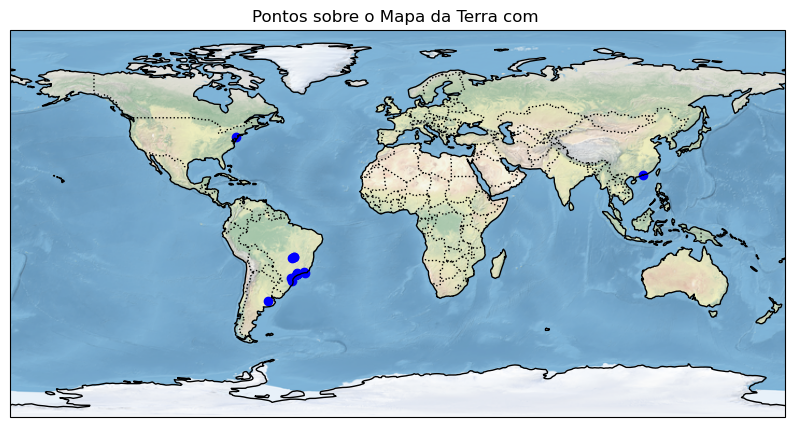

In [19]:


extent = [-180, 180, -90, 90]
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)

ax.stock_img()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.scatter(data['LocationLongitude'], data['LocationLatitude'], color='blue', marker='o', transform=projection)

ax.set_title('Pontos sobre o Mapa da Terra com ')
plt.show()

Agora fazendo um plot dos pontos só no Brasil

/Users/jgfaraco/miniconda3/envs/env/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/jgfaraco/miniconda3/envs/env/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


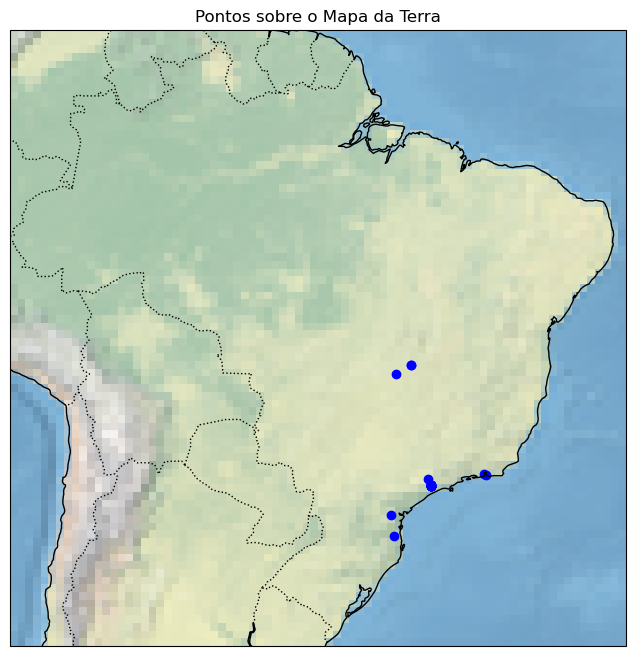

In [20]:

extent = [-180, 180, -90, 90]
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)

ax.stock_img()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-74, -34, -34, 6], crs=projection)
ax.scatter(data['LocationLongitude'], data['LocationLatitude'], color='blue', marker='o', transform=projection)

ax.set_title('Pontos sobre o Mapa da Terra')
plt.show()

# Q2(Pulamos a Q1 já que se trata sobre o nome das pessoas)

In [21]:
data['Q2'].value_counts(dropna=False)

Q2
Echoenergia                           1
Karsten S.A.                          1
Habib´s                               1
Ontex                                 1
S.I.N                                 1
Pitzi                                 1
Goodman                               1
Petlove                               1
Puratos Brasil                        1
Suzano S.A                            1
Atvos Agroindustrial                  1
banco do brasil                       1
hp brasil                             1
Regreen                               1
Airbus | Helibras                     1
Grafeno Digital                       1
Grupo Bisutti                         1
GM Financial.                         1
RFM Incorporadora                     1
Anônimo                               1
Roche                                 1
Livelo S.A                            1
Cinepolis                             1
Foxbit                                1
andritz                              

In [22]:
data['Q2'].unique()

array(['Echoenergia', 'Karsten S.A.', 'andritz', 'Foxbit', 'Cinepolis',
       'Livelo S.A', 'Roche', 'Anônimo', 'RFM Incorporadora',
       'GM Financial.', 'Grupo Bisutti', 'Grafeno Digital',
       'Airbus | Helibras', 'Regreen', 'hp brasil', 'banco do brasil',
       'Atvos Agroindustrial', 'Suzano S.A', 'Puratos Brasil', 'Petlove',
       'Goodman ', 'Pitzi', 'S.I.N', 'Ontex', 'Habib´s',
       'Credz S/A Instituição de Pagamento'], dtype=object)

 A variável Credz S/A Instituição de Pagamento é muito longa, pode distorcer nosso plot, portanto vamos mudar o nome dela

In [23]:
data['Q2'] = data['Q2'].replace('Credz S/A Instituição de Pagamento', 'Credz S/A')


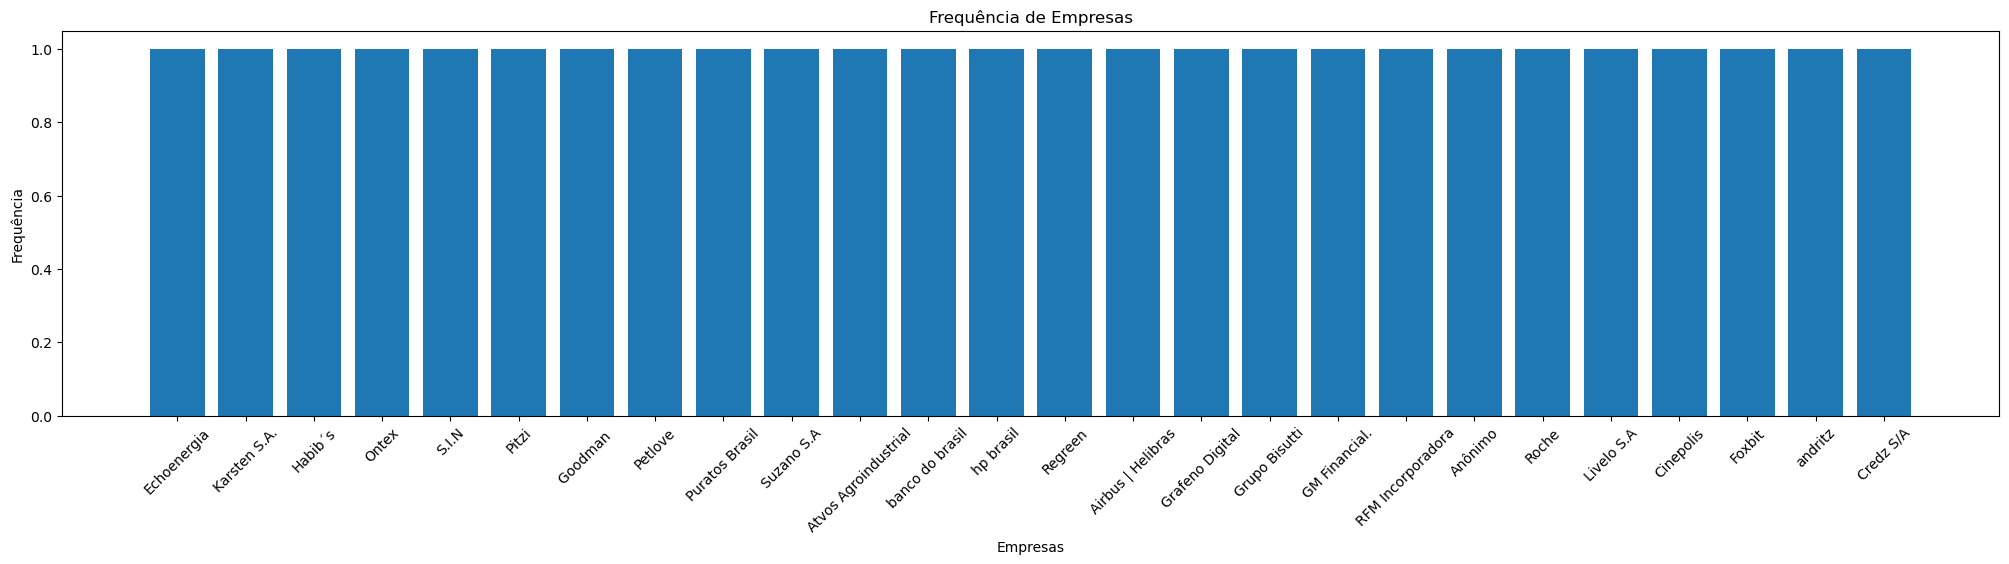

In [24]:

counts = data['Q2'].value_counts(dropna=True)

plt.figure(figsize=(25,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Empresas')
plt.ylabel('Frequência')
plt.title('Frequência de Empresas')
plt.xticks(rotation=45)
plt.show()

Empresas bem diversas, seria interessante separa-las por setor

Separei as empresas por setores, agora vamos adicionar uma coluna no nosso DataFrame que representa o Setor no qual aquele individuo trabalha

In [25]:


data.loc[data['Q2'].isin(['Echoenergia', 'andritz', 'Ivi Energia ']), 'Setores'] = 'Energia'
data.loc[data['Q2'].isin(['Roche', 'S.I.N']), 'Setores'] = 'Saude'
data.loc[data['Q2'] == 'Karsten S.A.', 'Setores'] = 'Textil'
data.loc[data['Q2'] == 'Foxbit', 'Setores'] = 'Criptoativos'
data.loc[data['Q2'] == 'Cinepolis', 'Setores'] = 'Cinema'
data.loc[data['Q2'].isin(['Livelo S.A', 'GM Financial.', 'Grafeno Digital', 'banco do brasil', 'Credz S/A']), 'Setores'] = 'Servicos Financeiros'
data.loc[data['Q2'].isin(['RFM Incorporadora', 'Goodman ', 'Iguatemi']), 'Setores'] = 'Imobiliario'
data.loc[data['Q2'].isin(['Grupo Bisutti', 'Habib´s', 'Puratos Brasil','Atvos Agroindustrial']), 'Setores'] = 'Alimenticio'
data.loc[data['Q2'] == 'Airbus | Helibras', 'Setores'] = 'Aeroespacial'
data.loc[data['Q2'] == 'Regreen', 'Setores'] = 'Restauracao Ecologica'
data.loc[data['Q2'].isin(['hp brasil', 'Globalweb', 'Pitzi']), 'Setores'] = 'Informatica'
data.loc[data['Q2'] == 'Suzano S.A', 'Setores'] = 'Papel e Celulose'
data.loc[data['Q2'] == 'Petlove', 'Setores'] = 'Pet'
data.loc[data['Q2'] == 'Ontex', 'Setores'] = 'Consumo nao-ciclico'
data.loc[data['Q2'] == 'Globo', 'Setores'] = 'Midia e Comunicacao'


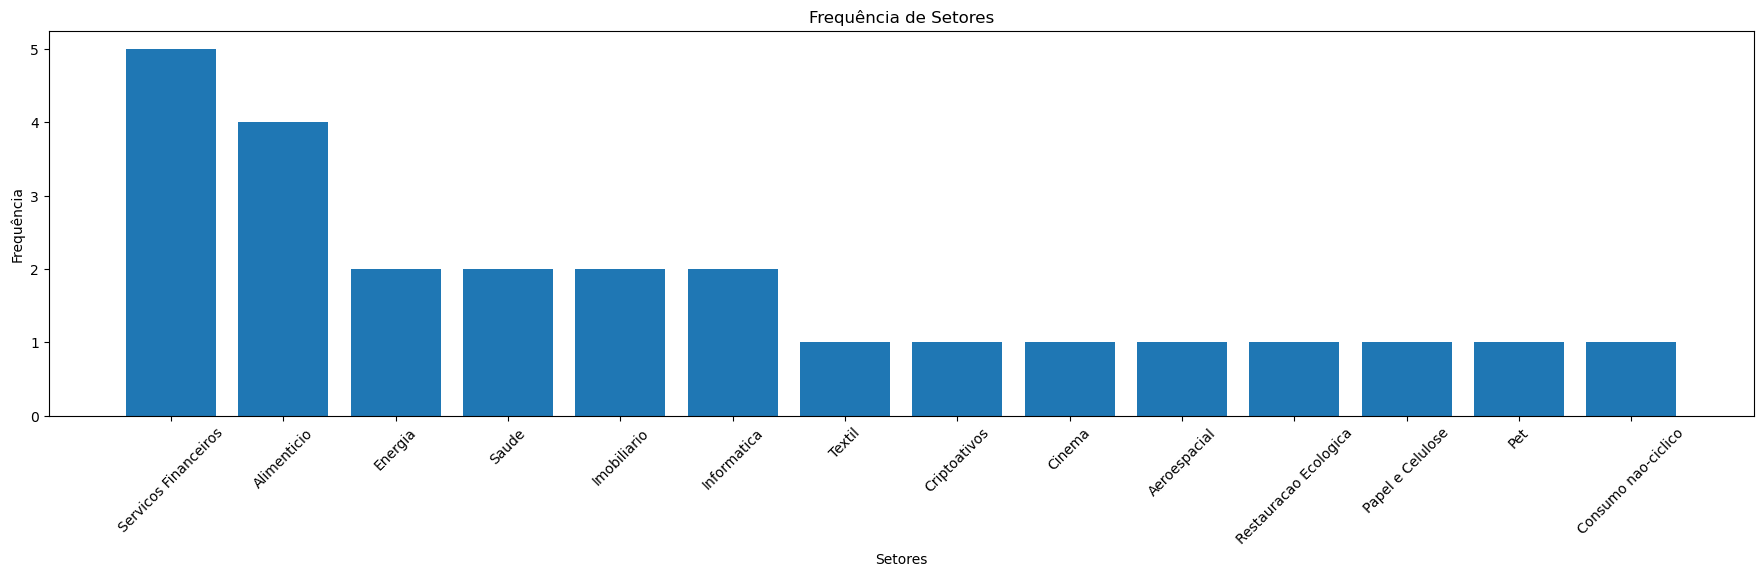

In [26]:

counts = data['Setores'].value_counts(dropna=True)

plt.figure(figsize=(22,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Setores')
plt.ylabel('Frequência')
plt.title('Frequência de Setores')
plt.xticks(rotation=45)
plt.show()

Podemos ver que os setores de Serviços Financeiros e o Alimentício são os que mais dominam

# Q3(cargo da pessoa na empresa)

In [27]:
data['Q3'].value_counts(dropna=False)

Q3
gerente jurídico                                     1
Coordenadora Jurídica e de Governança Corporativa    1
Gerente Sênior                                       1
Coord Jurídico e DPO                                 1
Coordenador Juridico                                 1
Legal Ops.                                           1
diretora executiva                                   1
Gerente de Contratos, Contencioso e Consultivo       1
Gerente Jurídica                                     1
Vice-Presidente Executivo                            1
Coordenador jurídico tributário                      1
agente comercial                                     1
country counsel                                      1
Diretora Juridica                                    1
Head of Legal, Compliance & Corporate Governance     1
Diretor Jurídico e Regulatório                       1
Gerente Jurídico                                     1
Superintendente executiva de finanças                1
Coorden

Dando uma olhada rápida, é possível notar que a maioria dos cargos são da area jurídica das empresas, vamos tentar confirmar isso mesmo

In [28]:

data.loc[data['Q3'].str.contains(r"jur[ií]dic[oa]|legal", case=False, na=False), 'area de atuacao'] = 'juridica'


In [29]:
if data['area de atuacao'].isnull().sum() > 0:
    data.loc[data['area de atuacao'].isnull(), 'area de atuacao'] = 'Outros'
data['area de atuacao'].value_counts(dropna=False)

area de atuacao
juridica    17
Outros       9
Name: count, dtype: int64

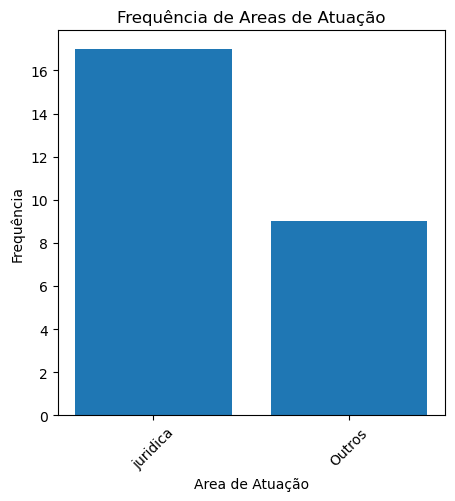

In [30]:
counts = data['area de atuacao'].value_counts(dropna=True)

plt.figure(figsize=(5,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Area de Atuação')
plt.ylabel('Frequência')
plt.title('Frequência de Areas de Atuação')
plt.xticks(rotation=45)
plt.show()

Alguns não especificam os cargos, por exemplo só colocam Diretor, então não conseguimos fazer uma análise realmente profunda da area de atuação. Mas podemos confirmar que a maioria atua na area juridica

#  Q5(pulamos Q4 porque é a coluna do email), Q5 indica a quantidade de advogados que fazem parte do departamento jurídico da empresa 

In [31]:
data['Q5'].value_counts(dropna=False)

Q5
4                                       7
3                                       6
1                                       2
9                                       1
11                                      1
9 (NOVE)                                1
11 diretos, 8 através de SLA interno    1
16                                      1
2                                       1
nao sei                                 1
30                                      1
62                                      1
13                                      1
6                                       1
Name: count, dtype: int64

Tratando alguns valores que estão errados

In [32]:
data['Q5'] = data['Q5'].replace('9 (NOVE)', 9)
data['Q5'] = data['Q5'].replace('11 diretos, 8 através de SLA interno', 19)
data['Q5'] = data['Q5'].replace('nao sei', None)

Lembrando que as respostas estao em tipo str, entao tempos que transformar para int

In [33]:
data['Q5'] = pd.to_numeric(data['Q5'], errors='coerce')

Entendendo um pouco melhor a distribuição

In [34]:
data['Q5'].describe()

count    25.000000
mean      9.000000
std      12.903488
min       1.000000
25%       3.000000
50%       4.000000
75%       9.000000
max      62.000000
Name: Q5, dtype: float64

Podemos ver que são dados que variam bastante, podemos notar isso pelo valor alto de desvio padrão 12.9 e pelo fato que o valor max é bem maior que a média, entao esperamos ser dados com bastante outliers, por isso fica mais fácil analisar esses dados por um histograma do que por um boxplot.

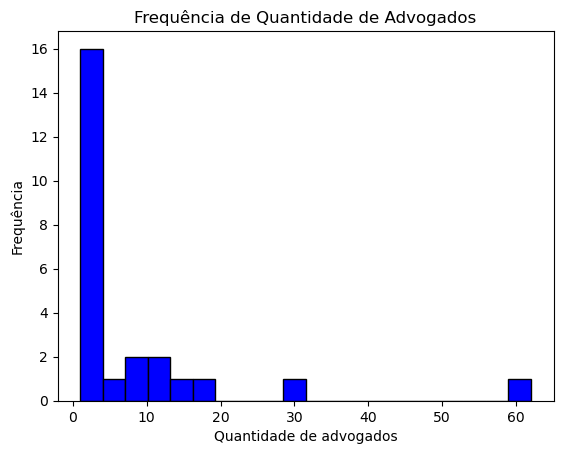

Tabela de Frequência:
Q5
1.0     2
2.0     1
3.0     6
4.0     7
6.0     1
9.0     2
11.0    1
13.0    1
16.0    1
19.0    1
30.0    1
62.0    1
Name: count, dtype: int64


In [35]:


dados_filtrados = data['Q5'].dropna()

plt.hist(dados_filtrados, bins=20, color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados')
plt.show()
# Criando uma tabela de frequência
tabela_frequencia = dados_filtrados.value_counts().sort_index()

# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)


Podemos notar que não conseguimos ver a distribuição corretamente por conta de outliers, vamos tentar limitar para tratar esse problema

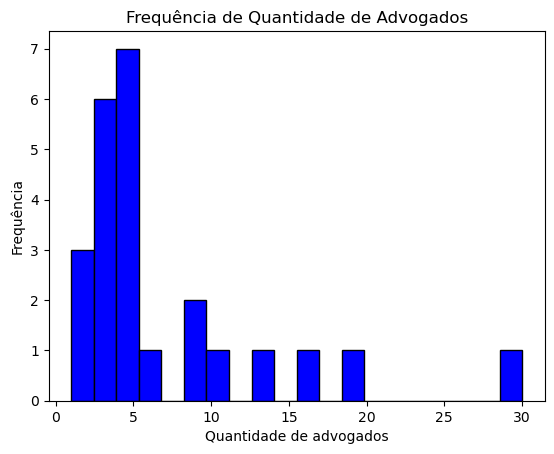

In [36]:
''' 
Filtra apenas os valores menores ou iguais a 60
'''
dados_filtrados = dados_filtrados[dados_filtrados <= 60]
plt.hist(dados_filtrados, bins=20, color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados')
plt.show()

Podemos ver que nesse plot aimda temos um outlier mas a distribuição parece que se concentra entre 0 a 10, vamos tentar remover esse segundo outlier

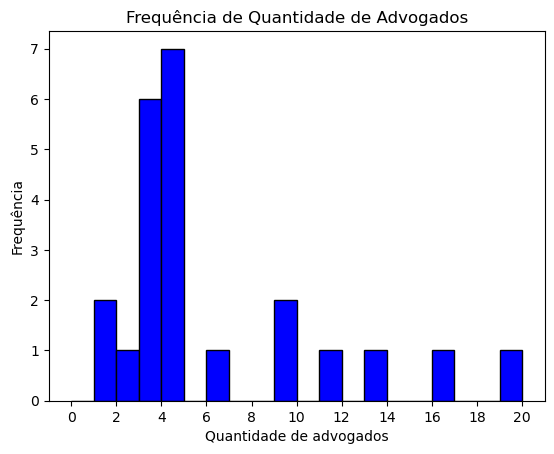

Tabela de Frequência:
Q5
1.0     2
2.0     1
3.0     6
4.0     7
6.0     1
9.0     2
11.0    1
13.0    1
16.0    1
19.0    1
Name: count, dtype: int64


In [37]:
''' 
Filtra apenas os valores menores ou iguais a 21
'''
dados_filtrados = dados_filtrados[dados_filtrados <= 21]
plt.hist(dados_filtrados, bins=range(0, 21), color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados')

plt.xticks(range(0, 21,2))
plt.show()
# Criando uma tabela de frequência
tabela_frequencia = dados_filtrados.value_counts().sort_index()

# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

Agora sim, fica claro que a maioria dos valores estão entre 3 e 5 advogados

Box plot desses dados sem os dois grandes outliers

Text(0.5, 1.0, 'Boxplot da Quantidade de Advogados')

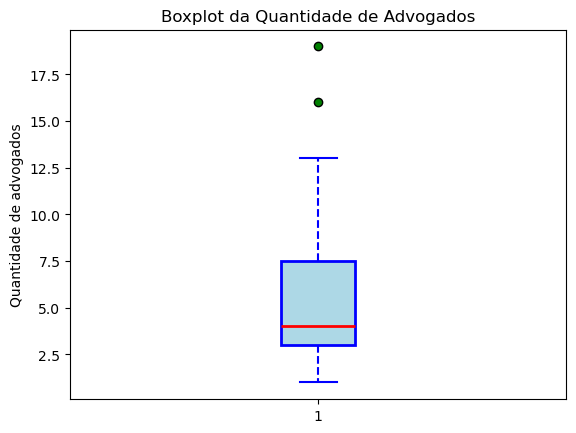

In [38]:

boxprops = dict(facecolor='lightblue', color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='blue', linestyle='--', linewidth=1.5)
capprops = dict(color='blue', linewidth=1.5)
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')

fig, ax = plt.subplots()

ax.boxplot(dados_filtrados, patch_artist=True,
           boxprops=boxprops,
           medianprops=medianprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           flierprops=flierprops)

ax.set_ylabel('Quantidade de advogados')
ax.set_title('Boxplot da Quantidade de Advogados')


Podemos ver que os outliers ainda acabam puxando muito o quartil 75% e o fio de bigode de cima, mas a mediana fica ali entre 3 e 4 como vimos no histograma, perto do quartil 25%. 

# Q6(Qual o maior desafio do seu departamento jurídico)

In [39]:
data['Q6'].value_counts(dropna=False)

Q6
1,4        3
3          3
1,3        3
1,2,3,4    2
3,4        2
4          2
2          2
1          2
1,2,3      2
1,3,4,5    1
1,2        1
1,5        1
5          1
2,3,4      1
Name: count, dtype: int64

Definindo alguns detasets que vao ser usado daqui em diante

In [40]:
data_alimentos = data[data['Setores'] == 'Alimenticio']
data_servicos_financeiros = data[data['Setores'] == 'Servicos Financeiros']
data_equipe_pequena= data[data['Q5']<=3]
data_equipe_média = data[(data['Q5']>3) & (data['Q5']<=8)]
data_equipe_grande = data[data['Q5']>=9]

Fazendo o plot da frequencia de cada opção

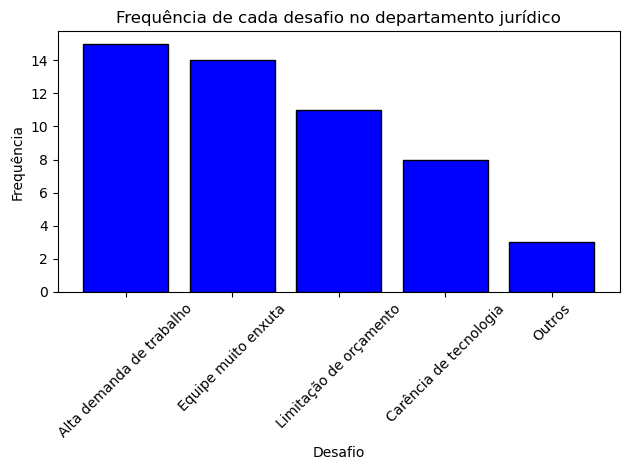

In [41]:

q6_series = data['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

Maioria é Alta demnada de trabalho e equipe muito enxuta

Se filtrarmos por empresa de diferentes setores, o padrão de respostas fica o mesmo?

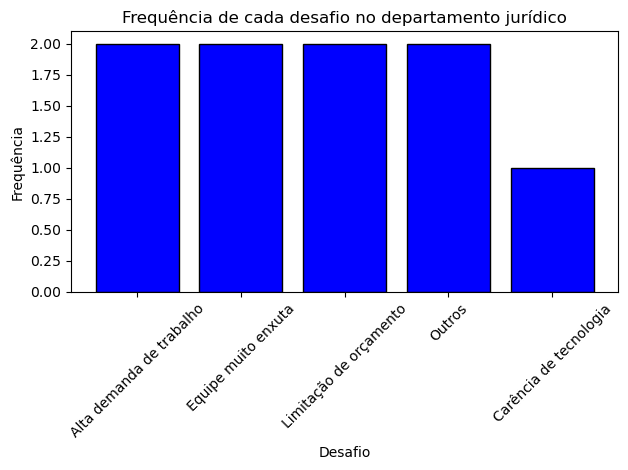

In [42]:

q6_series = data_servicos_financeiros['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


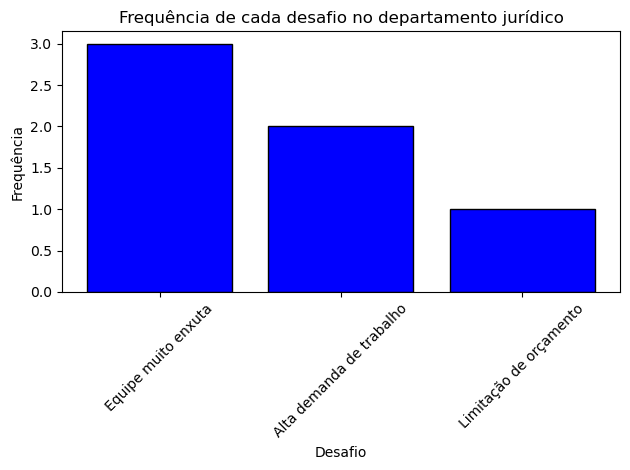

In [43]:

q6_series = data_alimentos['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

Não é possível tirar nenhuma conclusão se o setor influencia na frequência dos desafios por conta de termos muitos poucos dados

Será que o tamanho da equipe jurídica impacta nos desafios? Vamos separar em equipes pequenas, médias e grandes, equipes pequenas são de 1 a 3, médias de 4 a 8 e grandes de 9 para cima(separei considerando os quartieis desses dados)

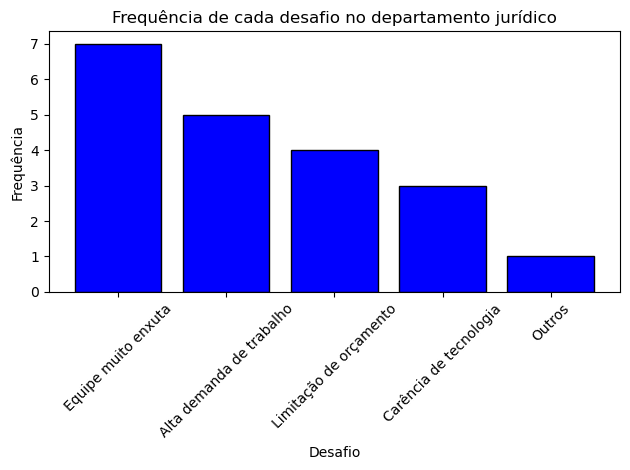

In [44]:

q6_series = data_equipe_pequena['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


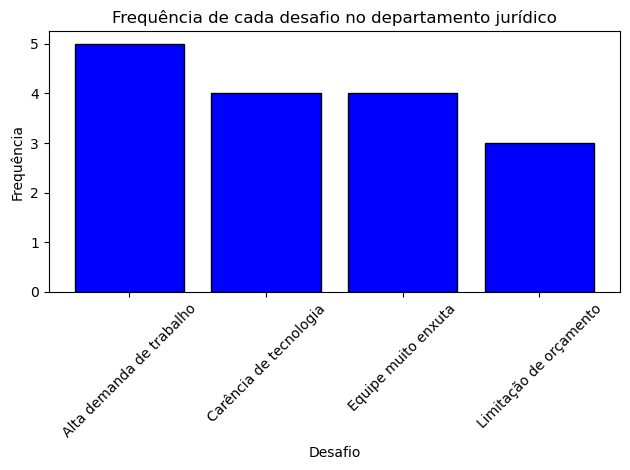

In [45]:

q6_series = data_equipe_média['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

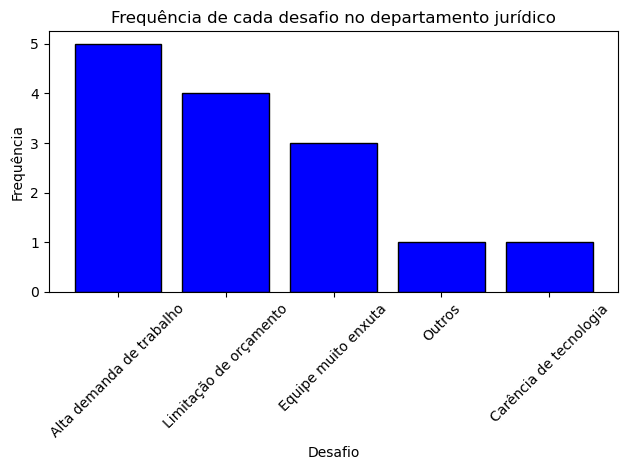

In [46]:

q6_series = data_equipe_grande['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


Podemos identificar que nas equipes pequenas o maior desafio é que a equipe é muoto enxuta(o que era esperado), mas para as equipes médias e grandes acaba sendo bem divido mas a alta demanda de trabalho acaba se destacando 

Analisando os Outros

In [47]:
data['Q6_5_TEXT'].value_counts()

Q6_5_TEXT
Equipe muito jovem                                                  1
Aliar qualidade com velocidade no atendimento das áreas clientes    1
nao uso                                                             1
Name: count, dtype: int64

Segunda resposta não ficou clara

Resumo: A atla demanda de trabalho e equipe enxuta acabam sendo os maiores desafios enfrentados pelas empresas em seus departamentos jurídicos, o tamanho da equipe e o setor da empresa pouco influenciam essa variável 

#  Q7(De que forma seu departamento jurídico atende suas demandas jurídicas?)

In [48]:
data['Q7'].value_counts(dropna=False)


Q7
2    14
3     9
4     2
1     1
Name: count, dtype: int64

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/222827497.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


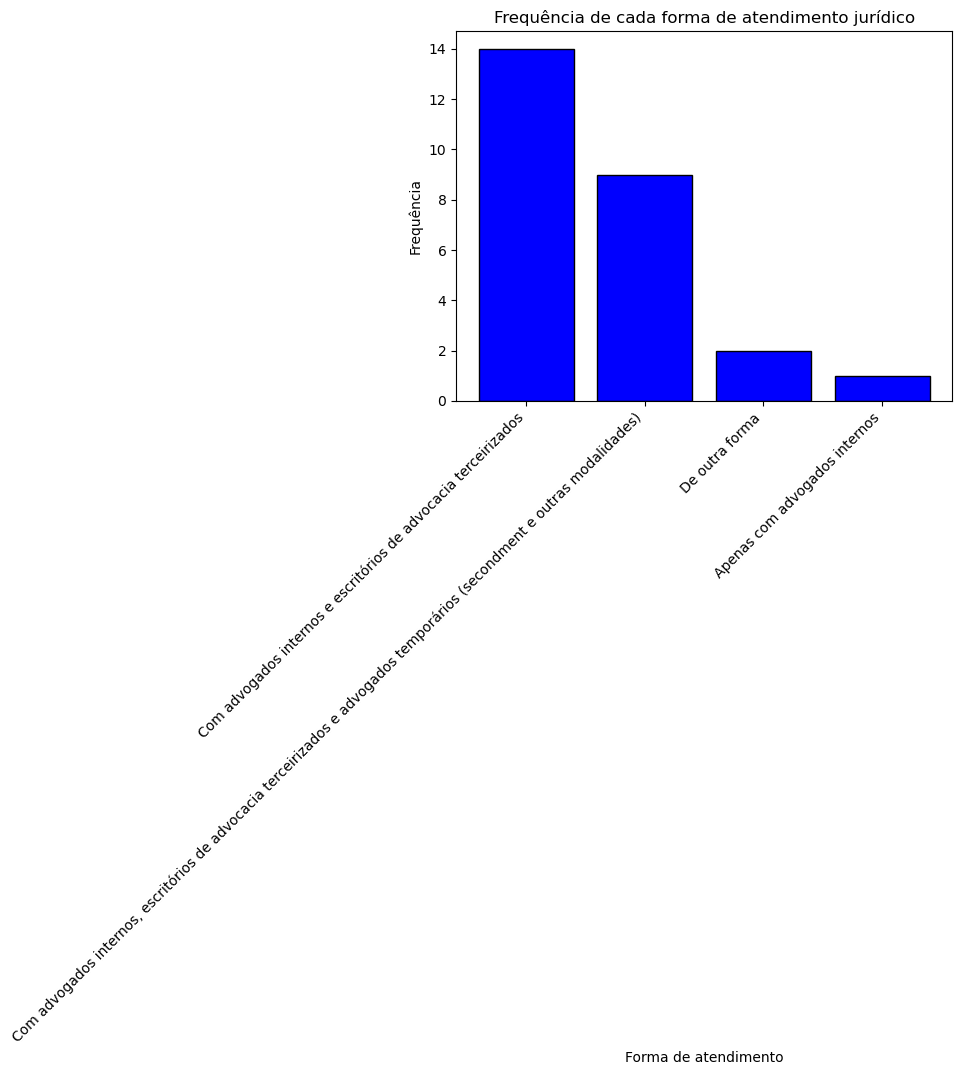

In [49]:

q7_series = data['Q7'].astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
data['Q7_4_TEXT'].value_counts()

Q7_4_TEXT
principalmente advogados internos    1
funci na agencia                     1
Name: count, dtype: int64

Vamos ver se o setor impacta no padrão desses dados

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/299295162.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


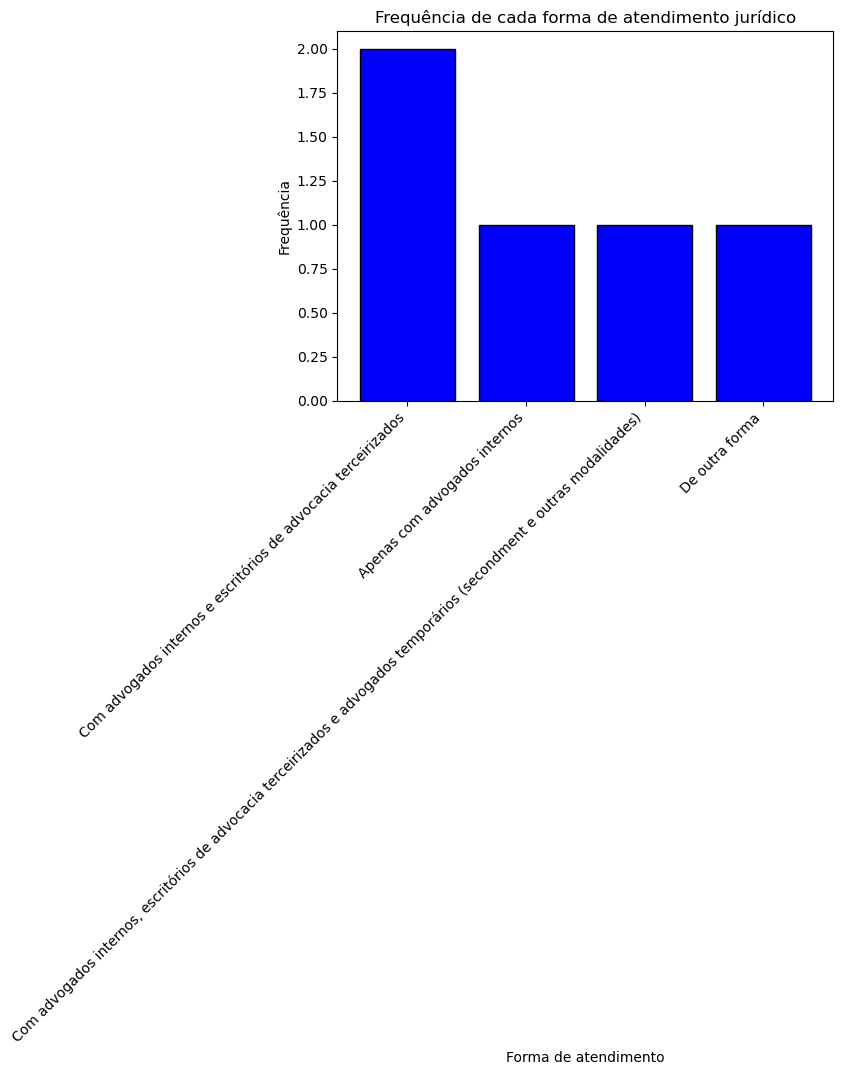

In [51]:

q7_series = data_servicos_financeiros['Q7'].astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/4017700406.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


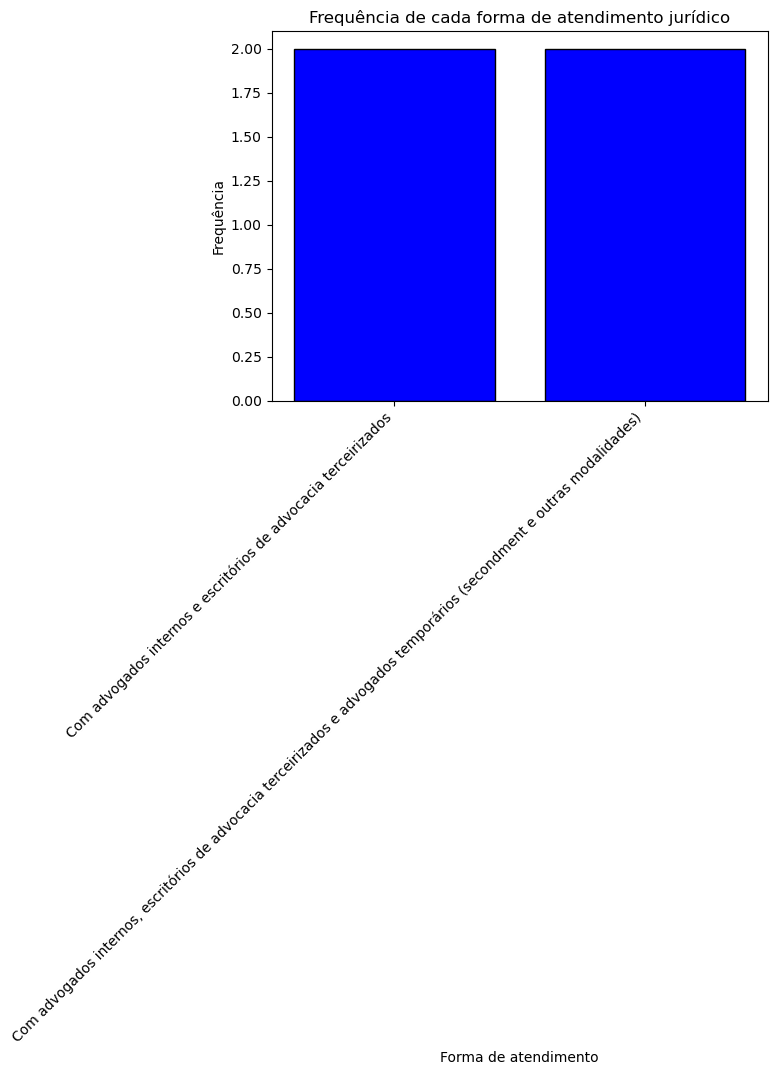

In [52]:

q7_series = data_alimentos['Q7'].astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Será que o tamanho da equipe jurídica impacta na forma de atnedimento? Vamos separar em equipes pequenas, médias e grandes, equipes pequenas são de 1 a 3, médias de 4 a 8 e grandes de 9 para cima(separei considerando os quartieis desses dados)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1668683143.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


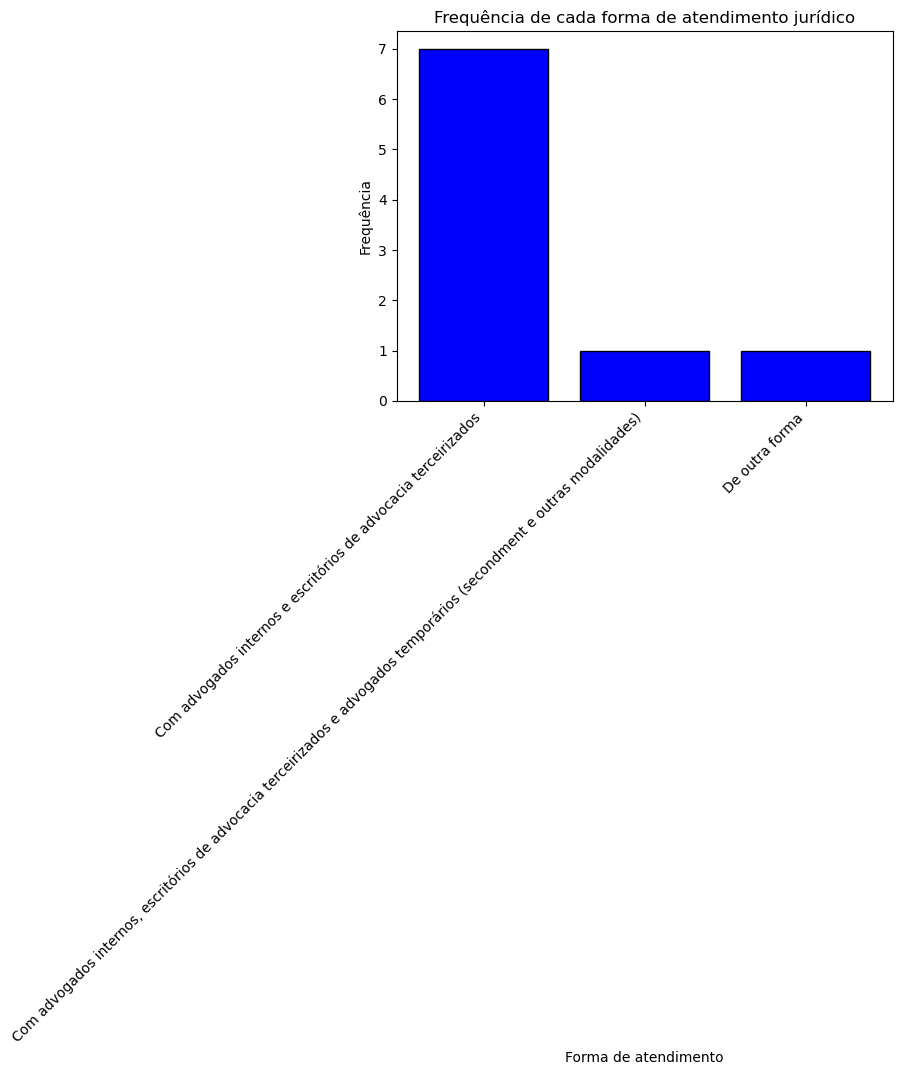

In [53]:

q7_series = data_equipe_pequena['Q7'].astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1098757077.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


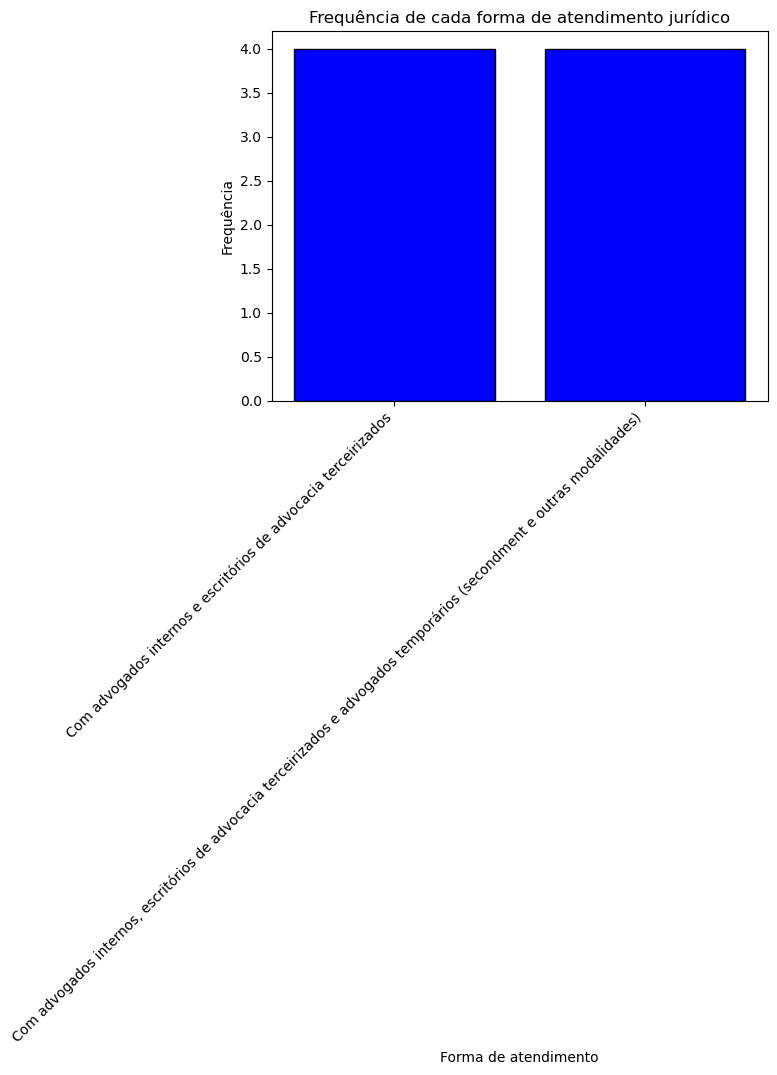

In [54]:

q7_series = data_equipe_média['Q7'].dropna().astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2558786379.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


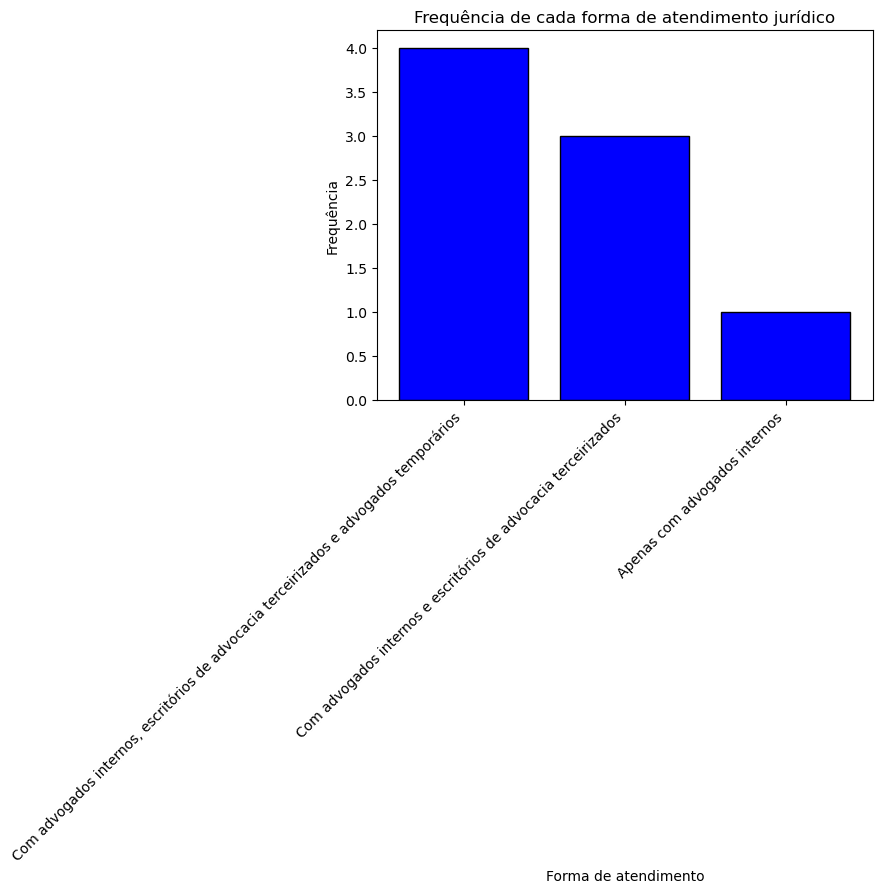

In [55]:

q7_series = data_equipe_grande['Q7'].dropna().astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: A maioria das empresas usam atendimento jurídico com advogados internos e escritórios de advogacia terceirizados, uma quantidade consideravel também usa advogados temporários. O tamanho da equipe jurídica da empresa influencia o tipo de atendimento jurídico que a empresa recebe, quanto maior a empresa mais se tende a usar advogados temporários

#  Q8(Assinale dois atributos principais que você espera encontrar ao contratar serviços jurídicos externos (escritórios de advocacia e advogados temporários))

In [56]:
data['Q8'].value_counts(dropna=False)

Q8
1,4          7
1,3          5
1,2,3,4      3
1,3,4        3
5            2
2,3          1
1,2          1
1,2,3,4,5    1
1,4,5        1
2,3,4        1
1,2,4        1
Name: count, dtype: int64

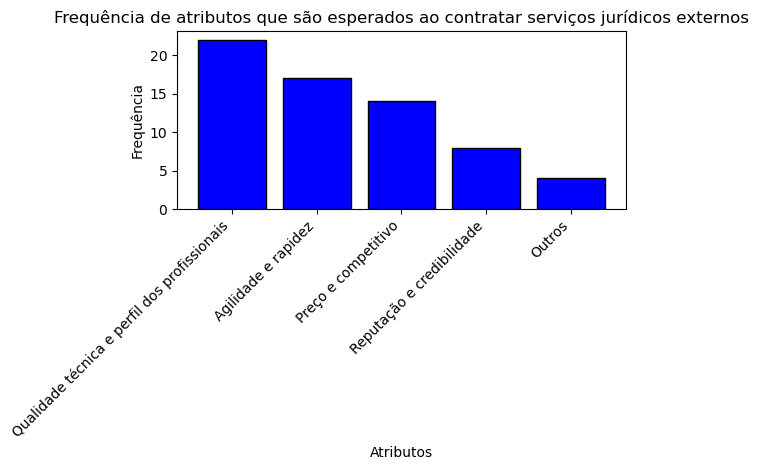

In [57]:
q8_series = data['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
data['Q8_5_TEXT'].value_counts()

Q8_5_TEXT
Entendimento e mentalidade voltada ao mundo dos negócios e linguagem acessível                                                                                                                                                                                                                           1
Risco                                                                                                                                                                                                                                                                                                    1
saber e atitude juridico.                                                                                                                                                                                                                                                                                1
Os atributos dependem do tipo de serviço requisitado. Alta qualidade técnica são requisitos p

Se filtrarmos por setor o padrão se mantém?

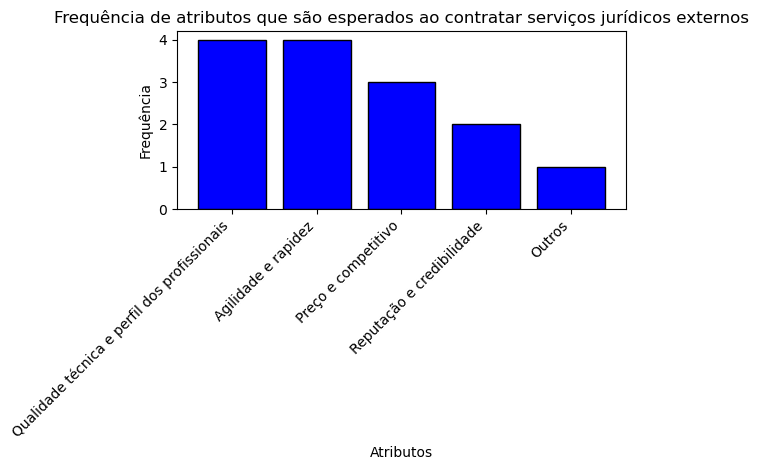

In [59]:

q8_series = data_servicos_financeiros['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

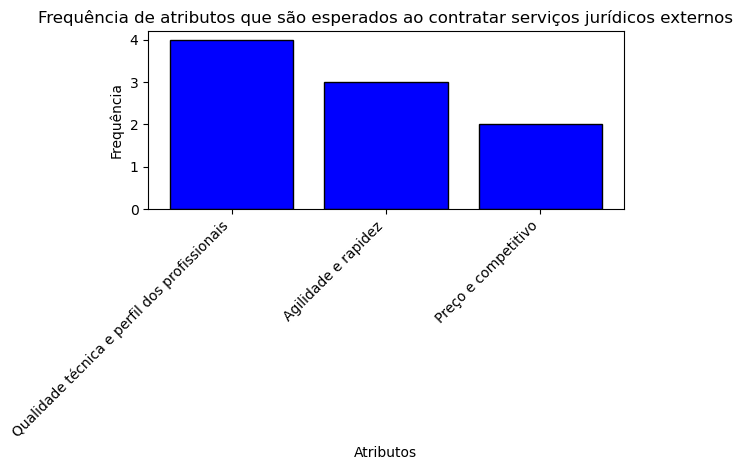

In [60]:

q8_series = data_alimentos['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisando se o tamanho da equipe impacta

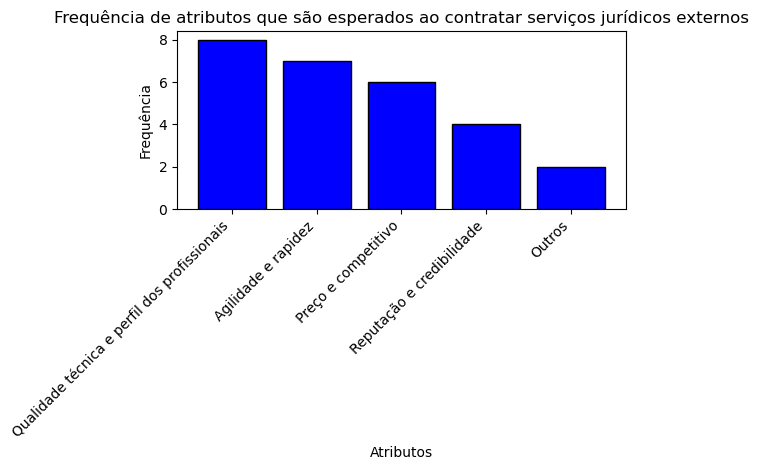

In [61]:
q8_series = data_equipe_pequena['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

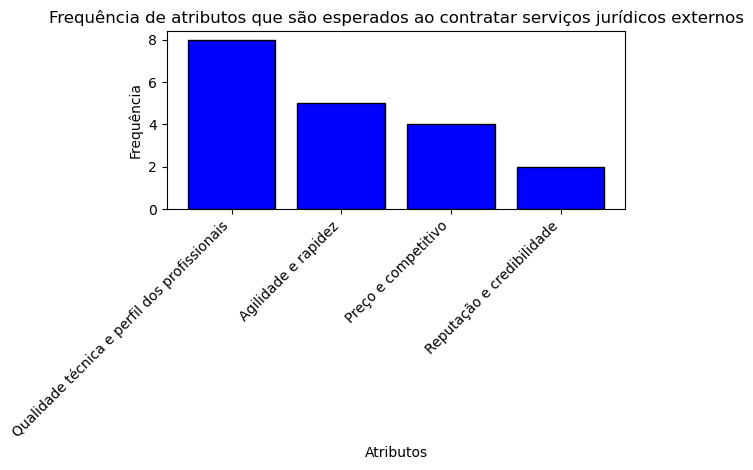

In [62]:
q8_series = data_equipe_média['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

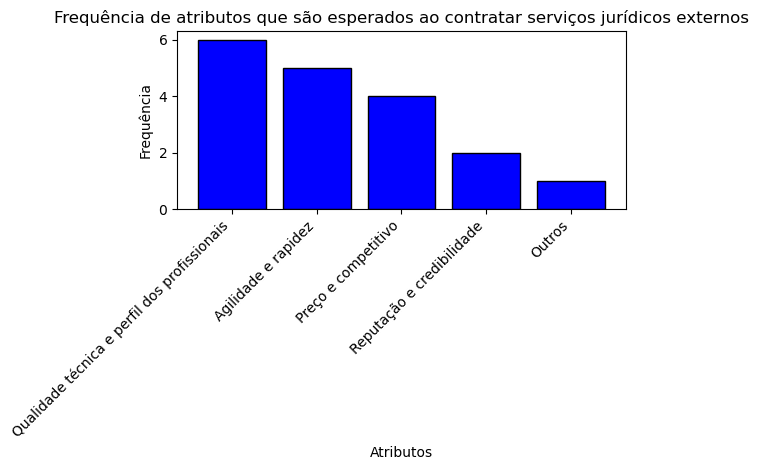

In [63]:
q8_series = data_equipe_grande['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: a Qualidade técnica e perfil dos profissionais é o atributo mais procurado, o setor e o tamanho da equipe jurídica não impactam nisso

# Q9(Se você já contratou advogados temporários (Secondment e outras modalidades), qual foi sua experiência geral com o serviço?)

In [64]:
data['Q9'].value_counts(dropna=False)

Q9
1    9
3    9
2    6
4    2
Name: count, dtype: int64

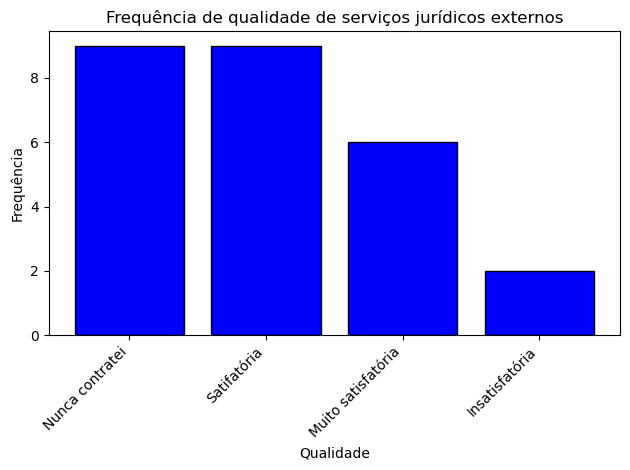

In [65]:
q9_series = data['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Motivos de instatisfação

In [66]:
data['Q9_4_TEXT'].value_counts()

Q9_4_TEXT
perdi a causa                                                                                                                                                 1
Secondment funciona bem para certas atividades, normalmente de mais baixa complexidade e que demandam conhecimento menos profundo dos negócios da empresa.    1
Name: count, dtype: int64

Analisando como o setor impacta

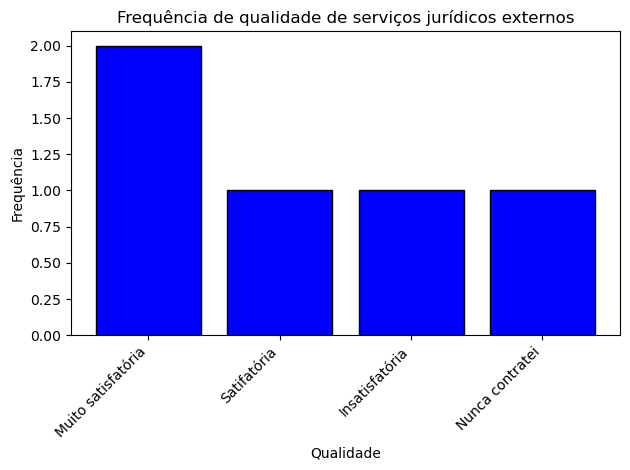

In [67]:

q9_series = data_servicos_financeiros['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

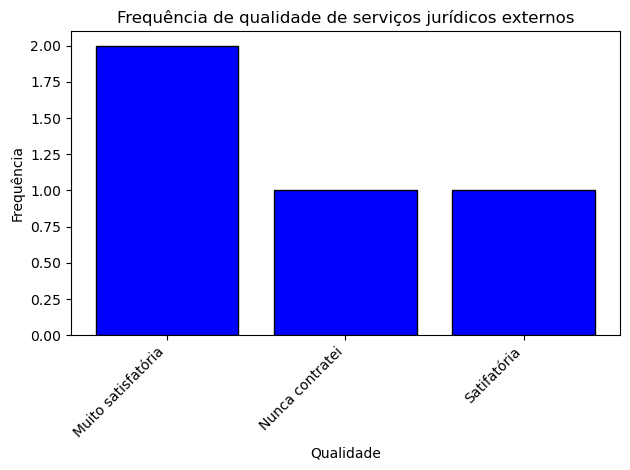

In [68]:
q9_series = data_alimentos['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como o tamanho da equipe jurídica impacta?

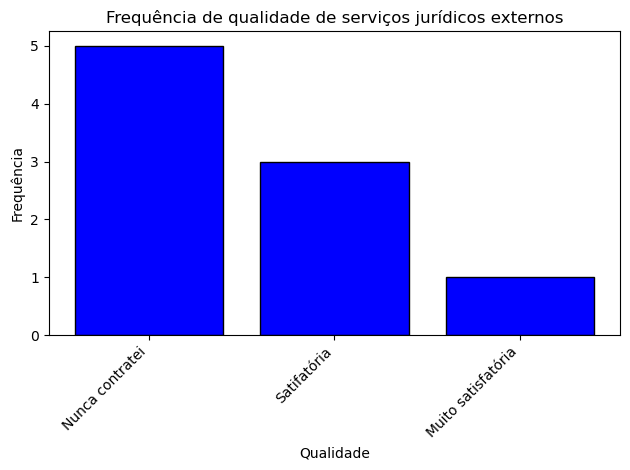

In [69]:
q9_series = data_equipe_pequena['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

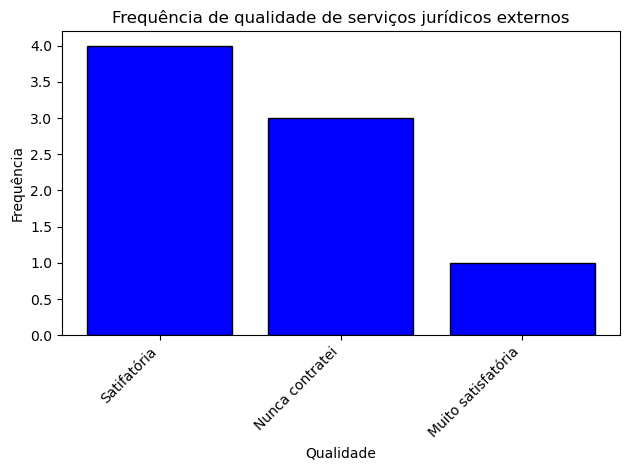

In [70]:
q9_series = data_equipe_média['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

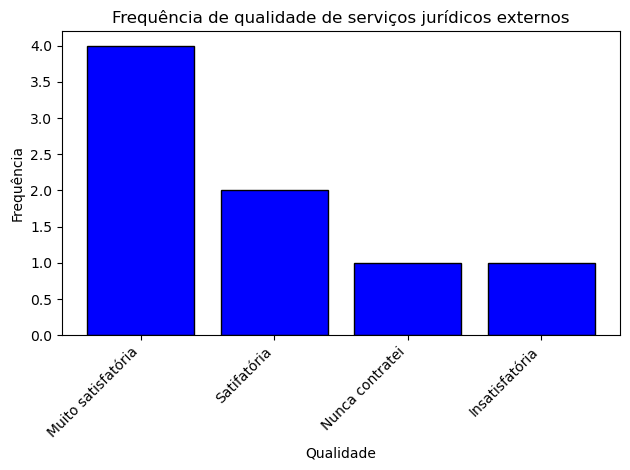

In [71]:
q9_series = data_equipe_grande['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Normalmente equipes pequenas nunca contrtaram serviços externos, e quanto maior a empresa maior fica o nivel de satisfação

Resumo: A maioria das empresas estão satisfeitas com os serviços de tercerizadas ou ainda não contrayaram serviços

# Q10A(Por qual motivo você contratou advogados temporários (Secondment)? (Assinale uma ou mais opções, se necessário))

In [72]:
data['Q10A'].value_counts(dropna=False)

Q10A
NaN      9
2        4
7        3
1,2,5    2
3        2
2,6      1
1        1
1,3      1
1,4,6    1
5,6      1
1,2,3    1
Name: count, dtype: int64

In [73]:
data['Q10A'] = data['Q10A'].replace('7', '1,3,5')

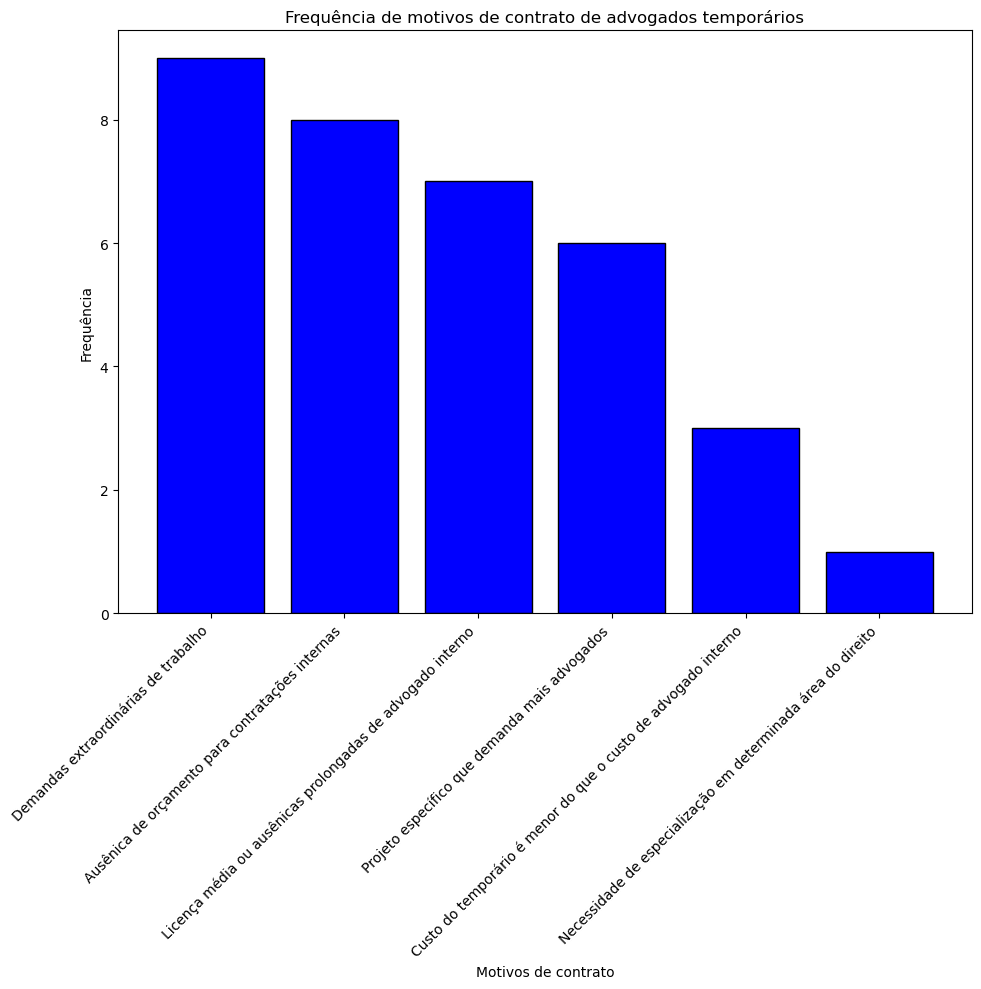

Tabela de Frequência:
Ausênica de orçamento para contratações internas                  8
Custo do temporário é menor do que o custo de advogado interno    3
Demandas extraordinárias de trabalho                              9
Licença média ou ausênicas prolongadas de advogado interno        7
Necessidade de especialização em determinada área do direito      1
Projeto específico que demanda mais advogados                     6
Name: count, dtype: int64


In [74]:

q10A_series = data['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criando uma tabela de frequência
tabela_frequencia = counts_q10A.sort_index()

# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

In [75]:
data['Q10A_7_TEXT'].value_counts()

Q10A_7_TEXT
licença maternidade                                                                                           1
parente                                                                                                       1
Os motivos variam. Ora, por picos de demanda, ora por ausências prolongadas, ora por projetos específicos.    1
Name: count, dtype: int64

In [76]:
data['Q10A_7_TEXT'].drop(data[data['Q10A_7_TEXT'] == 'licença maternidade'].index, inplace=True)
data['Q10A_7_TEXT'].drop(data[data['Q10A_7_TEXT'] == 'Os motivos variam. Ora, por picos de demanda, ora por ausências prolongadas, ora por projetos específicos.'].index, inplace=True)

Podemos adicionar um em licença médica e um em demanda, um em ausência e projetos específicos

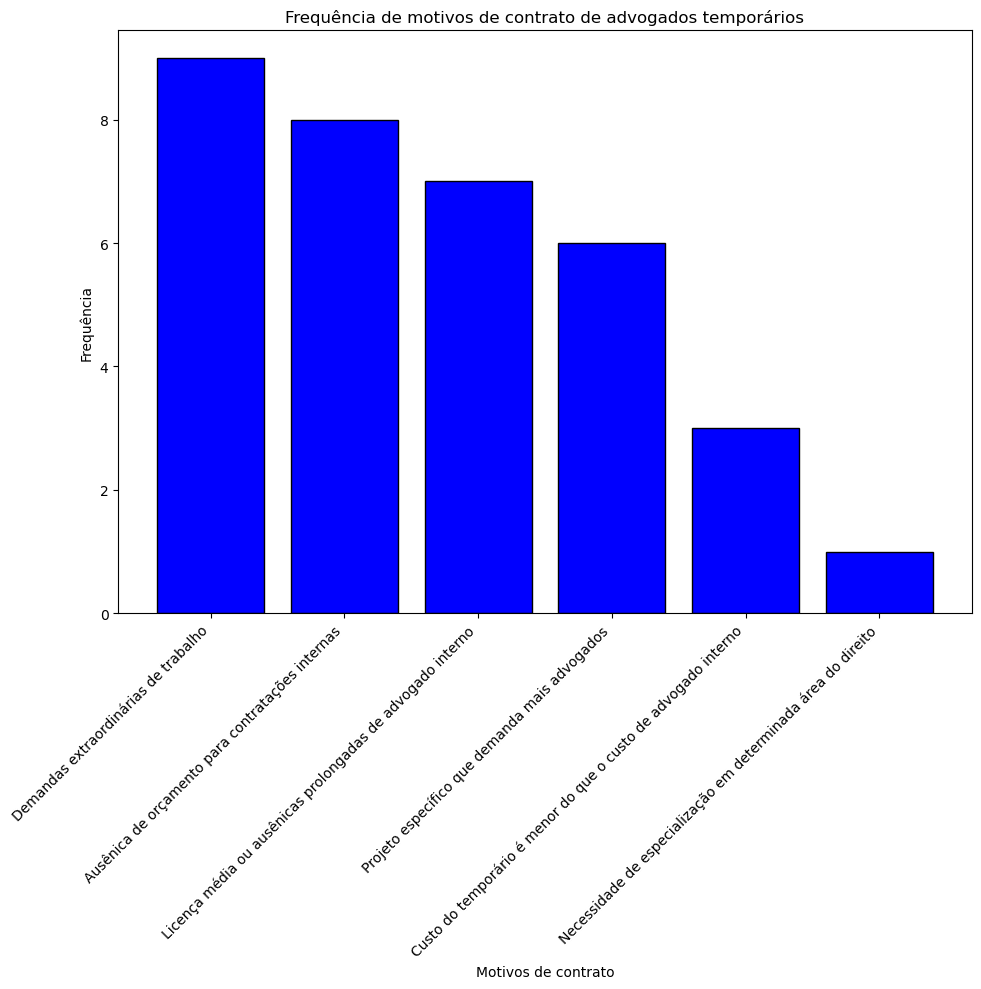

In [77]:

plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Motivos de contrato bem diluidos

Vendo se o setor impacta

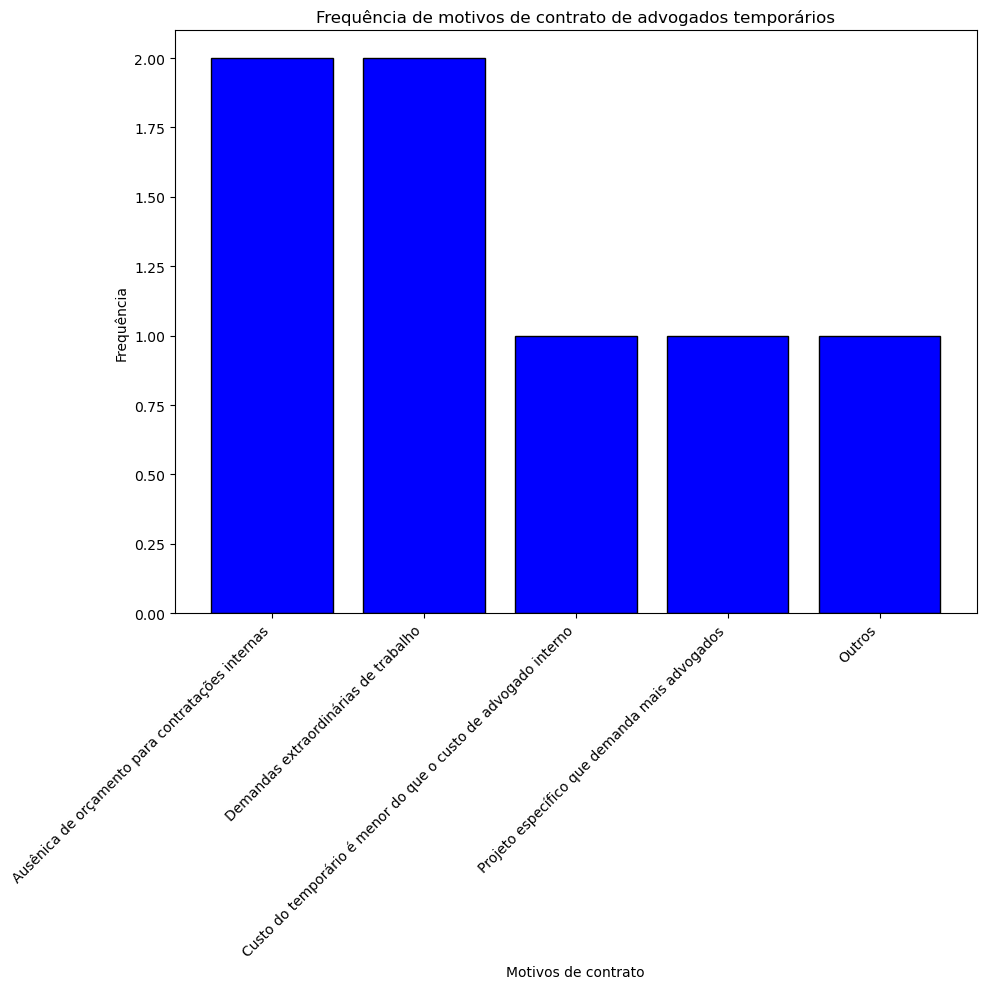

In [78]:

q10A_series = data_servicos_financeiros['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

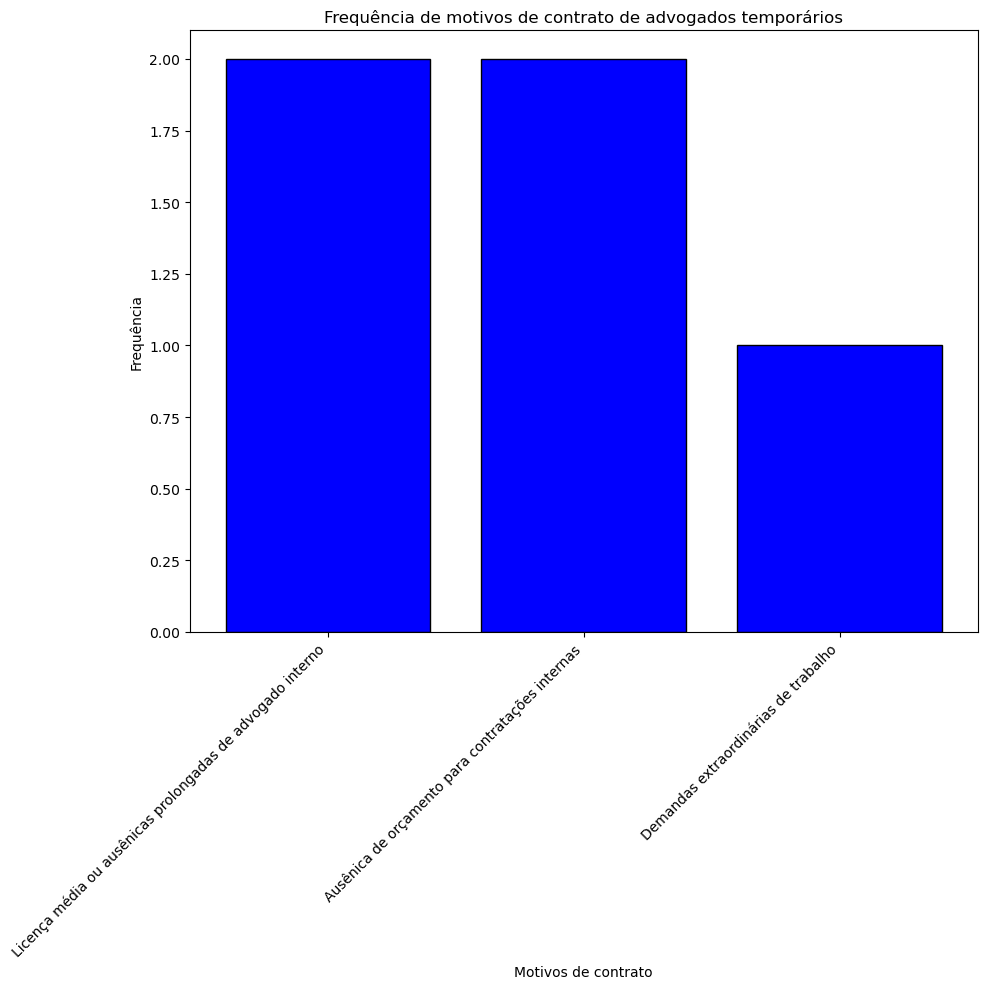

In [79]:

q10A_series = data_alimentos['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vendo se o tamanho da equipe impacta

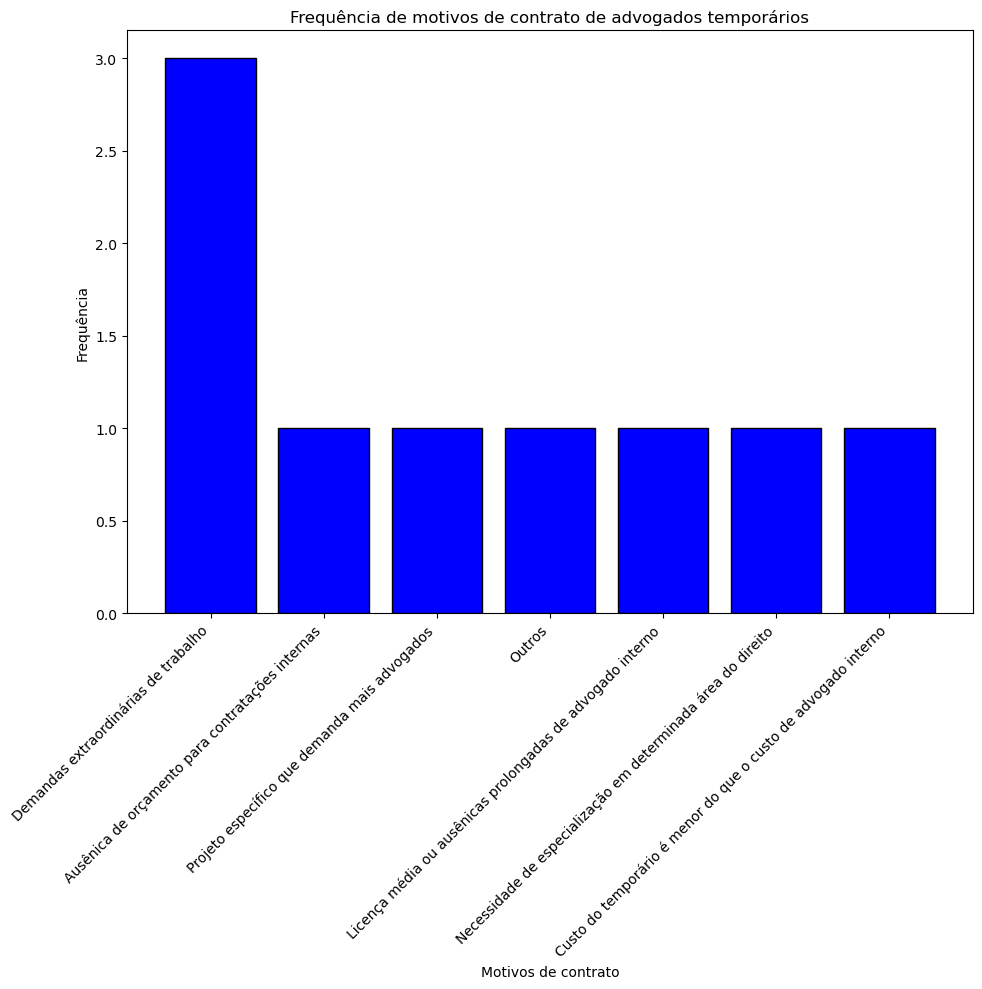

In [80]:

q10A_series = data_equipe_pequena['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

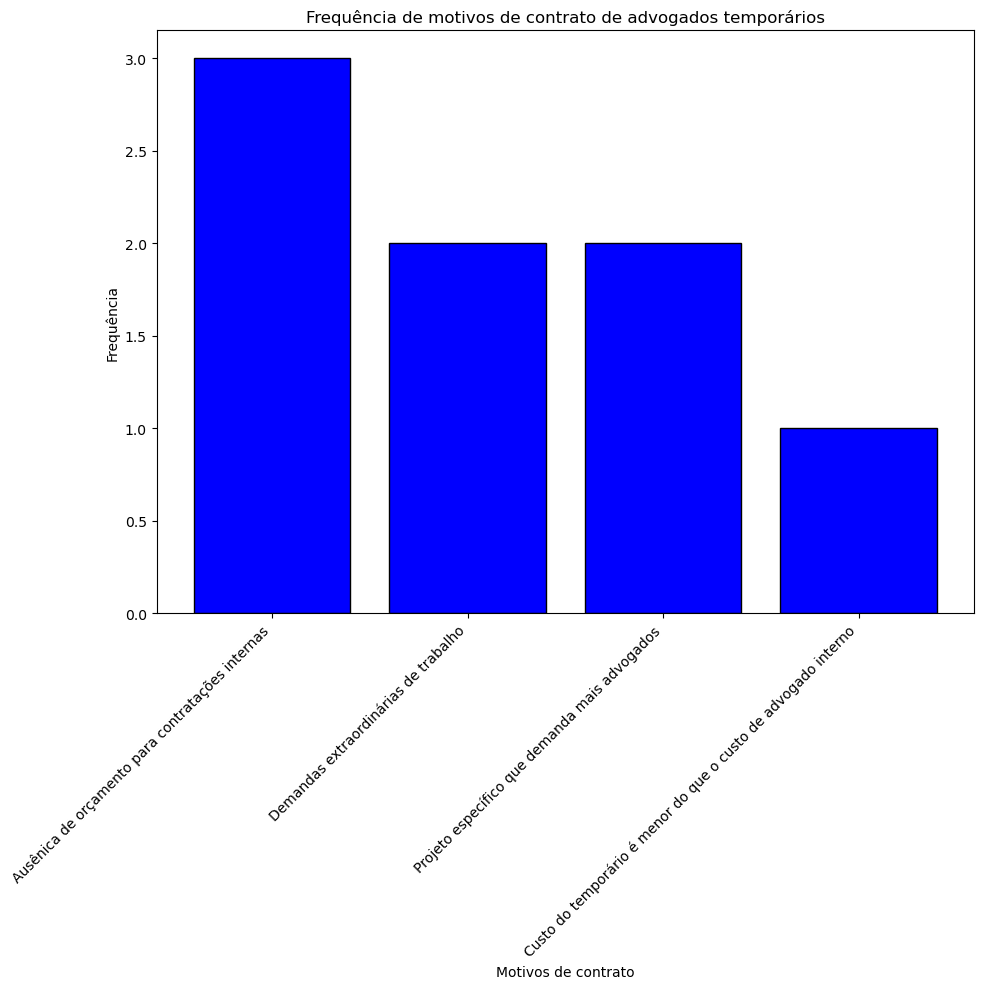

In [81]:

q10A_series = data_equipe_média['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

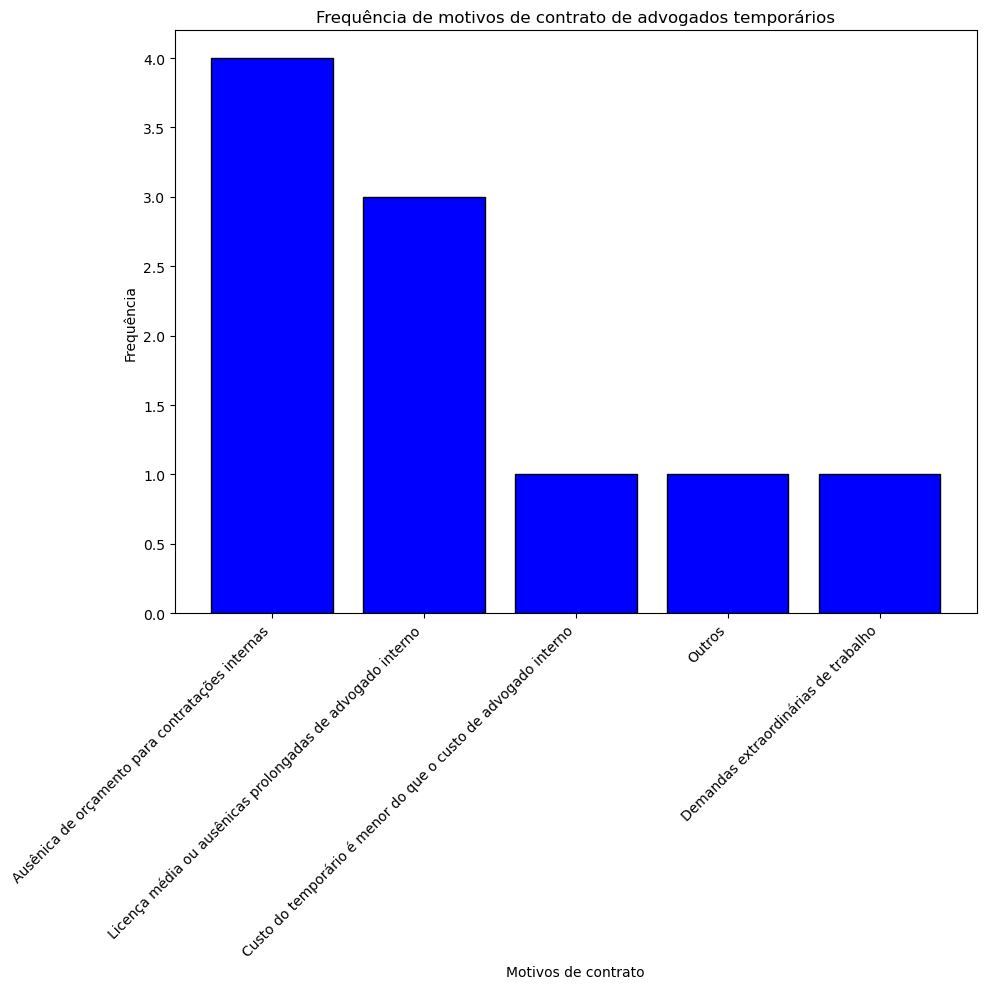

In [82]:

q10A_series = data_equipe_grande['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nas empresas pequenas o principal motivo é demandas altas de trabalho, em equipes médias é bem diluido, em equipes grandes os maiores motivos são ausênica de orçamento ou licença médica e ausências prolongadas de advogados

Resumo: Motivos bem diluidos em geral, uma diferença mais visível aparece quando filtramos por diferença de tamanhos de equipe

# Q10B(Por qual motivo você nunca contratou advogados temporários no formato de secondment? (Assinale uma ou mais opções, se necessário) )

In [83]:
data['Q10B'].value_counts(dropna=False)

Q10B
NaN    17
2       2
7       1
1       1
1,2     1
4       1
1,7     1
6       1
3       1
Name: count, dtype: int64

In [84]:
data['Q10B_7_TEXT'].value_counts()

Q10B_7_TEXT
o recurso para o secondment é consumido do jurídico, ao passo que uma contratação CLTista é recurso advindo do RH.                                    1
Nunca contratei secondment, mas trabalhei com secondment. O recurso interno geralmente entende mais o negócio da empresa e se mostra mais engajado    1
Name: count, dtype: int64

Os 7 na verdade são 6

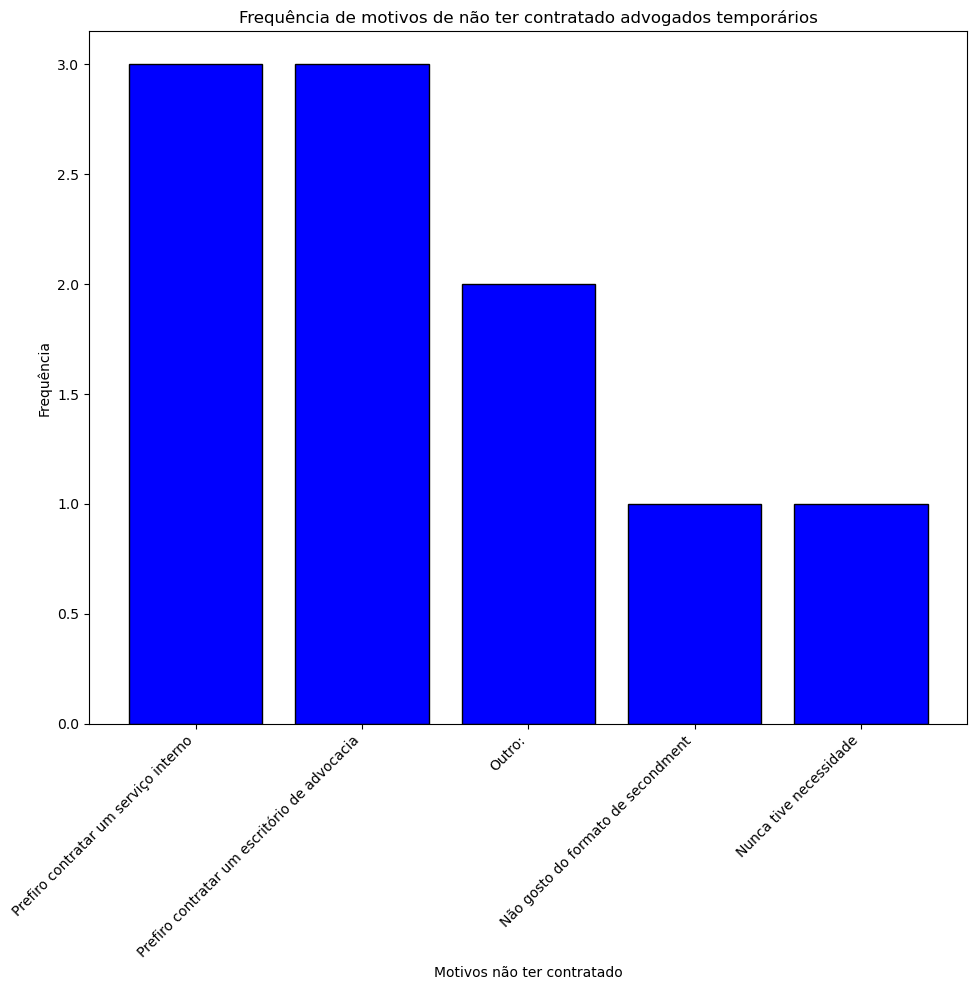

In [85]:

q10B_series = data['Q10B'].dropna().astype(str)
all_choices_q10B = []
for resp in q10B_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10B.extend(choices)
all_choices_q10B.remove('6')
counts_q10B = pd.Series(all_choices_q10B).value_counts()
descricao_map_q10B = {
    '1': 'Prefiro contratar um serviço interno',
    '2': 'Prefiro contratar um escritório de advocacia',
    '3': 'Nunca tive necessidade',
    '4': 'Não gosto do formato de secondment',
    '5': 'Não conheço bem esses serviços',
    '7': 'Outro:',
}
counts_q10B.index = counts_q10B.index.map(descricao_map_q10B)
plt.figure(figsize=(10,10))
plt.bar(counts_q10B.index, counts_q10B.values, color='blue', edgecolor='black')
plt.xlabel('Motivos não ter contratado')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de não ter contratado advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

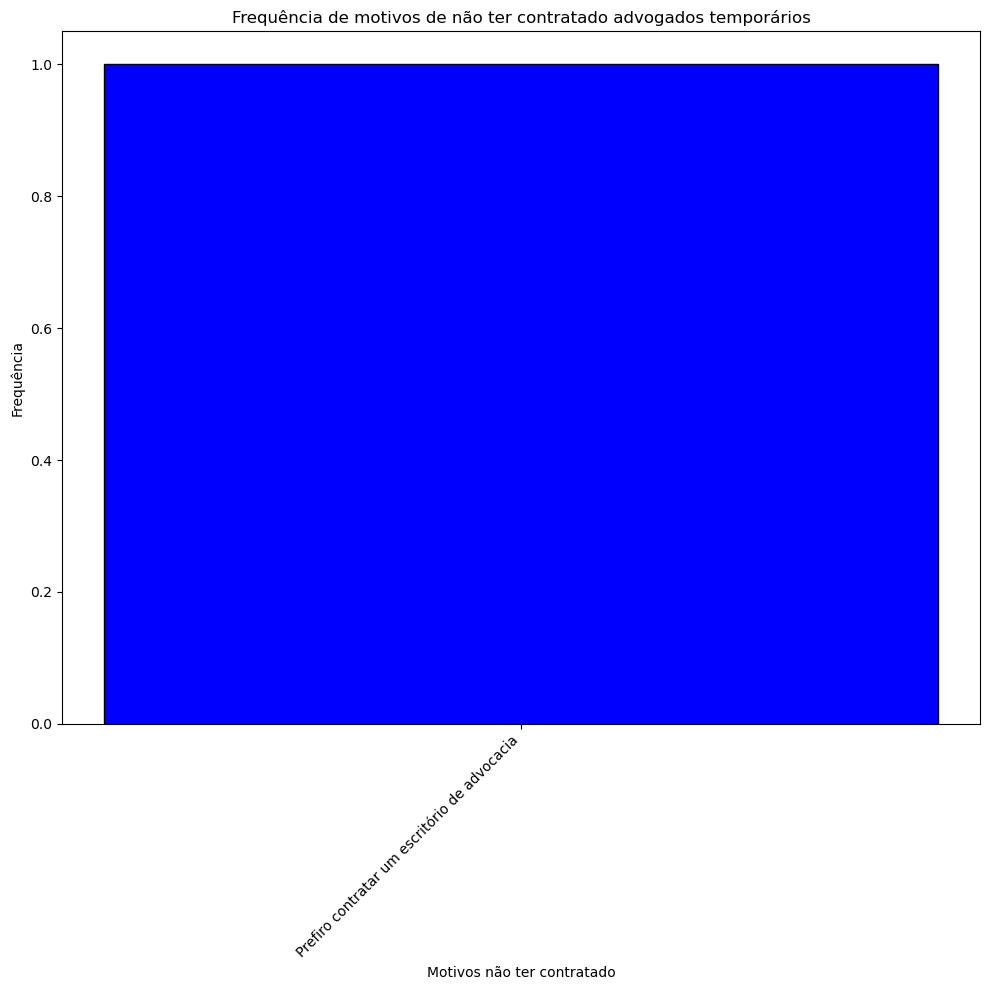

In [86]:
q10B_series = data_servicos_financeiros['Q10B'].dropna().astype(str)
all_choices_q10B = []
for resp in q10B_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10B.extend(choices)
counts_q10B = pd.Series(all_choices_q10B).value_counts()
descricao_map_q10B = {
    '1': 'Prefiro contratar um serviço interno',
    '2': 'Prefiro contratar um escritório de advocacia',
    '3': 'Nunca tive necessidade',
    '4': 'Não gosto do formato de secondment',
    '5': 'Não conheço bem esses serviços',
    '6': 'Outro:',
}
counts_q10B.index = counts_q10B.index.map(descricao_map_q10B)
plt.figure(figsize=(10,10))
plt.bar(counts_q10B.index, counts_q10B.values, color='blue', edgecolor='black')
plt.xlabel('Motivos não ter contratado')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de não ter contratado advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

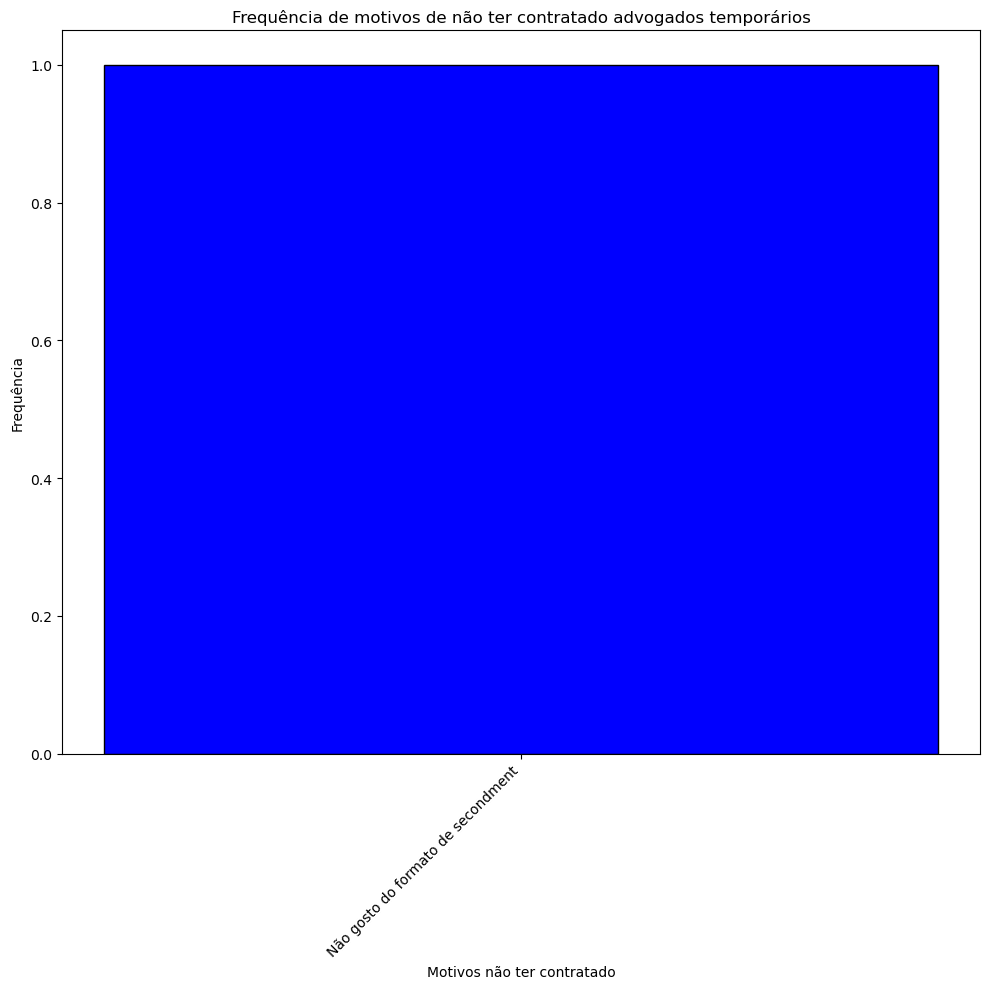

In [87]:
q10B_series = data_alimentos['Q10B'].dropna().astype(str)
all_choices_q10B = []
for resp in q10B_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10B.extend(choices)
counts_q10B = pd.Series(all_choices_q10B).value_counts()
descricao_map_q10B = {
    '1': 'Prefiro contratar um serviço interno',
    '2': 'Prefiro contratar um escritório de advocacia',
    '3': 'Nunca tive necessidade',
    '4': 'Não gosto do formato de secondment',
    '5': 'Não conheço bem esses serviços',
    '6': 'Outro:',
}
counts_q10B.index = counts_q10B.index.map(descricao_map_q10B)
plt.figure(figsize=(10,10))
plt.bar(counts_q10B.index, counts_q10B.values, color='blue', edgecolor='black')
plt.xlabel('Motivos não ter contratado')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de não ter contratado advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

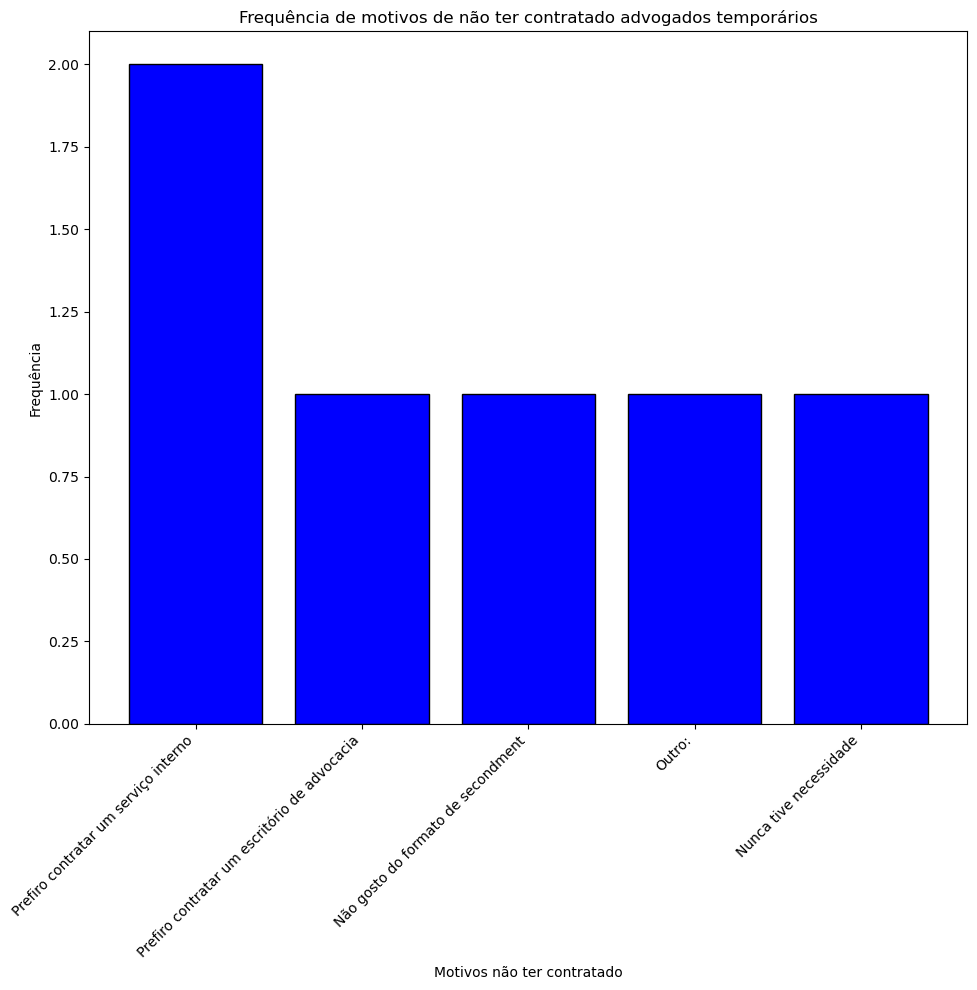

In [88]:
q10B_series = data_equipe_pequena['Q10B'].dropna().astype(str)
all_choices_q10B = []
for resp in q10B_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10B.extend(choices)
all_choices_q10B.remove('7')
counts_q10B = pd.Series(all_choices_q10B).value_counts()
descricao_map_q10B = {
    '1': 'Prefiro contratar um serviço interno',
    '2': 'Prefiro contratar um escritório de advocacia',
    '3': 'Nunca tive necessidade',
    '4': 'Não gosto do formato de secondment',
    '5': 'Não conheço bem esses serviços',
    '6': 'Outro:',
}
counts_q10B.index = counts_q10B.index.map(descricao_map_q10B)
plt.figure(figsize=(10,10))
plt.bar(counts_q10B.index, counts_q10B.values, color='blue', edgecolor='black')
plt.xlabel('Motivos não ter contratado')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de não ter contratado advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

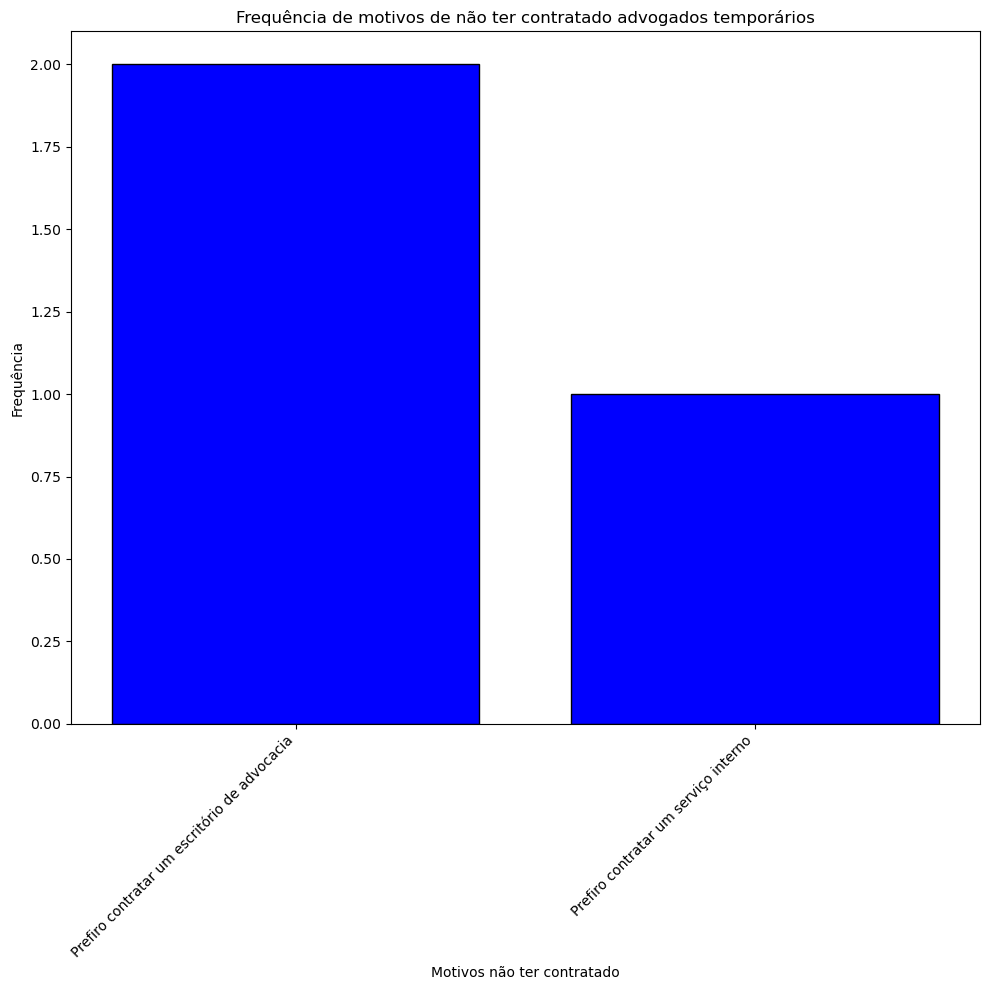

In [89]:
q10B_series = data_equipe_média['Q10B'].dropna().astype(str)
all_choices_q10B = []
for resp in q10B_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10B.extend(choices)
counts_q10B = pd.Series(all_choices_q10B).value_counts()
descricao_map_q10B = {
    '1': 'Prefiro contratar um serviço interno',
    '2': 'Prefiro contratar um escritório de advocacia',
    '3': 'Nunca tive necessidade',
    '4': 'Não gosto do formato de secondment',
    '5': 'Não conheço bem esses serviços',
    '6': 'Outro:',
}
counts_q10B.index = counts_q10B.index.map(descricao_map_q10B)
plt.figure(figsize=(10,10))
plt.bar(counts_q10B.index, counts_q10B.values, color='blue', edgecolor='black')
plt.xlabel('Motivos não ter contratado')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de não ter contratado advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

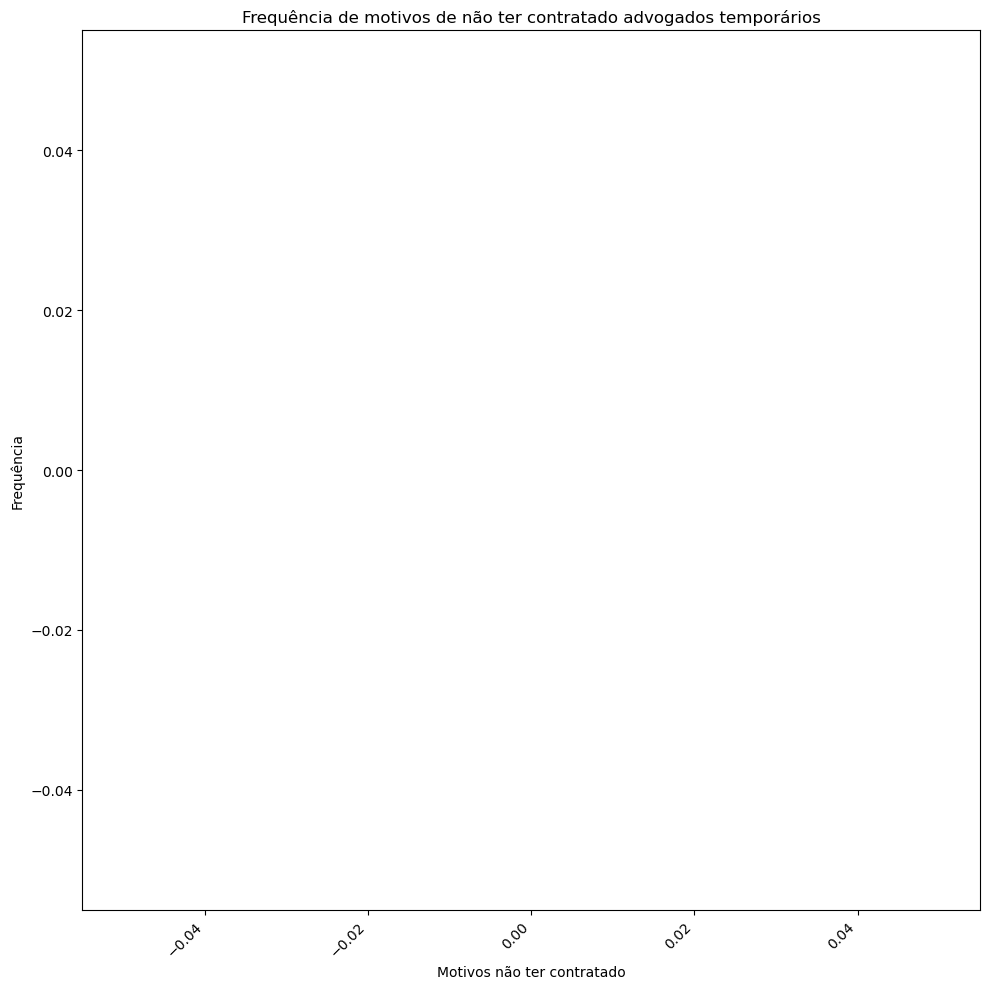

In [90]:
q10B_series = data_equipe_grande['Q10B'].dropna().astype(str)
all_choices_q10B = []
for resp in q10B_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10B.extend(choices)
counts_q10B = pd.Series(all_choices_q10B).value_counts()
descricao_map_q10B = {
    '1': 'Prefiro contratar um serviço interno',
    '2': 'Prefiro contratar um escritório de advocacia',
    '3': 'Nunca tive necessidade',
    '4': 'Não gosto do formato de secondment',
    '5': 'Não conheço bem esses serviços',
    '6': 'Outro:',
}
counts_q10B.index = counts_q10B.index.map(descricao_map_q10B)
plt.figure(figsize=(10,10))
plt.bar(counts_q10B.index, counts_q10B.values, color='blue', edgecolor='black')
plt.xlabel('Motivos não ter contratado')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de não ter contratado advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: Pelo fato de ter poucos dados fica difícl de fazer uma análise mas preferir contratar interno e contratar escritórios de advogacia são os motivos que mais prevalessem. Empresas com equipes grandes nunca não contrataram advogados temporários

# Q11(Você pretende utilizar o serviço de advogados temporários (Secondment) futuramente? )

In [91]:
data['Q11'].value_counts(dropna=False)

Q11
1    14
2     6
3     6
Name: count, dtype: int64

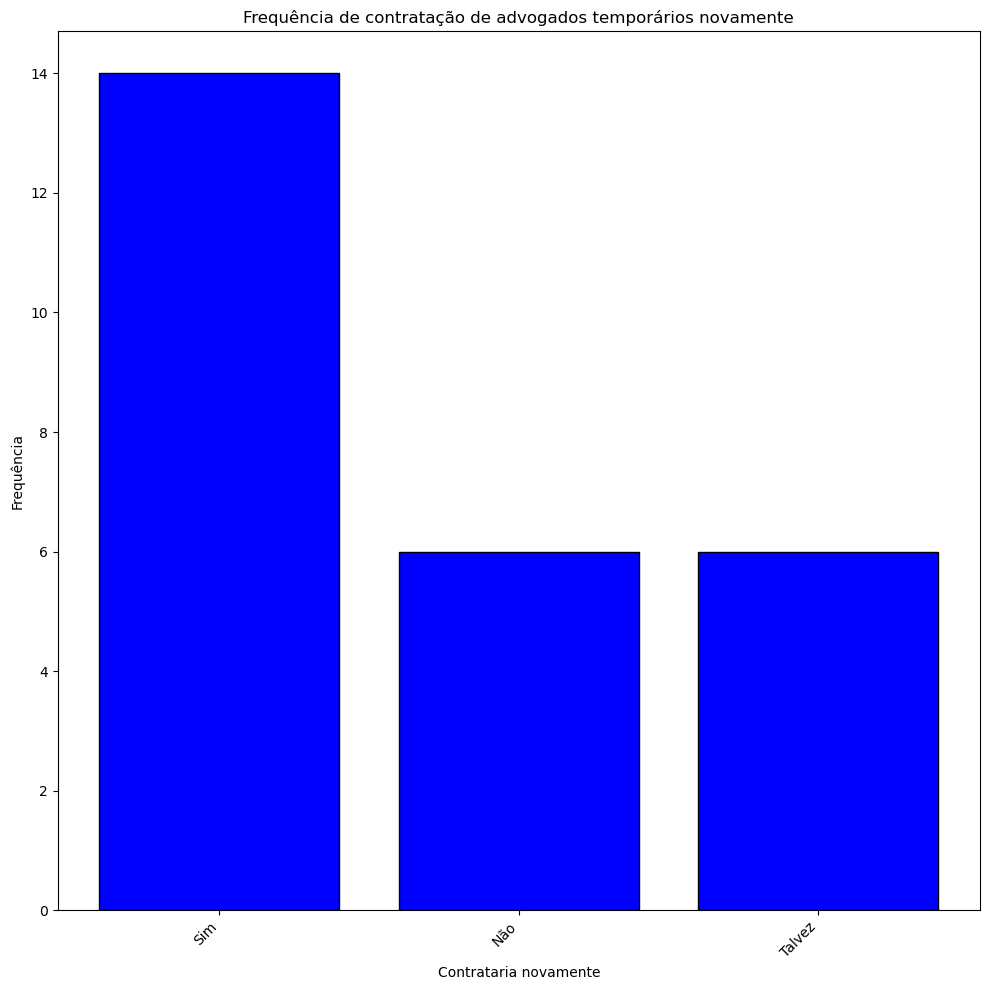

In [92]:
q11_series = data['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vendo por setor

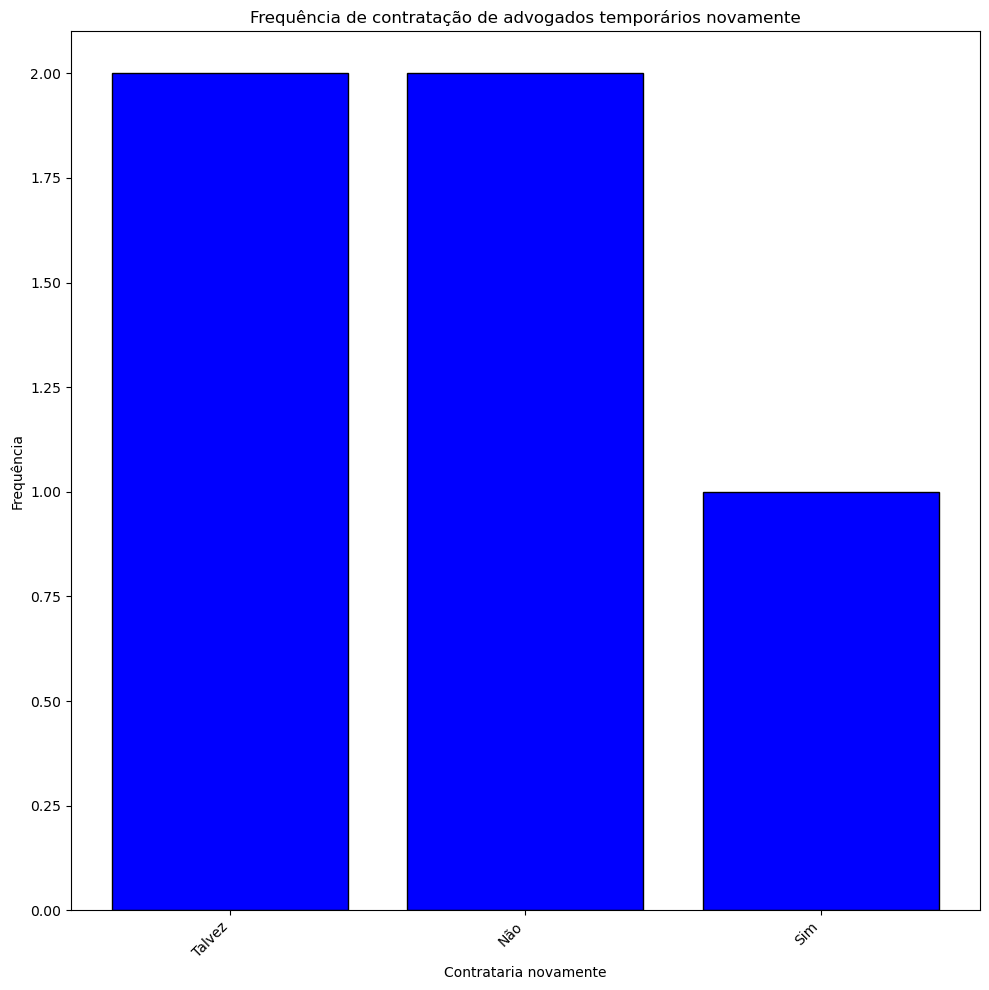

In [93]:
q11_series = data_servicos_financeiros['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

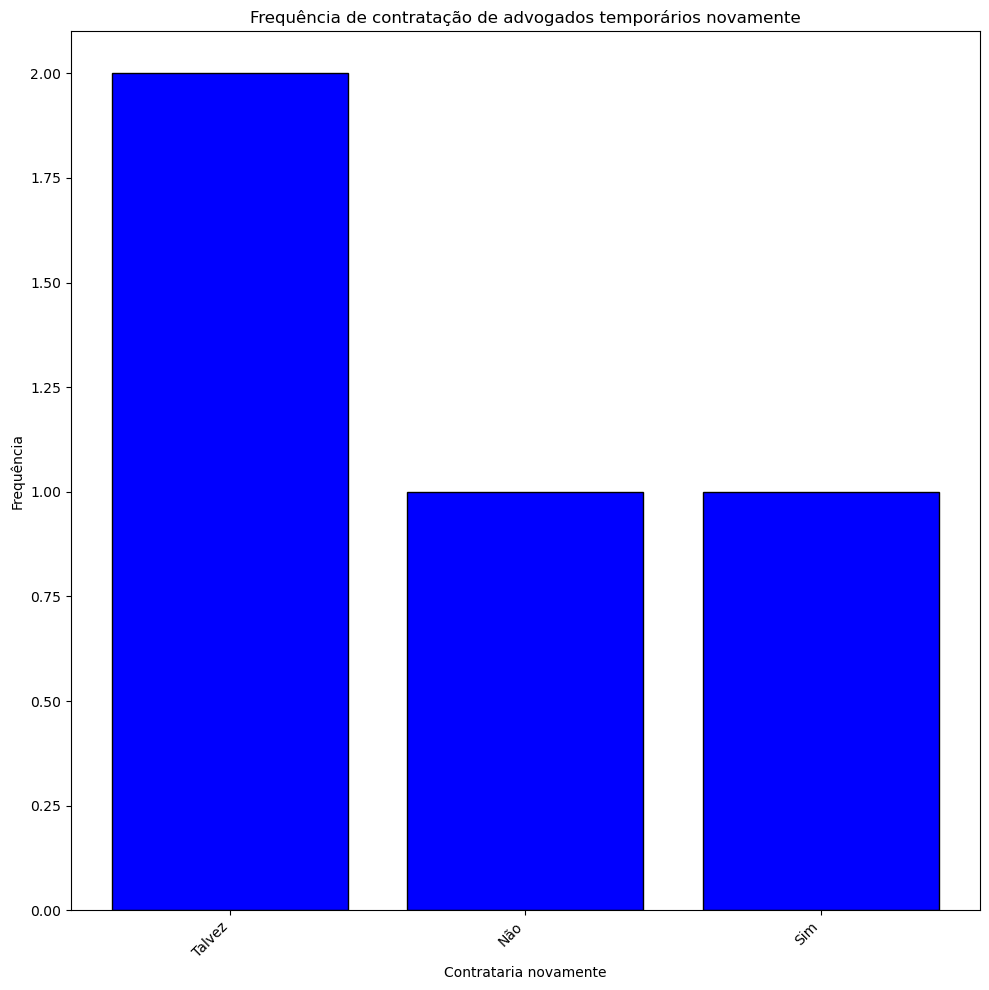

In [94]:
q11_series = data_alimentos['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Por tamamnho de equipe

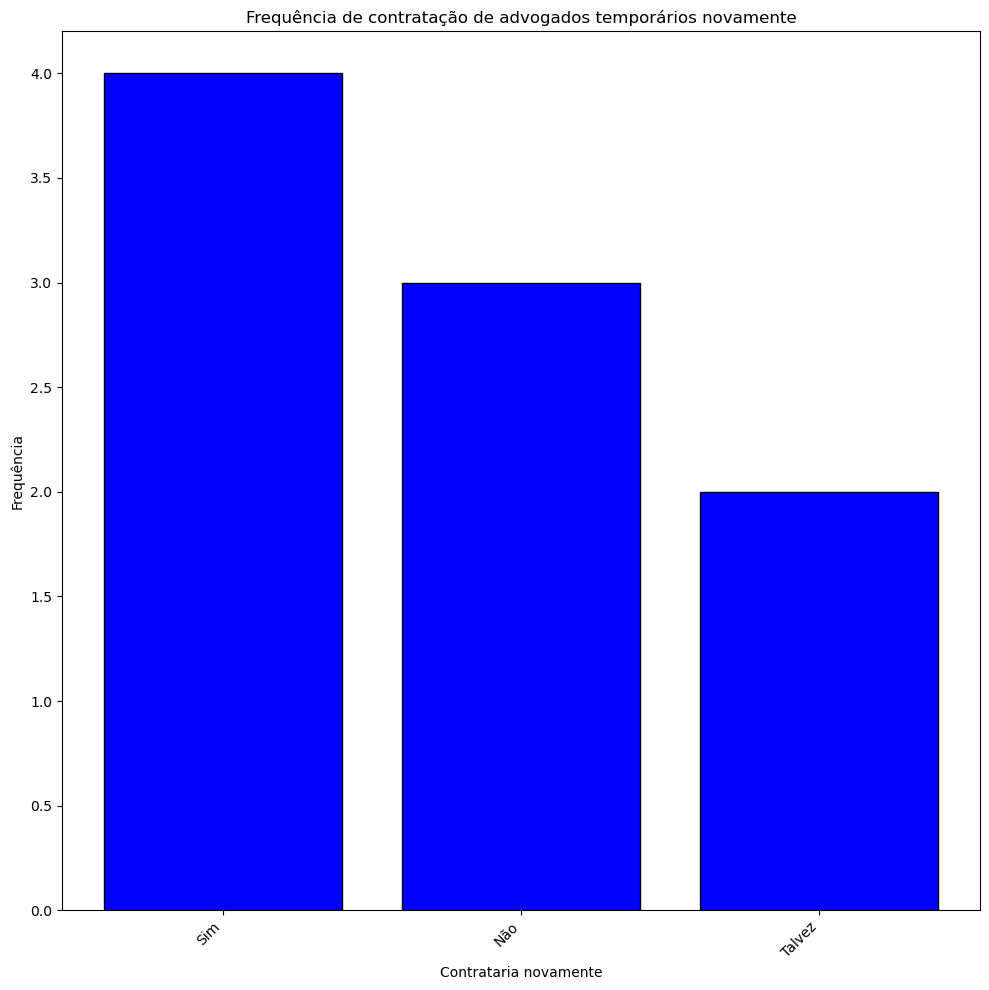

In [95]:
q11_series = data_equipe_pequena['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

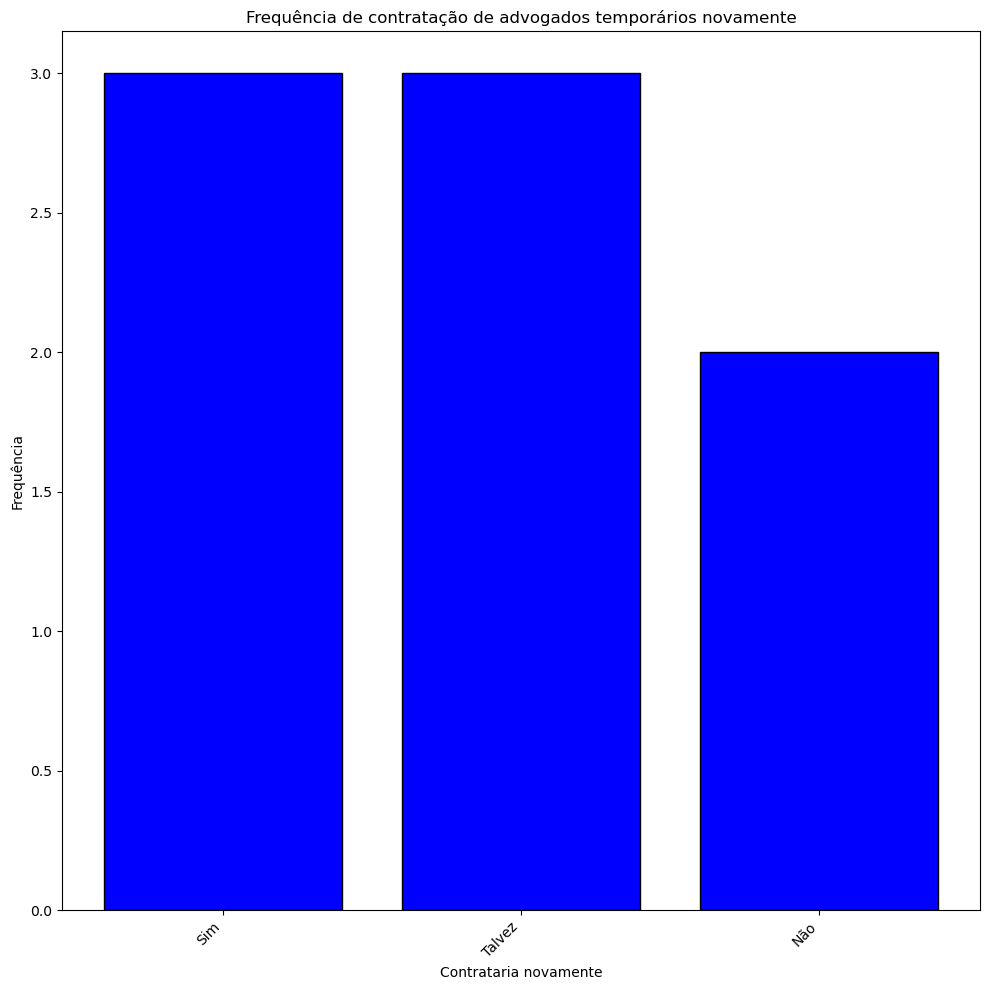

In [96]:
q11_series = data_equipe_média['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

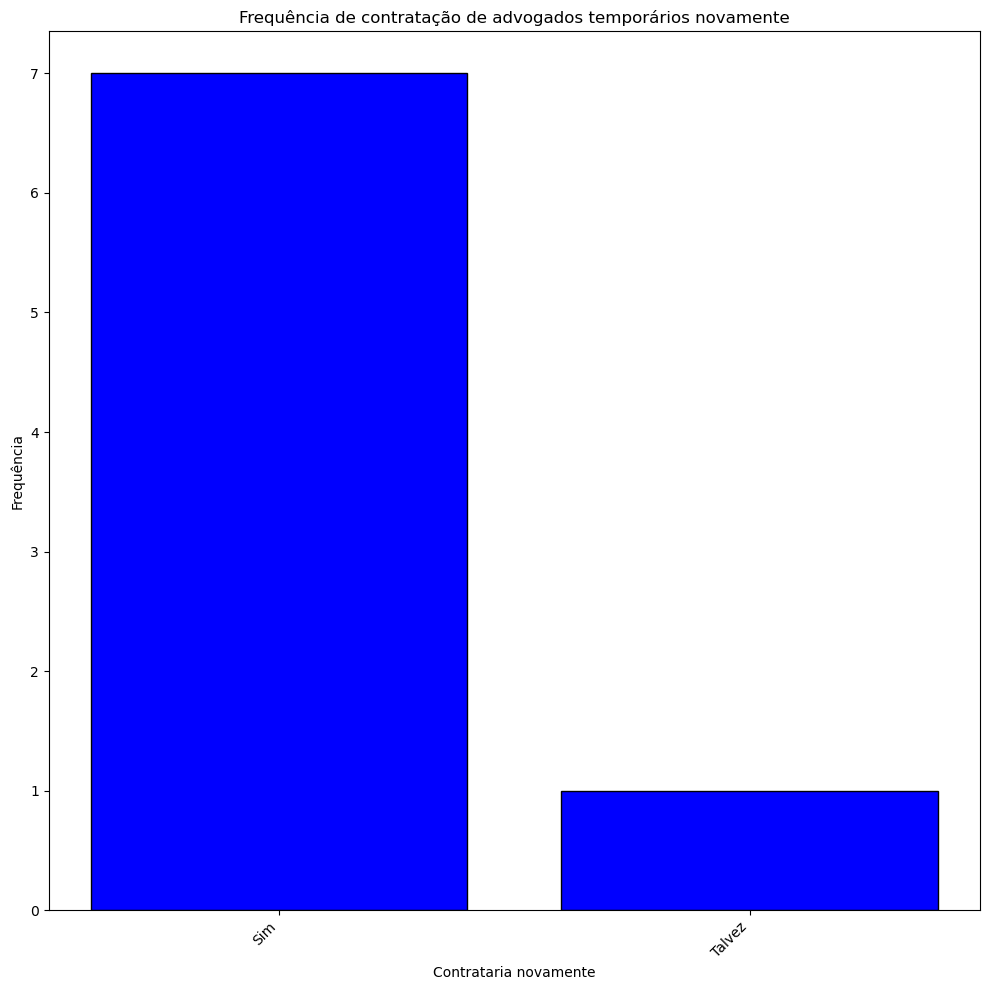

In [97]:
q11_series = data_equipe_grande['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: A maioria contrataria, vendo por setor, tanto o alimenticio e o financeiro tendem a nao, olhando para tamanho de equipe, pequena e média é bem divido, mas mais tendendo para Sim, já grande é bem mais tendendo para Sim

Analisado motivos de nao contratar no futuro 

In [98]:
data['Q11_2_TEXT'].value_counts()

Q11_2_TEXT
Não tenho interesse                                                                                      1
O valor da contratação não compensa                                                                      1
Prefiro uma pessoa que entenda melhor do business, que saiba das especificidades da área que atuamos.    1
não deixa um legado para o cliente interno, mas apenas preenche um vazio temporário                      1
nao sei                                                                                                  1
é muito sensivel a inclusão no ambiente interno                                                          1
Name: count, dtype: int64

Analisando motivos de Talvez

In [99]:
data['Q11_3_TEXT'].value_counts()

Q11_3_TEXT
Depende da demanda                                                                              1
se for necessário.                                                                              1
Em momentos de demanda alta, porém, provisória                                                  1
A depender do volume de trabalho e do nível de complexidade das demandas, pode ser uma opção    1
Dependendo da flutuação de demanda e equipe, é necessário a contratação                         1
Impossibilidade de contratação interna                                                          1
Name: count, dtype: int64

A demanda é o principal motivo de contratar ou não para aqeuels que votaram talvez

# Q12(Quais empresas você enxerga como referência no mercado de advogados temporários? (Selecione uma ou mais opções, caso necessário))

In [100]:
data['Q12'].value_counts(dropna=False)

Q12
4        11
5         8
6         3
1,4,6     1
3,4       1
1,4       1
3         1
Name: count, dtype: int64

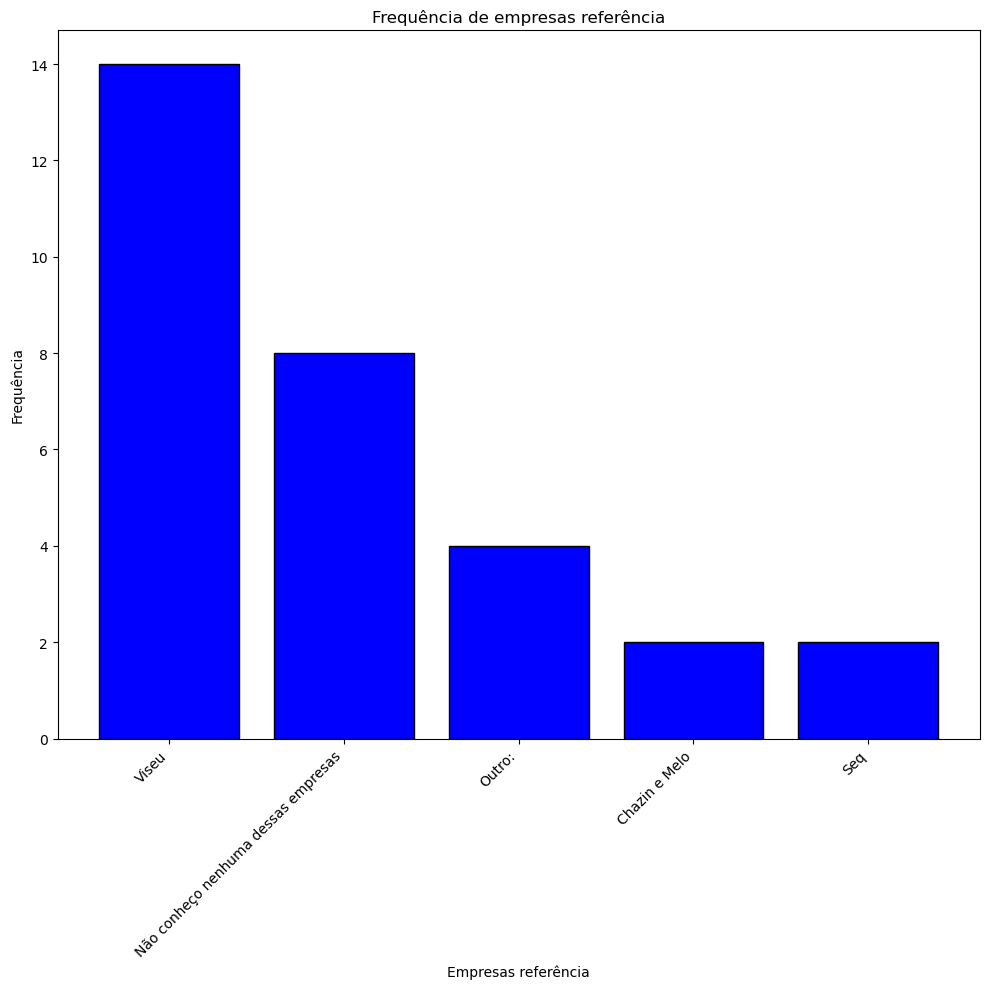

In [101]:
q12_series = data['Q12'].dropna().astype(str)
all_choices_q12 = []
for resp in q12_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q12.extend(choices)
counts_q12 = pd.Series(all_choices_q12).value_counts()
descricao_map_q12 = {
    '1': 'Chazin e Melo',
    '3': 'Seq',
    '4': 'Viseu',
    '5': 'Não conheço nenhuma dessas empresas',
    '6':'Outro:'
}
counts_q12.index = counts_q12.index.map(descricao_map_q12)
plt.figure(figsize=(10,10))
plt.bar(counts_q12.index, counts_q12.values, color='blue', edgecolor='black')
plt.xlabel('Empresas referência')
plt.ylabel('Frequência')
plt.title('Frequência de empresas referência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [102]:
data['Q12_6_TEXT'].value_counts()

Q12_6_TEXT
Villemor Amaral Advogados                                                                                                                                                              1
Robert Half                                                                                                                                                                            1
tive problemas com candidatos de secondment que confirmavam a disponibilidade e depois declinavam, portanto, entendo mais pertinente contratar de escritórios.                         1
Depende do tipo de demanda. Para demandas contratuais de menor complexidade, utilizamos escritorios menores e mais especializados; se para contencioso, dependente da especialidade    1
Name: count, dtype: int64

Acredito que respostas de outras perguntas vieram parar aqui

Vamos ver se o setor impacta quais empresas são as mais conhecidas

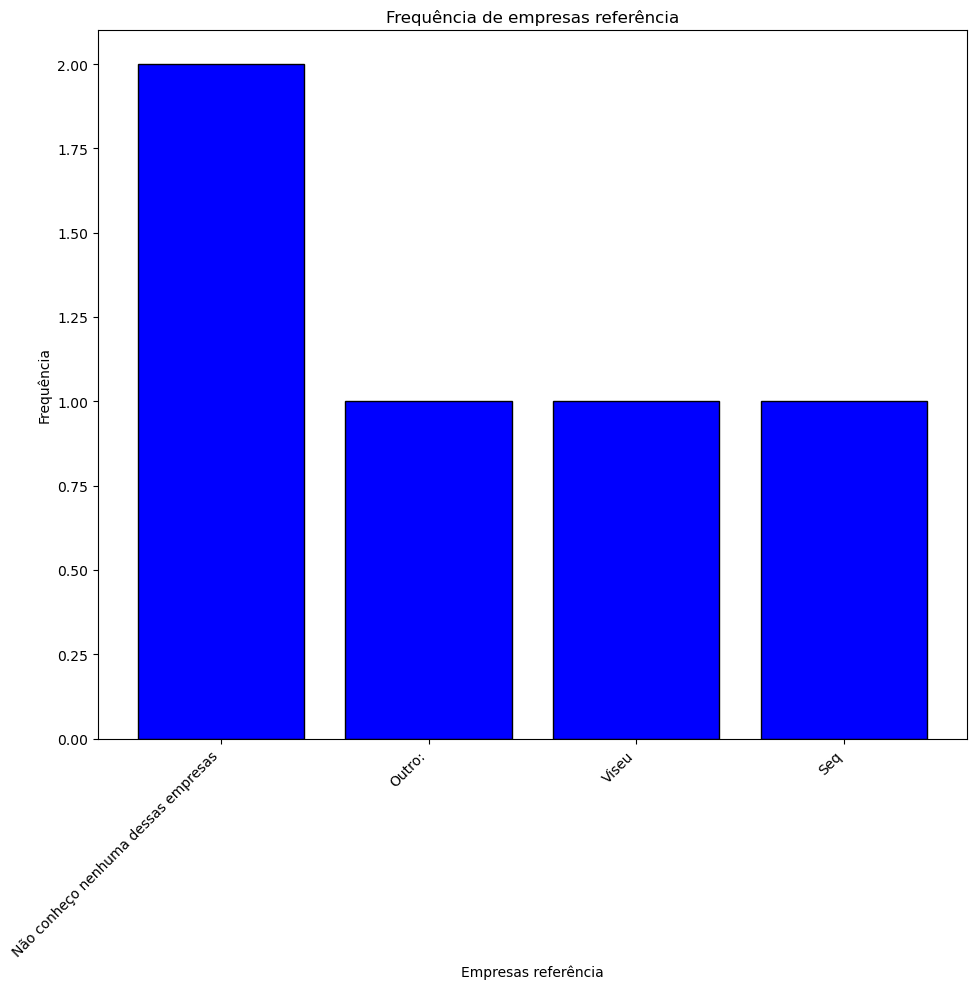

In [103]:
q12_series = data_servicos_financeiros['Q12'].dropna().astype(str)
all_choices_q12 = []
for resp in q12_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q12.extend(choices)
counts_q12 = pd.Series(all_choices_q12).value_counts()
descricao_map_q12 = {
    '1': 'Chazin e Melo',
    '3': 'Seq',
    '4': 'Viseu',
    '5': 'Não conheço nenhuma dessas empresas',
    '6':'Outro:'
}
counts_q12.index = counts_q12.index.map(descricao_map_q12)
plt.figure(figsize=(10,10))
plt.bar(counts_q12.index, counts_q12.values, color='blue', edgecolor='black')
plt.xlabel('Empresas referência')
plt.ylabel('Frequência')
plt.title('Frequência de empresas referência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

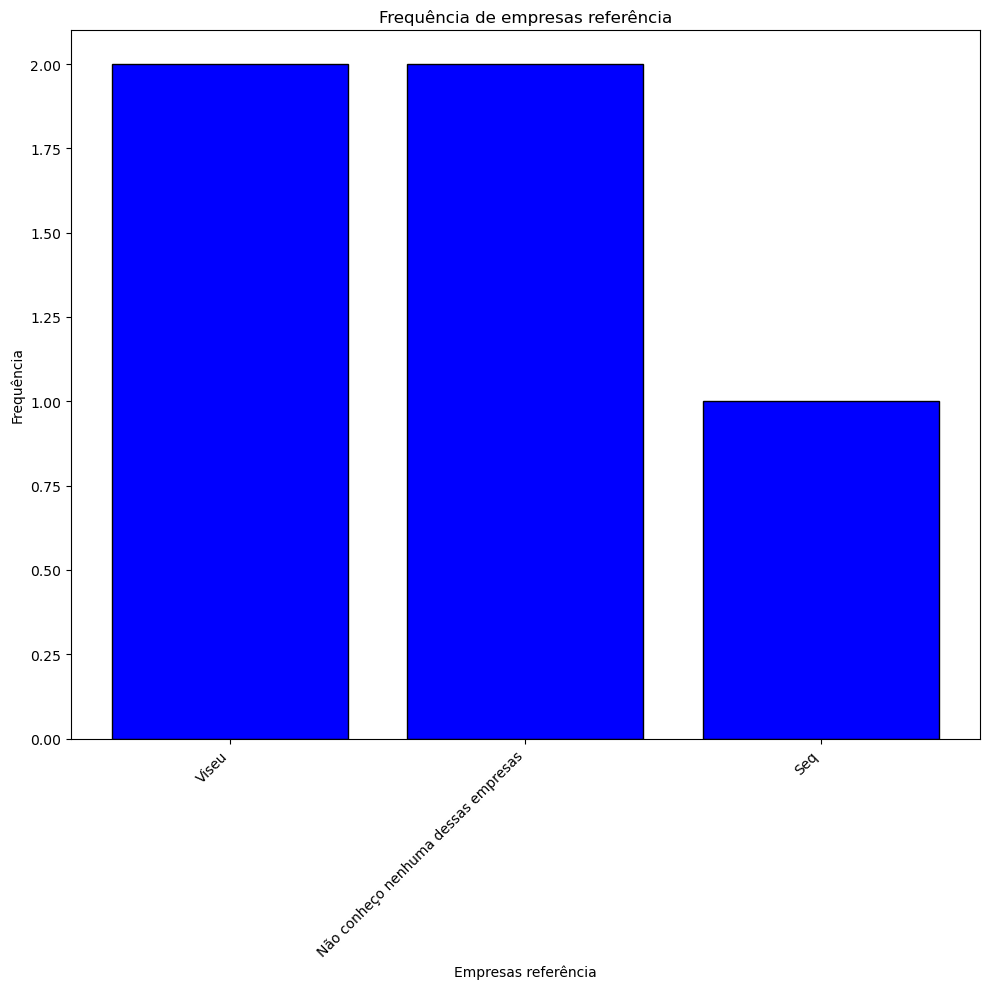

In [104]:
q12_series = data_alimentos['Q12'].dropna().astype(str)
all_choices_q12 = []
for resp in q12_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q12.extend(choices)
counts_q12 = pd.Series(all_choices_q12).value_counts()
descricao_map_q12 = {
    '1': 'Chazin e Melo',
    '3': 'Seq',
    '4': 'Viseu',
    '5': 'Não conheço nenhuma dessas empresas',
    '6':'Outro:'
}
counts_q12.index = counts_q12.index.map(descricao_map_q12)
plt.figure(figsize=(10,10))
plt.bar(counts_q12.index, counts_q12.values, color='blue', edgecolor='black')
plt.xlabel('Empresas referência')
plt.ylabel('Frequência')
plt.title('Frequência de empresas referência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vamos ver tamanho da equipe jurídica

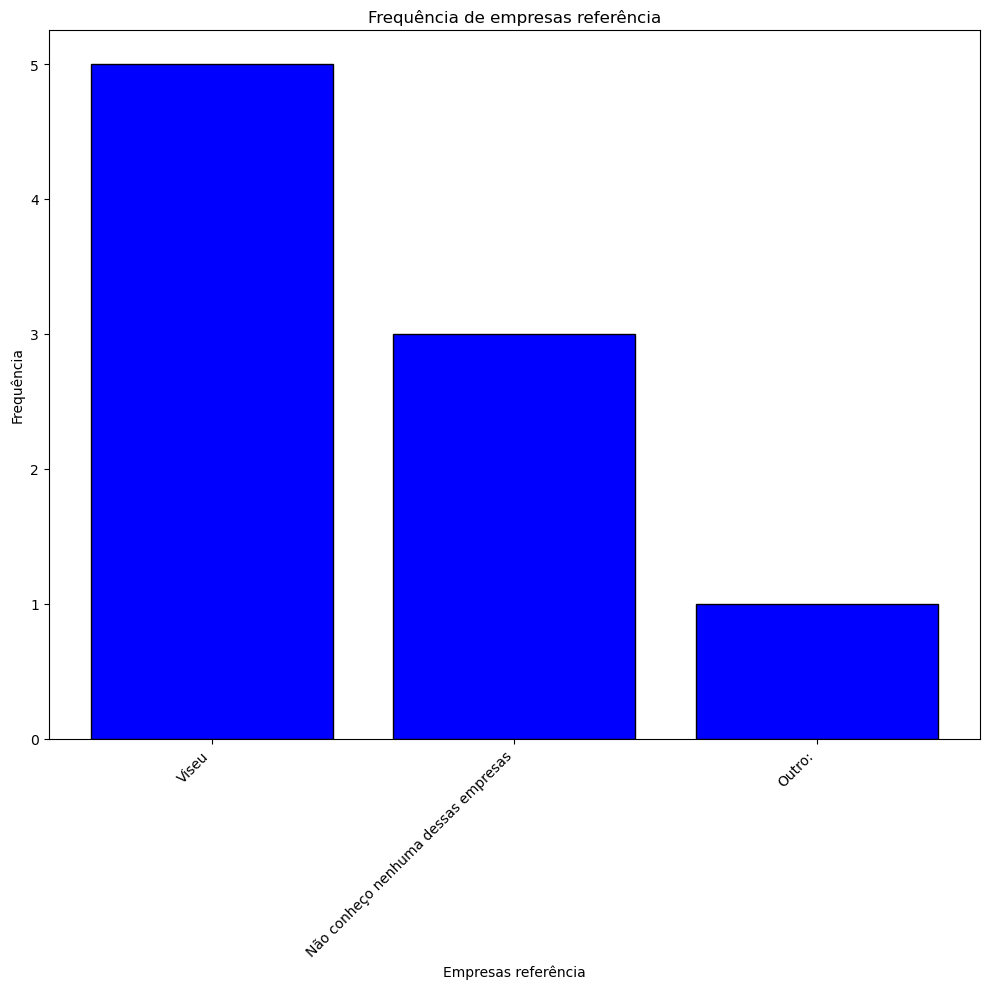

In [105]:
q12_series = data_equipe_pequena['Q12'].dropna().astype(str)
all_choices_q12 = []
for resp in q12_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q12.extend(choices)
counts_q12 = pd.Series(all_choices_q12).value_counts()
descricao_map_q12 = {
    '1': 'Chazin e Melo',
    '3': 'Seq',
    '4': 'Viseu',
    '5': 'Não conheço nenhuma dessas empresas',
    '6':'Outro:'
}
counts_q12.index = counts_q12.index.map(descricao_map_q12)
plt.figure(figsize=(10,10))
plt.bar(counts_q12.index, counts_q12.values, color='blue', edgecolor='black')
plt.xlabel('Empresas referência')
plt.ylabel('Frequência')
plt.title('Frequência de empresas referência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

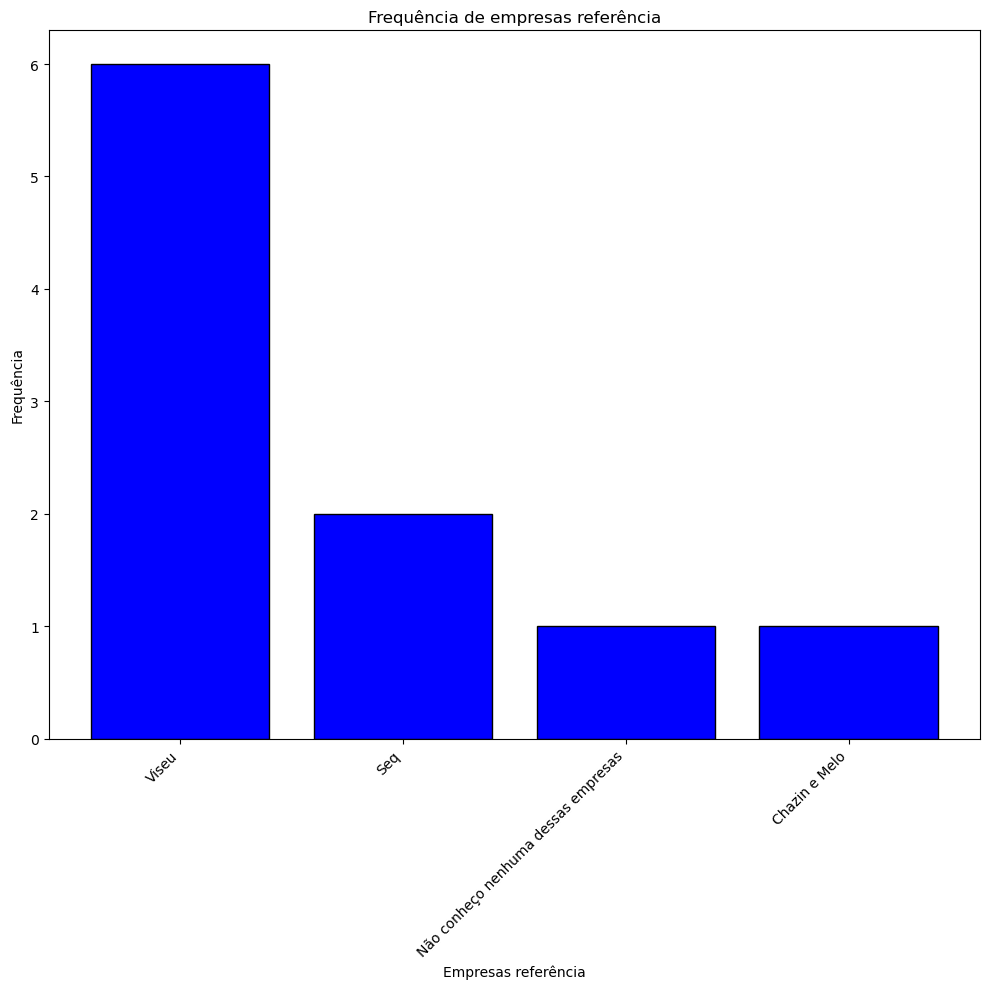

In [106]:
q12_series = data_equipe_média['Q12'].dropna().astype(str)
all_choices_q12 = []
for resp in q12_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q12.extend(choices)
counts_q12 = pd.Series(all_choices_q12).value_counts()
descricao_map_q12 = {
    '1': 'Chazin e Melo',
    '3': 'Seq',
    '4': 'Viseu',
    '5': 'Não conheço nenhuma dessas empresas',
    '6':'Outro:'
}
counts_q12.index = counts_q12.index.map(descricao_map_q12)
plt.figure(figsize=(10,10))
plt.bar(counts_q12.index, counts_q12.values, color='blue', edgecolor='black')
plt.xlabel('Empresas referência')
plt.ylabel('Frequência')
plt.title('Frequência de empresas referência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

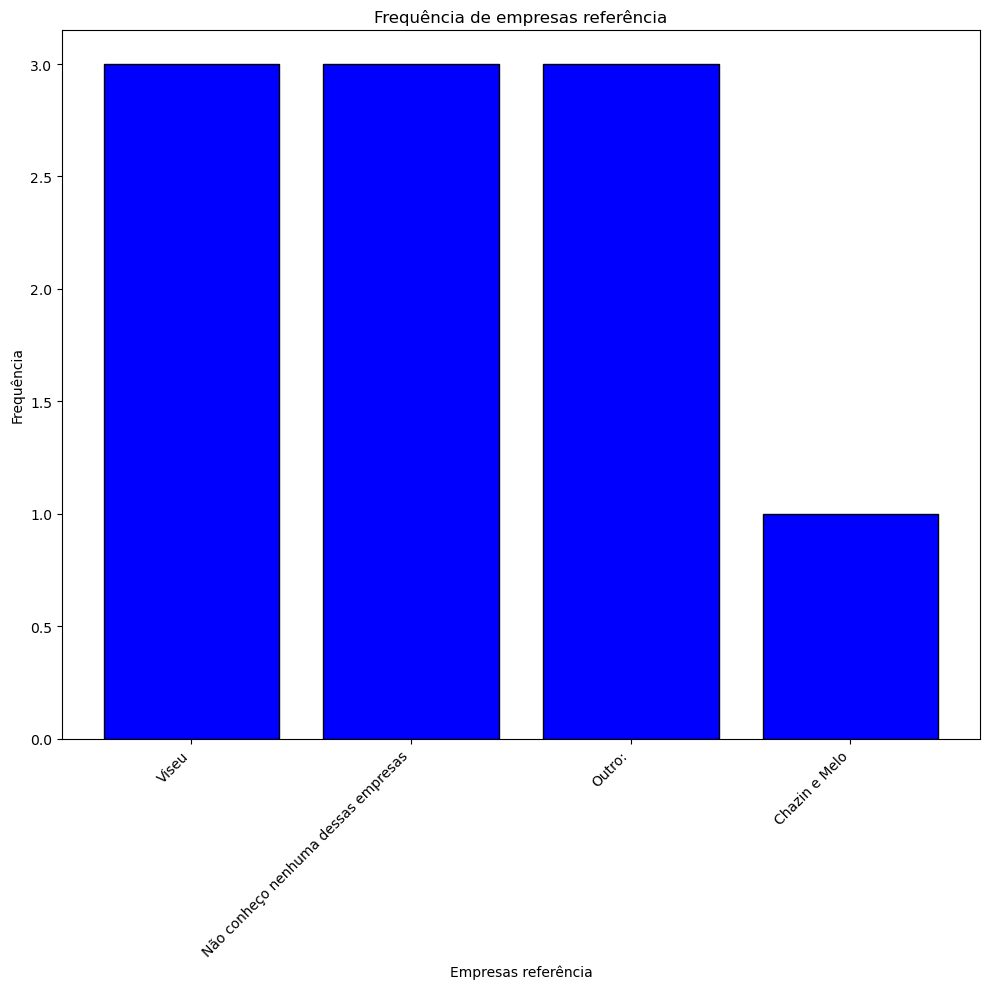

In [107]:
q12_series = data_equipe_grande['Q12'].dropna().astype(str)
all_choices_q12 = []
for resp in q12_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q12.extend(choices)
counts_q12 = pd.Series(all_choices_q12).value_counts()
descricao_map_q12 = {
    '1': 'Chazin e Melo',
    '3': 'Seq',
    '4': 'Viseu',
    '5': 'Não conheço nenhuma dessas empresas',
    '6':'Outro:'
}
counts_q12.index = counts_q12.index.map(descricao_map_q12)
plt.figure(figsize=(10,10))
plt.bar(counts_q12.index, counts_q12.values, color='blue', edgecolor='black')
plt.xlabel('Empresas referência')
plt.ylabel('Frequência')
plt.title('Frequência de empresas referência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: Viseu predomina mas muitos não conheciam nenhuma das empressas

# Q13

In [108]:
data['Q13'].value_counts(dropna=False)

Q13
NaN                                                                                                                                                                                                                    19
nao obrigada                                                                                                                                                                                                            1
Não.                                                                                                                                                                                                                    1
por favor tratar as informações de forma confidencial e anonimizada.                                                                                                                                                    1
nao sei se tinha q responder essa pesquisa                                                                                  

# Q6xQ7(Qual o desafio mais comum daquelas que tercerizam os adovgados?)

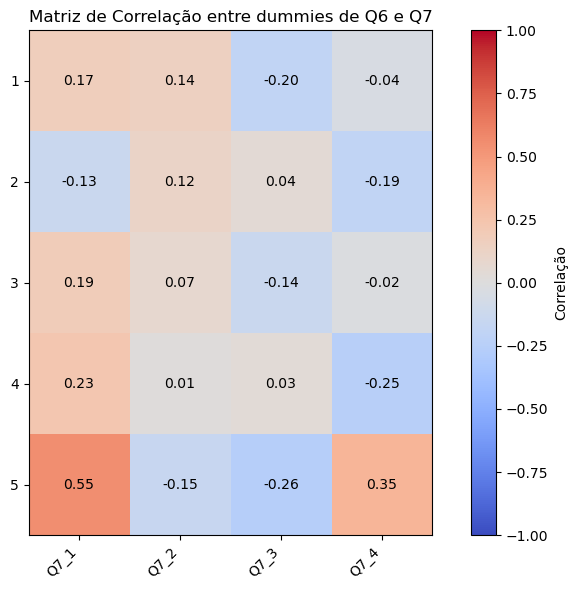

In [109]:

q6_dummies = data['Q6']
q6_dummies = q6_dummies.str.get_dummies(sep=',')

q7_dummies = pd.get_dummies(data['Q7'], prefix='Q7')

dummies = pd.concat([q6_dummies, q7_dummies], axis=1)
corr_matrix = dummies.corr()
q6_columns = q6_dummies.columns  
q7_columns = q7_dummies.columns 

corr_q6_q7 = corr_matrix.loc[q6_columns, q7_columns]

plt.figure(figsize=(8, 6))
plt.imshow(corr_q6_q7, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlação')

# Define os rótulos dos eixos
plt.xticks(ticks=np.arange(len(q7_columns)), labels=q7_columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(q6_columns)), labels=q6_columns)
plt.title('Matriz de Correlação entre dummies de Q6 e Q7')

# Anota cada valor de correlação dentro dos quadrados
for i in range(corr_q6_q7.shape[0]):
    for j in range(corr_q6_q7.shape[1]):
        plt.text(j, i, f"{corr_q6_q7.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

"Alta" correlação apenas entre Q7_1(advogados internos) e Q6_5(Outros), a Q7_3 que é os que tercerizam não tem alta relação nenhum da Q6

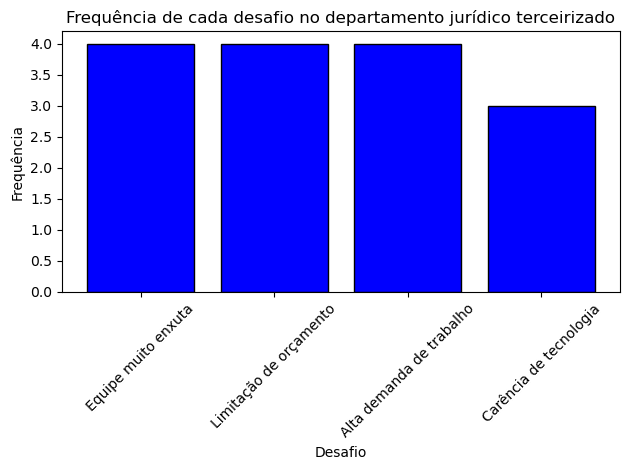

In [110]:
data_tercerizados=data[data['Q7']==3]

q6_series = data_tercerizados['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico terceirizado')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


Bem diluido

Vimos que equipes grandes são as que mais contratam advogados tercerizados, qual a maior dor dessas que contratam?

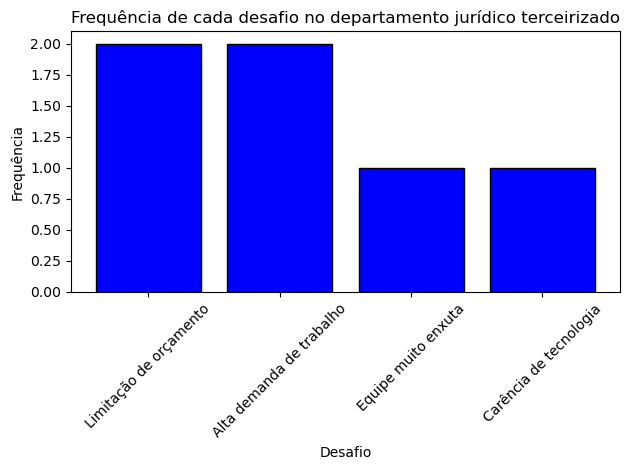

In [111]:
data_tercerizados=data_equipe_grande[data_equipe_grande['Q7']==3]

q6_series = data_tercerizados['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico terceirizado')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

Bem dividida

# Q6XQ9(Tem alguma dor mais tendenciosa de contratar os serviços)

In [112]:

data_novo = data.copy()
data_novo['ja_contratou'] = np.where(data_novo['Q9'] == 1, 0, 1)
q6_dummies = data_novo['Q6'].fillna('').str.get_dummies(sep=',')
q6_dummies.columns = [f"Q6_opcao_{col}" for col in q6_dummies.columns]
corr_data = pd.concat([q6_dummies, data_novo['ja_contratou']], axis=1)
corr_matrix = corr_data.corr()
corr_q6_ja_contratou = corr_matrix.loc[q6_dummies.columns, ['ja_contratou']]

print(corr_q6_ja_contratou)

            ja_contratou
Q6_opcao_1      0.031469
Q6_opcao_2     -0.215587
Q6_opcao_3     -0.024949
Q6_opcao_4     -0.195108
Q6_opcao_5      0.009733


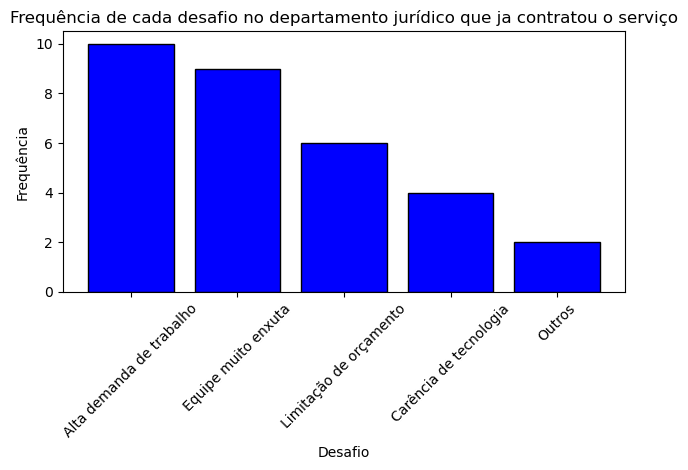

In [113]:
data_contratou = data_novo[data_novo['ja_contratou'] == 1]
q6_series = data_contratou['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico que ja contratou o serviço')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


Mesma coisa do plot de Q6 sozinho

e de não contratar?

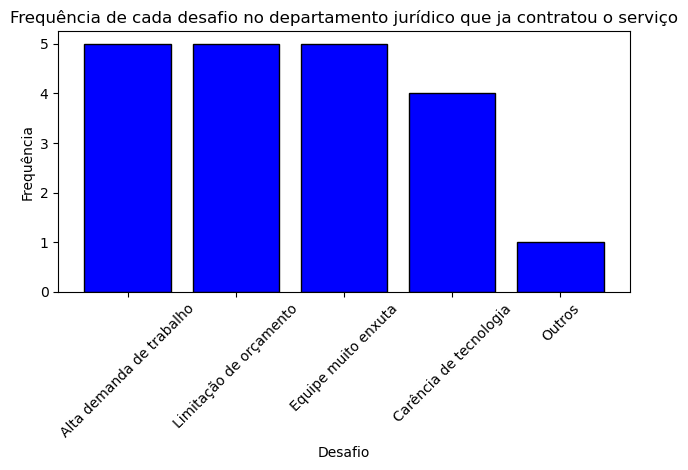

In [114]:
data_n_contratou = data_novo[data_novo['ja_contratou'] == 0]
q6_series = data_n_contratou['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico que ja contratou o serviço')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


Quais dores que contratam os servicos mais gostam desse serviço?

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2698788252.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_1 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


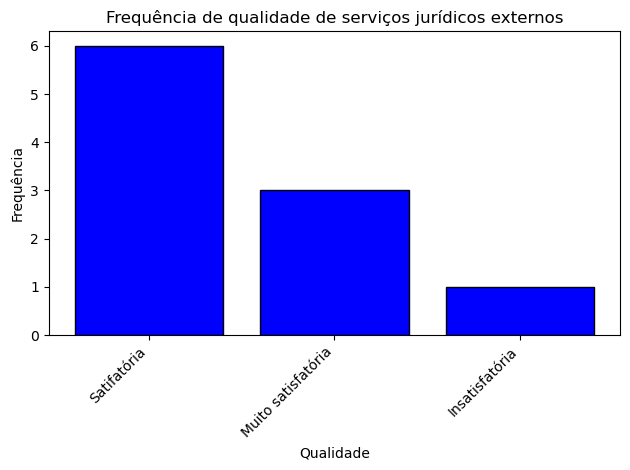

In [115]:
data_q6_1 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q9_series = data_q6_1['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2550134292.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_2 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


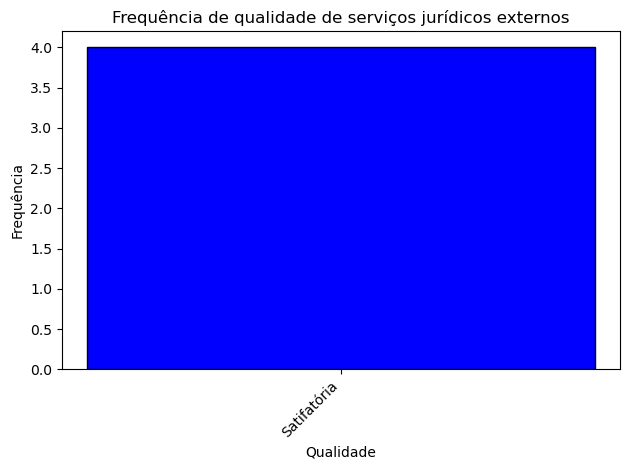

In [116]:
data_q6_2 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q9_series = data_q6_2['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/4255420045.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_3 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


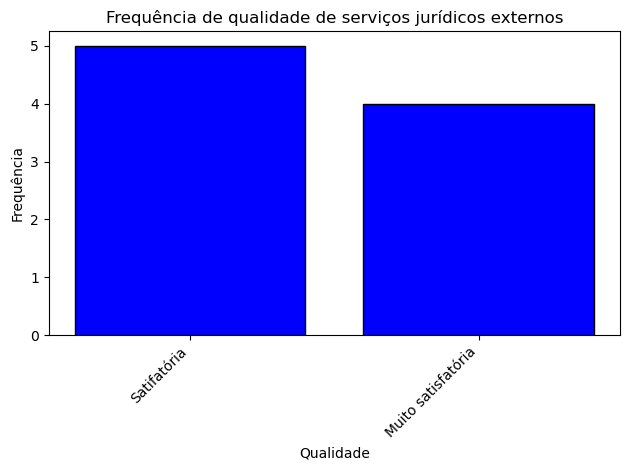

In [117]:
data_q6_3 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q9_series = data_q6_3['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1880306837.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_4 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


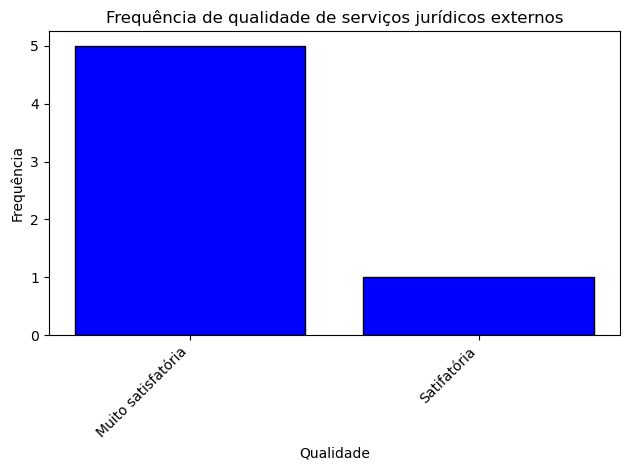

In [118]:
data_q6_4 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q9_series = data_q6_4['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3039157491.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_5 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


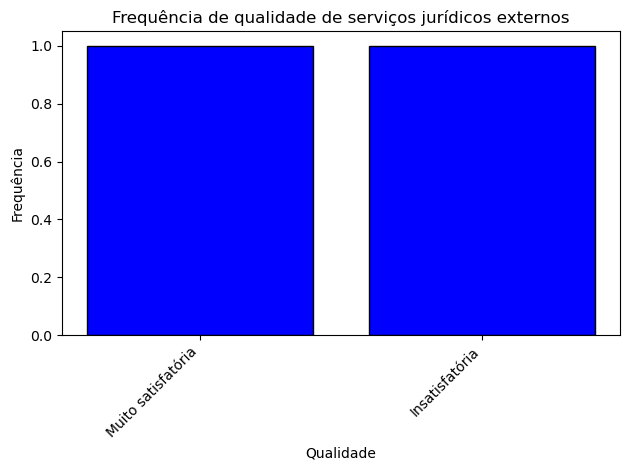

In [119]:
data_q6_5 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q9_series = data_q6_5['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q6XQ8XQ9(Dado as dores quais os valores mais ou mneos propicios a utilizar o servico?)

Analise dos que já contrataram

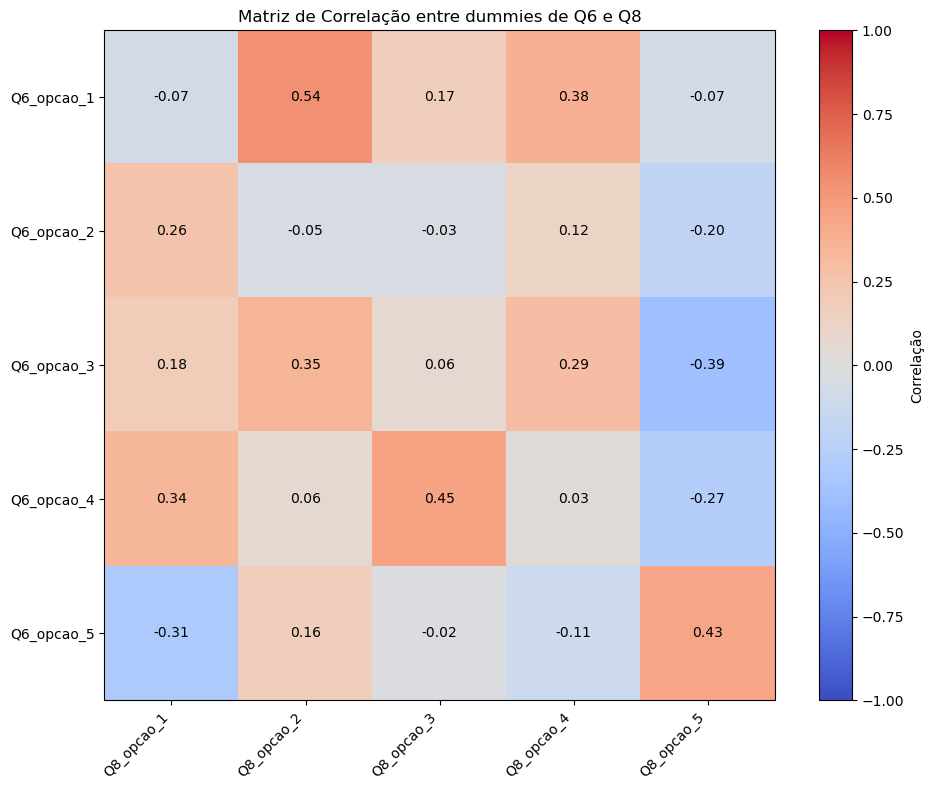

In [120]:


# --- Para Q6 ---
# Preenche valores ausentes e cria as dummies para Q6
q6_dummies = data_contratou['Q6'].fillna('').str.get_dummies(sep=',')
# Renomeia as colunas para identificar a origem (opcional)
q6_dummies.columns = [f"Q6_opcao_{col}" for col in q6_dummies.columns]

# --- Para Q8 ---
# Preenche valores ausentes e cria as dummies para Q8
q8_dummies = data_contratou['Q8'].fillna('').str.get_dummies(sep=',')
# Renomeia as colunas para identificar a origem (opcional)
q8_dummies.columns = [f"Q8_opcao_{col}" for col in q8_dummies.columns]

# --- Combina as dummies de Q6 e Q8 em um único DataFrame ---
dummies = pd.concat([q6_dummies, q8_dummies], axis=1)

# Calcula a matriz de correlação entre todas as dummies
corr_matrix = dummies.corr()

# Extrai a submatriz que relaciona as dummies de Q6 com as de Q8
q6_columns = q6_dummies.columns
q8_columns = q8_dummies.columns
corr_q6_q8 = corr_matrix.loc[q6_columns, q8_columns]

# --- Plot da Matriz de Correlação ---
plt.figure(figsize=(10, 8))
plt.imshow(corr_q6_q8, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlação')

# Configura os rótulos dos eixos
plt.xticks(ticks=np.arange(len(q8_columns)), labels=q8_columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(q6_columns)), labels=q6_columns)
plt.title('Matriz de Correlação entre dummies de Q6 e Q8')

# Anota os valores de correlação dentro de cada quadrado
for i in range(corr_q6_q8.shape[0]):
    for j in range(corr_q6_q8.shape[1]):
        plt.text(j, i, f"{corr_q6_q8.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


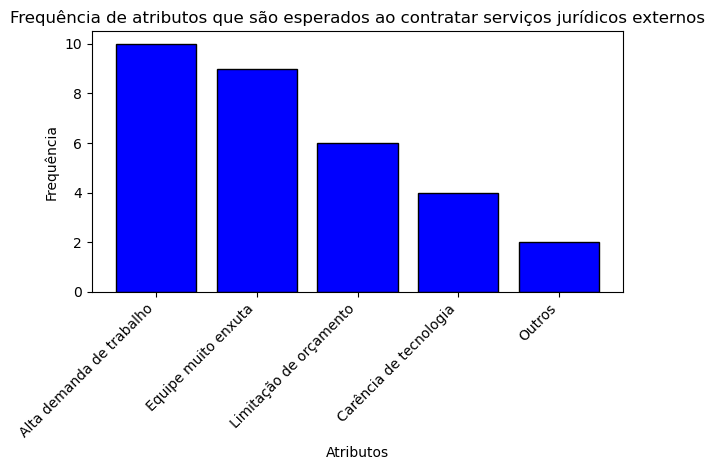

In [121]:
q6_series = data_contratou['Q6'].dropna().astype(str)
all_choices_q6 = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q6.extend(choices)

counts_q6 = pd.Series(all_choices_q6).value_counts()
descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}
counts_q6.index = counts_q6.index.map(descricao_map)
plt.bar(counts_q6.index, counts_q6.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mesmo padrão dos dados maiores

3 correlações se destacam, Q6_1 e Q8_2, Q6_4 e Q8_3 e Q6_5 e Q8_5

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3405024590.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_1 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


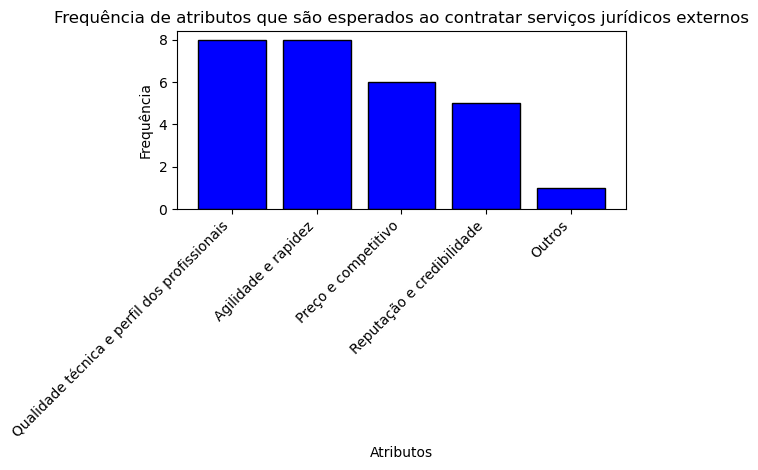

In [122]:

data_q6_1 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q8_series = data_q6_1['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1168388961.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_2 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


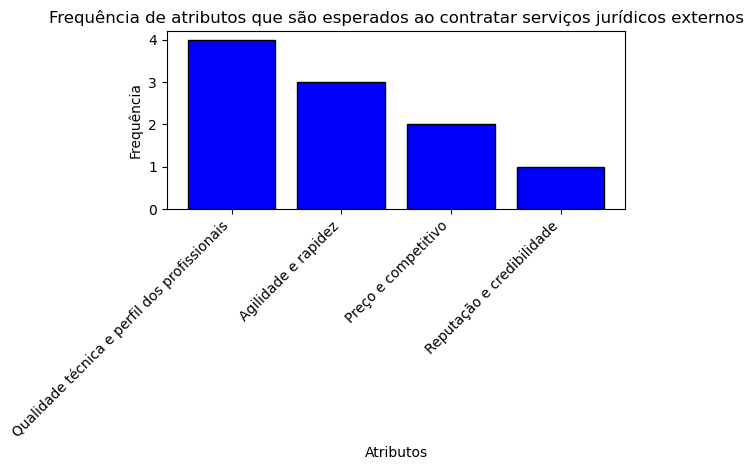

In [123]:

data_q6_2 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q8_series = data_q6_2['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/990854540.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_3 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


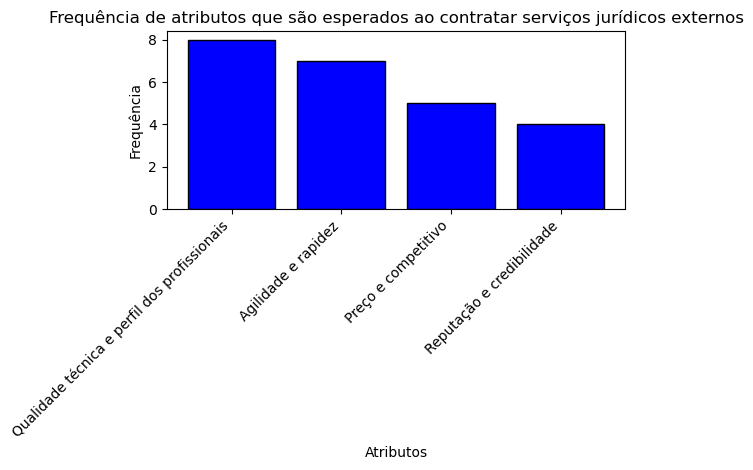

In [124]:

data_q6_3 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q8_series = data_q6_3['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3136580507.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_4 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


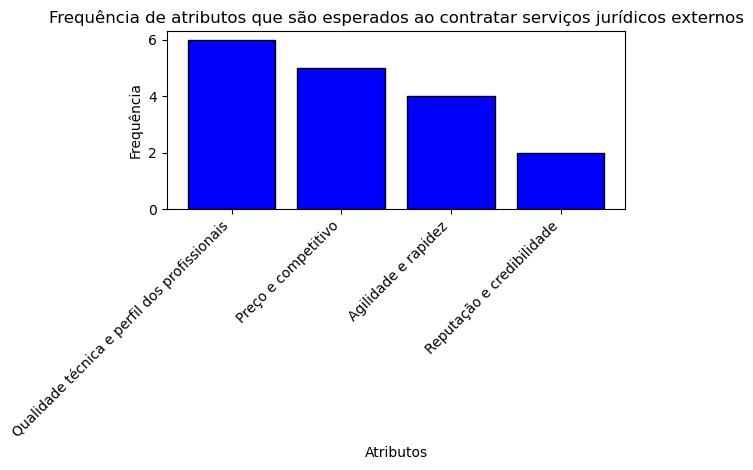

In [125]:

data_q6_4 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q8_series = data_q6_4['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2550167645.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_5 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


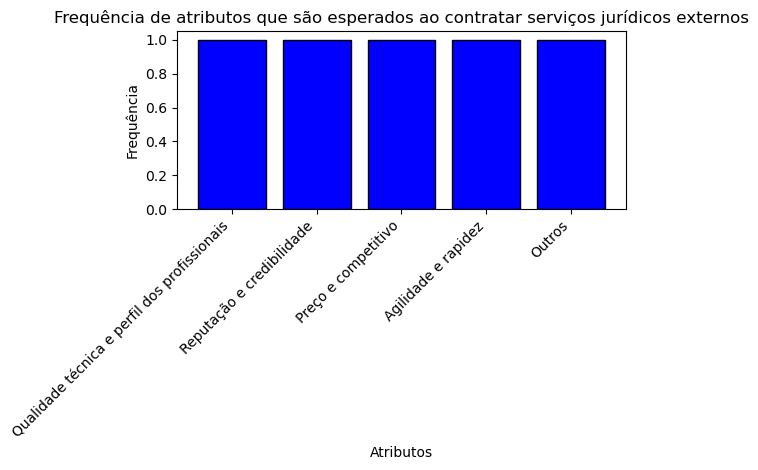

In [126]:

data_q6_5 = data_contratou[data_contratou['Q6'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q8_series = data_q6_5['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: Dos que já contrataram a Qualidade técnica e perfil dos profissionais idenpentende da dor é o valor mais importante, mas quando a dor é Alta demanda de trabalho, Reputação e credibilidade e quando a dor é Limitação de orçamento, Preço e competitivo ganha força

Analisando os que nunca contrataram

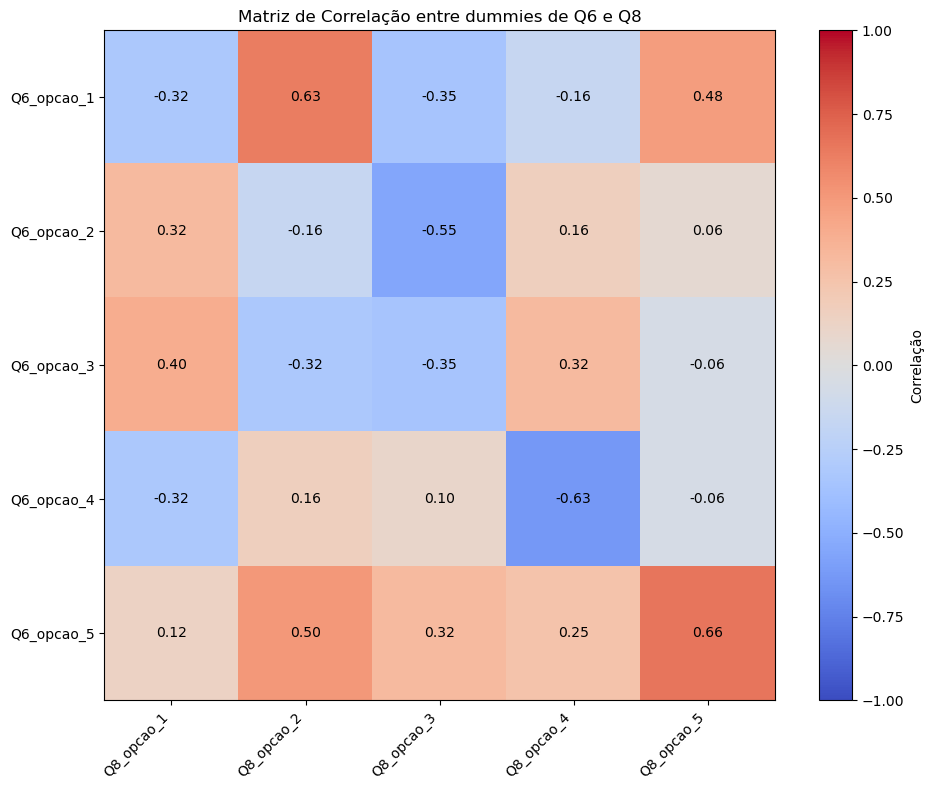

In [127]:

data_nao_contratou = data_novo[data_novo['ja_contratou'] == 0]
# --- Para Q6 ---
# Preenche valores ausentes e cria as dummies para Q6
q6_dummies = data_nao_contratou['Q6'].fillna('').str.get_dummies(sep=',')
# Renomeia as colunas para identificar a origem (opcional)
q6_dummies.columns = [f"Q6_opcao_{col}" for col in q6_dummies.columns]

# --- Para Q8 ---
# Preenche valores ausentes e cria as dummies para Q8
q8_dummies = data_nao_contratou['Q8'].fillna('').str.get_dummies(sep=',')
# Renomeia as colunas para identificar a origem (opcional)
q8_dummies.columns = [f"Q8_opcao_{col}" for col in q8_dummies.columns]

# --- Combina as dummies de Q6 e Q8 em um único DataFrame ---
dummies = pd.concat([q6_dummies, q8_dummies], axis=1)

# Calcula a matriz de correlação entre todas as dummies
corr_matrix = dummies.corr()

# Extrai a submatriz que relaciona as dummies de Q6 com as de Q8
q6_columns = q6_dummies.columns
q8_columns = q8_dummies.columns
corr_q6_q8 = corr_matrix.loc[q6_columns, q8_columns]

# --- Plot da Matriz de Correlação ---
plt.figure(figsize=(10, 8))
plt.imshow(corr_q6_q8, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlação')

# Configura os rótulos dos eixos
plt.xticks(ticks=np.arange(len(q8_columns)), labels=q8_columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(q6_columns)), labels=q6_columns)
plt.title('Matriz de Correlação entre dummies de Q6 e Q8')

# Anota os valores de correlação dentro de cada quadrado
for i in range(corr_q6_q8.shape[0]):
    for j in range(corr_q6_q8.shape[1]):
        plt.text(j, i, f"{corr_q6_q8.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

Vamos ver as maiores dores daqueles que não contratam

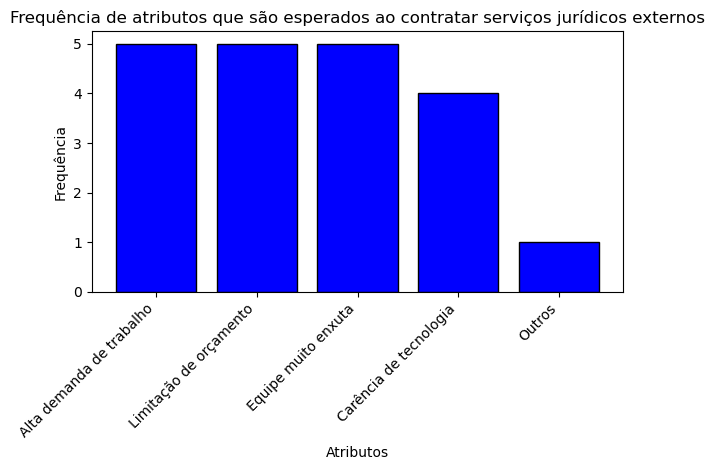

In [128]:
q6_series = data_nao_contratou['Q6'].dropna().astype(str)
all_choices_q6 = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q6.extend(choices)

counts_q6 = pd.Series(all_choices_q6).value_counts()
descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}
counts_q6.index = counts_q6.index.map(descricao_map)
plt.bar(counts_q6.index, counts_q6.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Limitação de orçamento e carência de tecnologia ganham força, bem diluido

In [129]:
# descricao_map = {
#     '1': 'Alta demanda de trabalho',
#     '2': 'Carência de tecnologia',
#     '3': 'Equipe muito enxuta',
#     '4': 'Limitação de orçamento',
#     '5': 'Outros'
# }
# descricao_map_q8 = {
#     '1': 'Qualidade técnica e perfil dos profissionais',
#     '2': 'Reputação e credibilidade',
#     '3': 'Preço e competitivo',
#     '4': 'Agilidade e rapidez',
#     '5':'Outros'
# }

Varias correlações altas, vamos ver como reflete nos plots

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1837089723.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_1 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


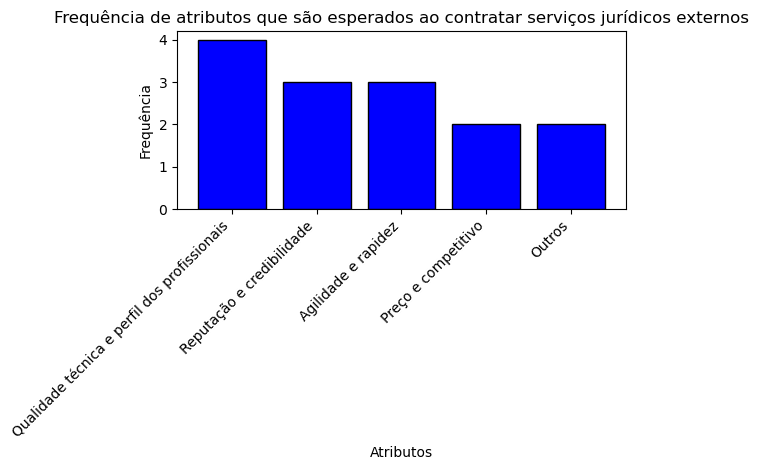

In [130]:

data_q6_1 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q8_series = data_q6_1['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2962552859.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_2 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


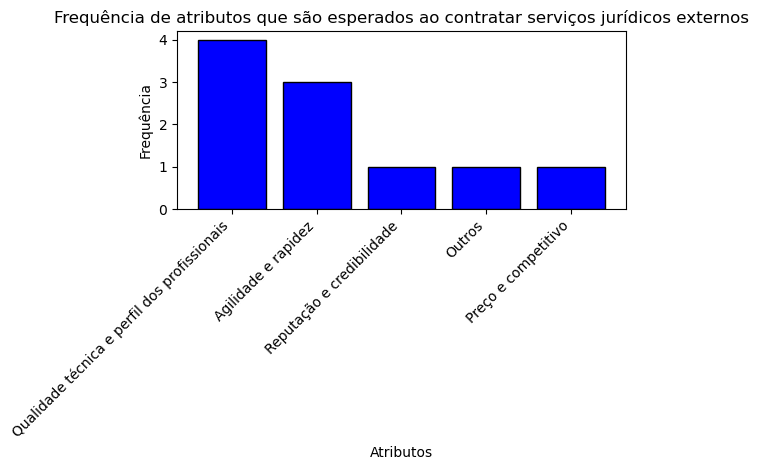

In [131]:

data_q6_2 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q8_series = data_q6_2['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3581361541.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_3 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


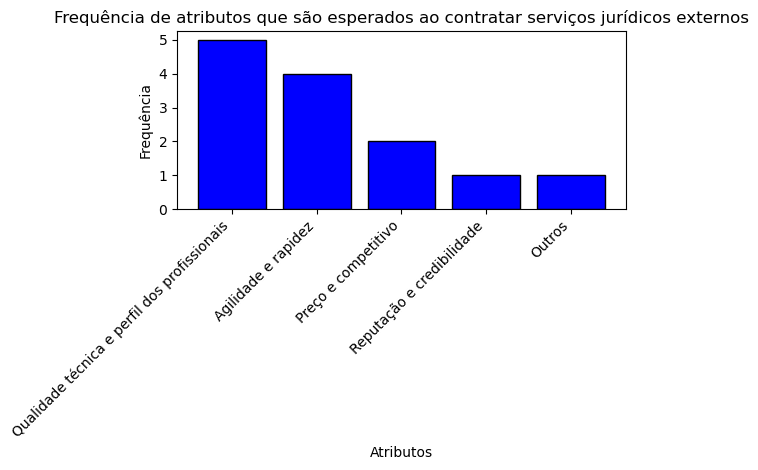

In [132]:

data_q6_3 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q8_series = data_q6_3['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1325882179.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_4 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


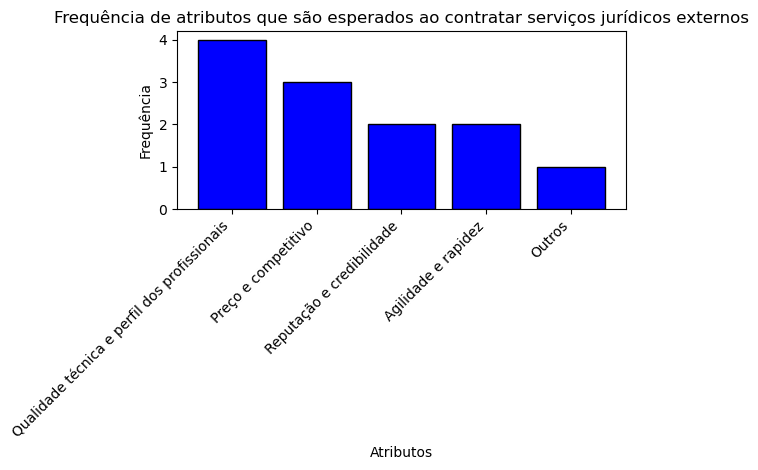

In [133]:

data_q6_4 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q8_series = data_q6_4['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/4096475367.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q6_5 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


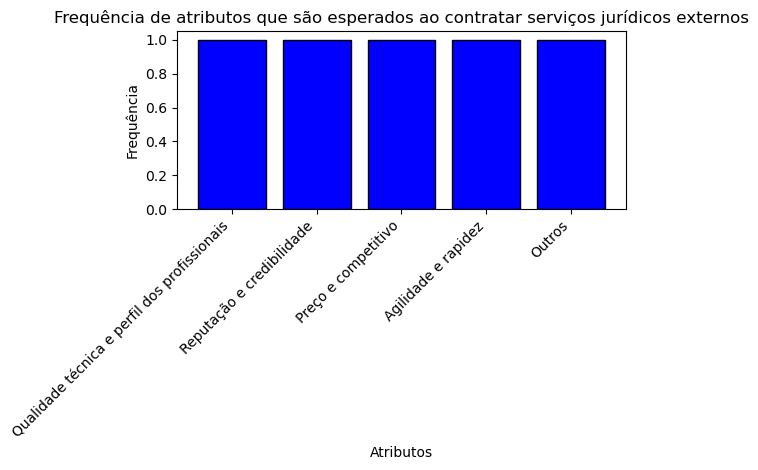

In [134]:

data_q6_5 = data_nao_contratou[data_nao_contratou['Q6'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q8_series = data_q6_5['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q8XQ9(dado os valores como foi a experiencia de quem contratou?)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2723106106.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_1 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


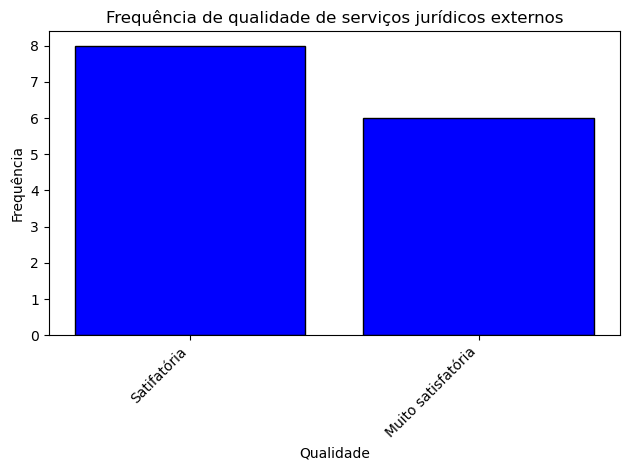

In [135]:
data_q8_1 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q9_series = data_q8_1['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2367265115.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_2 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


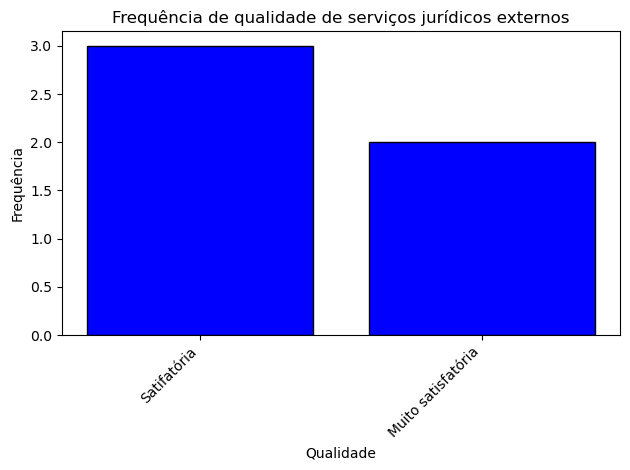

In [136]:
data_q8_2 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q9_series = data_q8_2['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3545150094.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_3 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


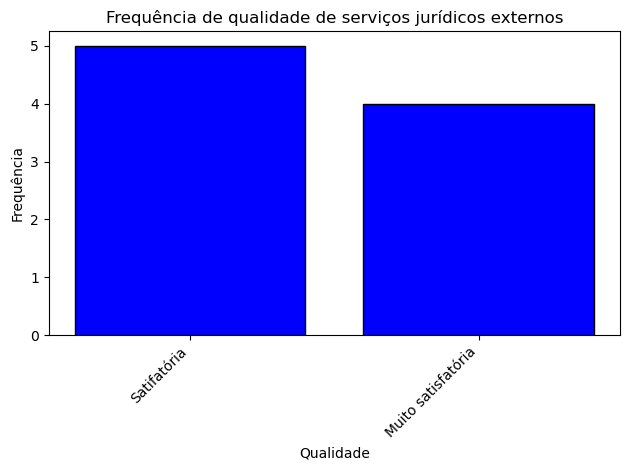

In [137]:
data_q8_3 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q9_series = data_q8_3['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3537867143.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_4 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


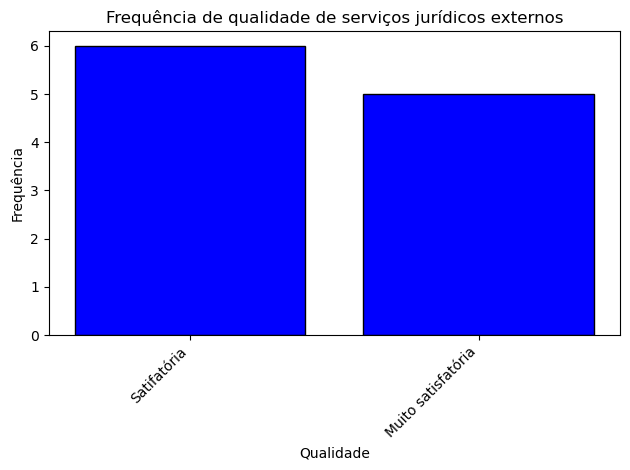

In [138]:
data_q8_4 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q9_series = data_q8_4['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [139]:
data_q8_5 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q9_series = data_q8_5['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)
counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
print(data_q8_5['Q8_5_TEXT'].value_counts())
print(data_q8_5['Q9_4_TEXT'].value_counts())

Q8_5_TEXT
saber e atitude juridico.                                                                                                                                                                                                                                                                                1
Os atributos dependem do tipo de serviço requisitado. Alta qualidade técnica são requisitos para trabalhos de alta complexidade. Por outro lado, para trabalhos de massa ou de baixa complexidade, preço e agilidade são mais importantes, desde que um nível adequado de qualidade seja apresentado.    1
Name: count, dtype: int64
Q9_4_TEXT
perdi a causa                                                                                                                                                 1
Secondment funciona bem para certas atividades, normalmente de mais baixa complexidade e que demandam conhecimento menos profundo dos negócios da empresa.    1
Name: count, dtype: int64


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3097217255.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_5 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


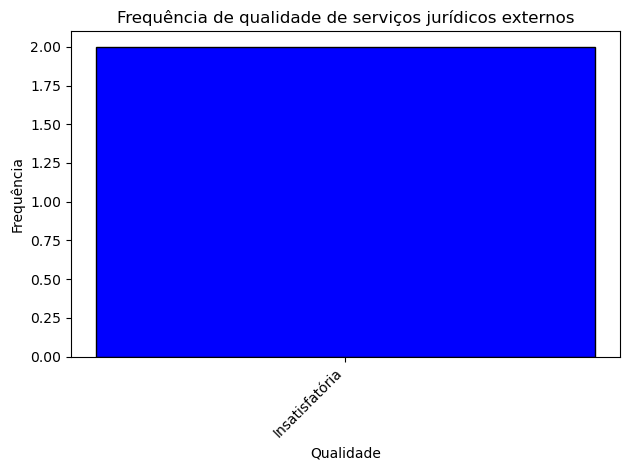

In [140]:
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q8XQ9XQ11(dado a experiencia e os valores ela tende a contratar denovo?)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3251692843.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_1 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


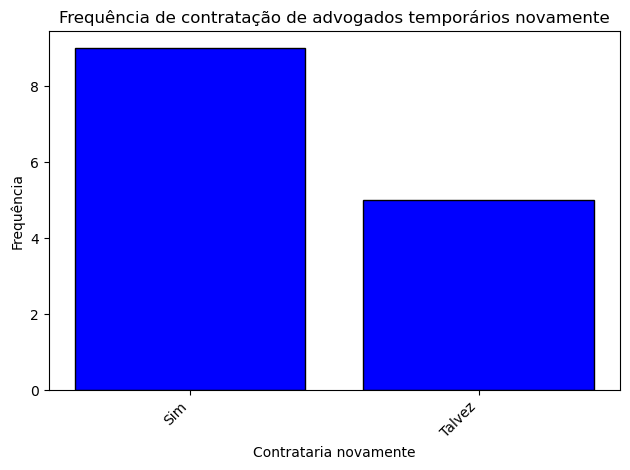

In [141]:
data_gostou = data[(data['Q9'] == 2) | (data['Q9'] == 3)]
data_q8_1 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q11_series = data_q8_1['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3310753279.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_2 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


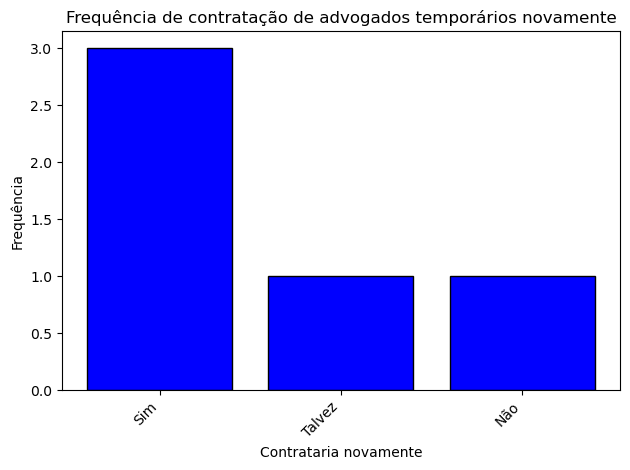

In [142]:
data_gostou = data[(data['Q9'] == 2) | (data['Q9'] == 3)]
data_q8_2 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q11_series = data_q8_2['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/1962683664.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_3 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


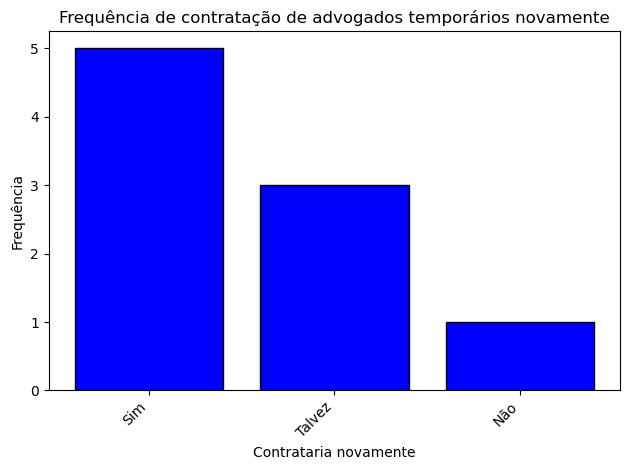

In [143]:
data_gostou = data[(data['Q9'] == 2) | (data['Q9'] == 3)]
data_q8_3 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q11_series = data_q8_3['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/518009658.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_4 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


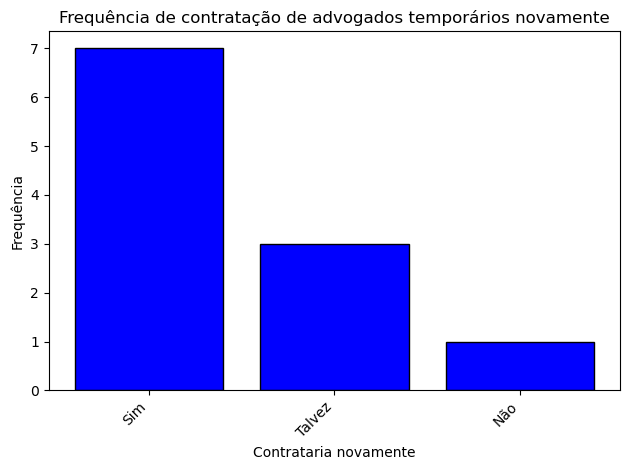

In [144]:
data_gostou = data[(data['Q9'] == 2) | (data['Q9'] == 3)]
data_q8_4 = data_gostou[data_gostou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q11_series = data_q8_4['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Os que não gostaram

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/518964114.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_5 = data_n_gostou[data_n_gostou['Q8'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


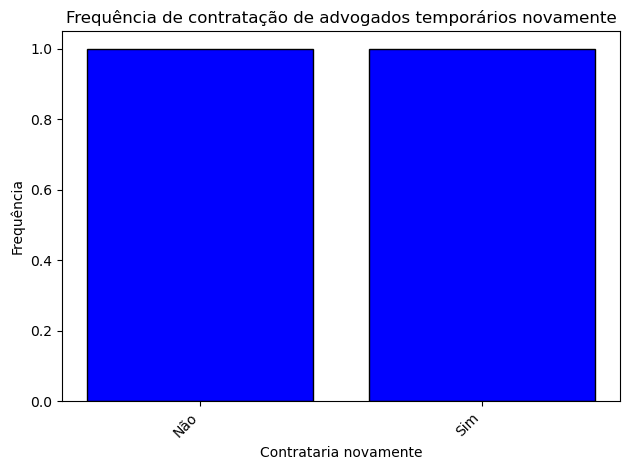

In [145]:
data_n_gostou = data[(data['Q9'] == 4)]
data_q8_5 = data_n_gostou[data_n_gostou['Q8'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q11_series = data_q8_5['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q8XQ10A(Qual a correlação entre o motivo de contrato e o valor esperado de encontrar ao contratar)

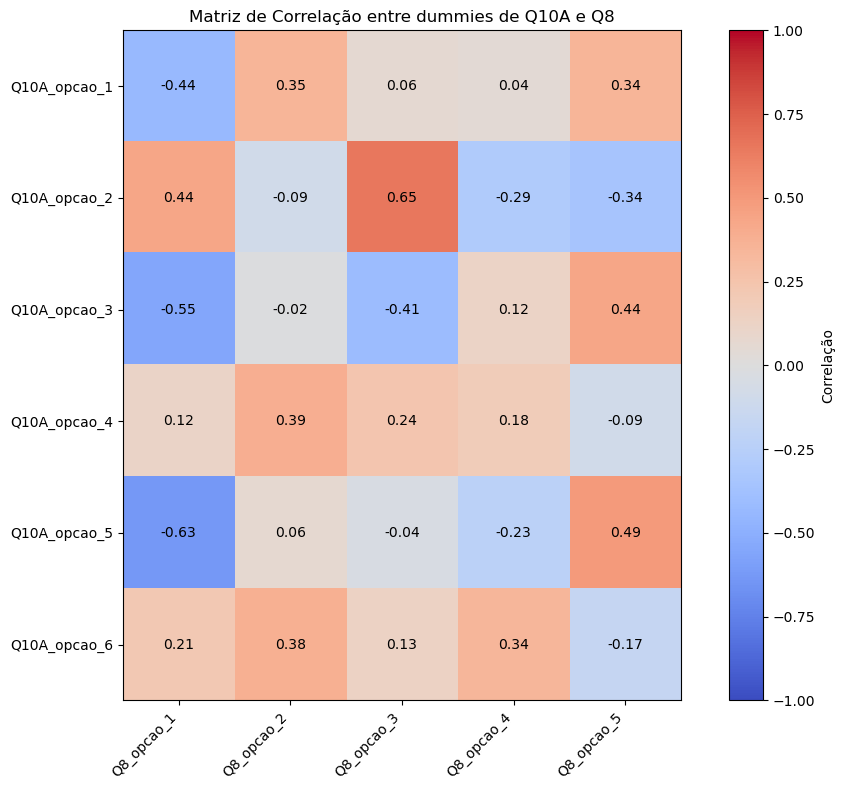

In [146]:
# --- Para Q10A ---
q10A_dummies = data_contratou['Q10A'].fillna('').str.get_dummies(sep=',')
q10A_dummies.columns = [f"Q10A_opcao_{col}" for col in q10A_dummies.columns]

# --- Para Q8 ---
q8_dummies = data_contratou['Q8'].fillna('').str.get_dummies(sep=',')
q8_dummies.columns = [f"Q8_opcao_{col}" for col in q8_dummies.columns]

# --- Combina as dummies de Q10A e Q8 em um único DataFrame ---
dummies = pd.concat([q10A_dummies, q8_dummies], axis=1)

# Calcula a matriz de correlação entre todas as dummies
corr_matrix = dummies.corr()

# Extrai a submatriz que relaciona as dummies de Q10A e Q8
q10A_columns = q10A_dummies.columns  # Colunas referentes a Q10A
q8_columns = q8_dummies.columns      # Colunas referentes a Q8
corr_q10_q8 = corr_matrix.loc[q10A_columns, q8_columns]

# --- Plot da Matriz de Correlação ---
plt.figure(figsize=(10, 8))
plt.imshow(corr_q10_q8, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlação')

# Configura os rótulos dos eixos
plt.xticks(ticks=np.arange(len(q8_columns)), labels=q8_columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(q10A_columns)), labels=q10A_columns)
plt.title('Matriz de Correlação entre dummies de Q10A e Q8')

# Anota os valores de correlação dentro de cada quadrado
for i in range(corr_q10_q8.shape[0]):
    for j in range(corr_q10_q8.shape[1]):
        plt.text(j, i, f"{corr_q10_q8.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/2259554118.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_1 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


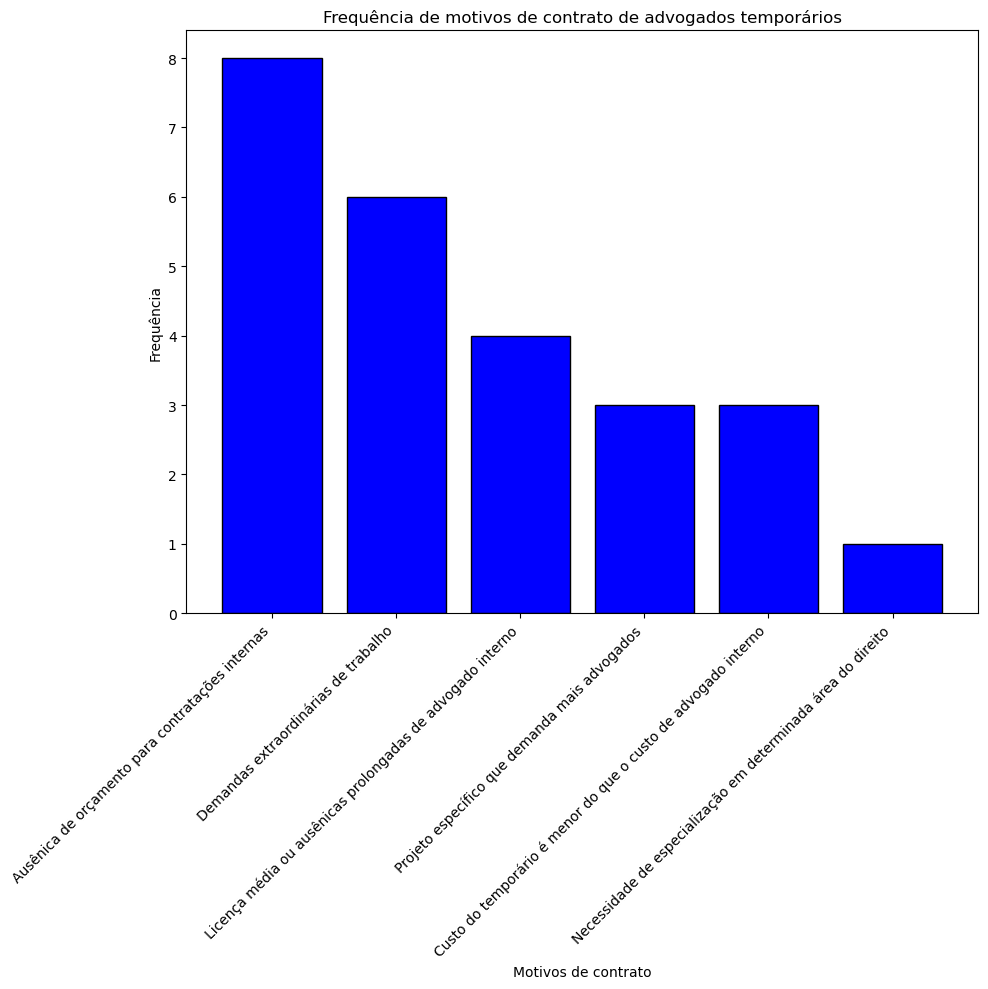

In [147]:
data_q8_1 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]

q10A_series = data_q8_1['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3241057808.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q8_4 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


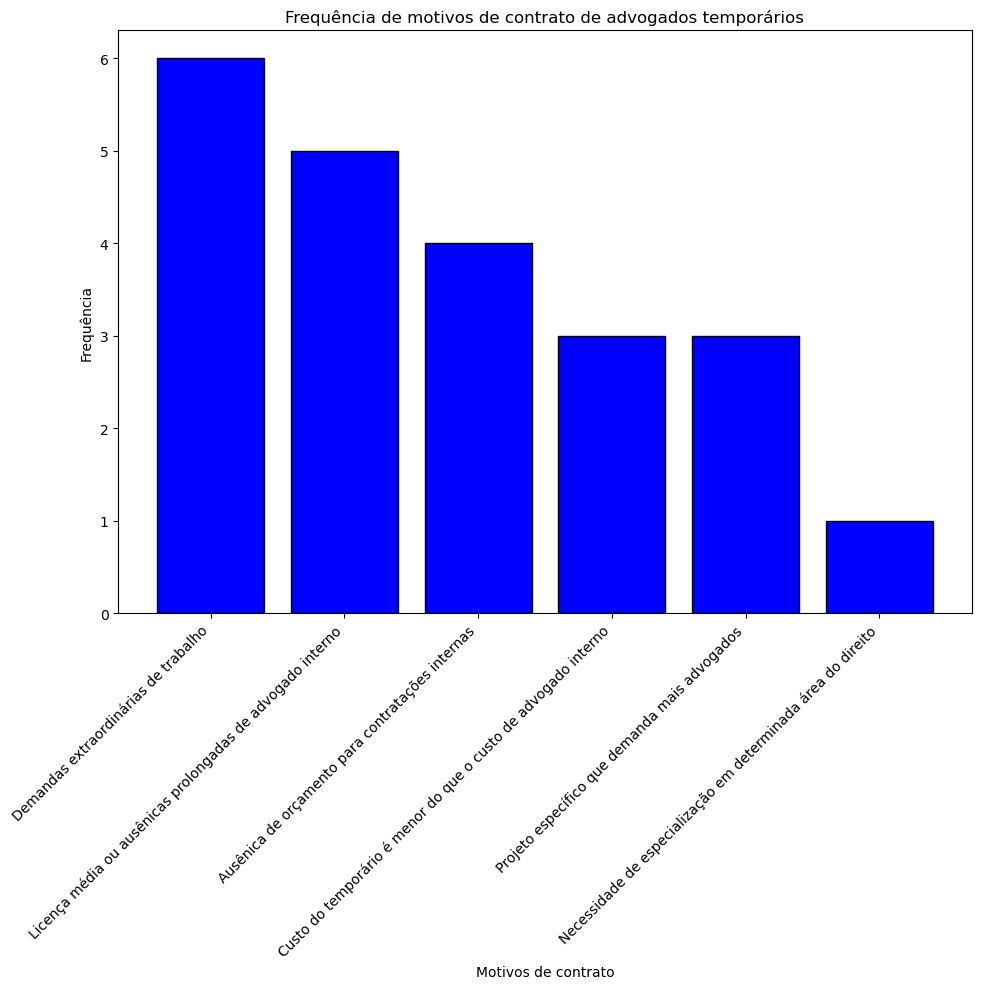

In [148]:
data_q8_4 = data_contratou[data_contratou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]

q10A_series = data_q8_4['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Corr destaque Q8_3 e e Q10_2

In [ ]:
data_q8_1 = data_contratou[
    (data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)) &
    ((data_contratou['Q11'] == '1') | (data_contratou['Q11'] == '3'))
]
data_q8_1

LocationLatitude LocationLongitude                               Q1  \
3          -25.5026          -49.2908                 anamaria batista   
5          -23.6283          -46.6409  Danilo Yoshinori Calado Takaesu   
6          -23.5335          -46.6359                    MURILO GRASSI   
7          -23.1798          -46.8816                           Renato   
8          -23.6283          -46.6409                          Anônimo   
10         -15.7783          -47.9319             Vanessa F. Lukaisus    
12              -36          -59.9964         Fabiano de Melo Ferreira   
18         -23.5335          -46.6359                           Daniel   
19          22.2842          114.1759                Pablo F G Machado   
22          40.0558          -75.0773                     Erika Farias   
23         -23.6283          -46.6409                Ana Júlia Ribeiro   
24         -23.6283          -46.6409                Edith Bertoletti    
25         -22.8896          -43.1054                           Daniel   
28         -16.3293          -48.9509                      César Filho   
29         -23.5475          -46.6361                          Marjory   

                      Q2                                              Q3  \
3                andritz                            senior legal counsel   
5              Cinepolis                                   Head of Legal   
6             Livelo S.A                        SUPERINTENDENTE JURÍDICO   
7                  Roche                                         Diretor   
8                Anônimo                                         Anônimo   
10         GM Financial.          Superintendente executiva de finanças    
12       Grafeno Digital                  Diretor Jurídico e Regulatório   
18  Atvos Agroindustrial                 Coordenador jurídico tributário   
19            Suzano S.A                       Vice-Presidente Executivo   
22        Puratos Brasil                                Gerente Jurídica   
23               Petlove  Gerente de Contratos, Contencioso e Consultivo   
24              Goodman                              diretora executiva    
25                 Pitzi                                      Legal Ops.   
28                 Ontex                            Coord Jurídico e DPO   
29               Habib´s                                  Gerente Sênior   

                                  Q4    Q5       Q6           Q6_5_TEXT Q7  \
3     anamariabatistadavid@gmail.com  11.0      3,4                 NaN  3   
5              daniloy10@hotmail.com   3.0      3,4                 NaN  3   
6        murilo.grassi@livelo.com.br   9.0  1,3,4,5  Equipe muito jovem  1   
7           renato.martins@roche.com  19.0        2                 NaN  3   
8                            Anônimo  16.0        1                 NaN  2   
10  vanessa.lukaisus@gmfinancial.com   4.0      1,4                 NaN  2   
12  fabiano.ferreira@grafeno.digital   4.0        2                 NaN  3   
18           danielb.silva@atvos.com  30.0        3                 NaN  2   
19       pablomachado@suzanoasia.com  62.0        1                 NaN  3   
22               efarias@puratos.com   4.0      1,3                 NaN  3   
23        ana.ribeiro@petlove.com.br   4.0        4                 NaN  3   
24      Edith.bertoletti@goodman.com   3.0      1,3                 NaN  2   
25       daniel.sampaio@pitzi.com.br   1.0    1,2,3                 NaN  2   
28       cesar.filho@ontexglobal.com   4.0    1,2,3                 NaN  3   
29   marjory.guimaraes@habibs.com.br  13.0      1,4                 NaN  3   

    ... Q11 Q11_2_TEXT                                         Q11_3_TEXT  \
3   ...   1        NaN                                                NaN   
5   ...   3        NaN                                 Depende da demanda   
6   ...   1        NaN                                                NaN   
7   ...   1        NaN                      

# Q8xQ10AXQ11

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/3303195975.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)) &


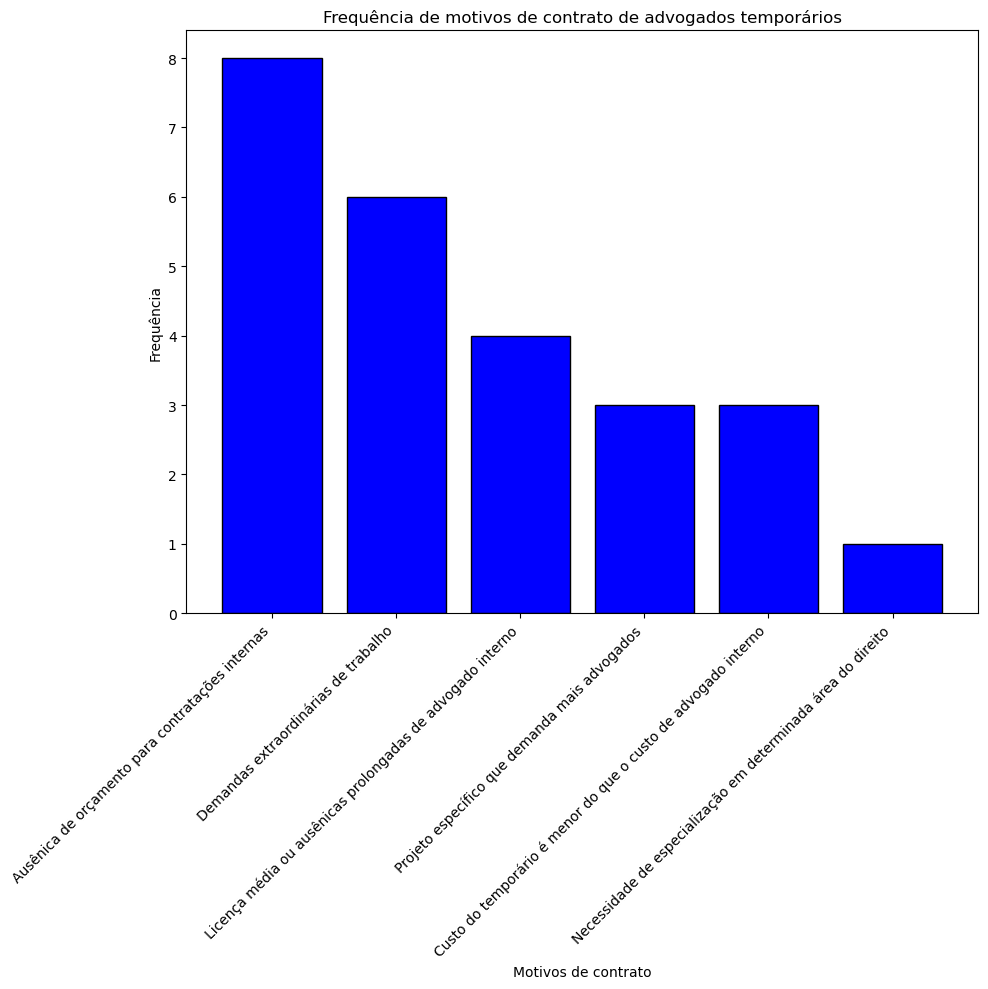

In [158]:
data_q8_1 = data_contratou[
    (data_contratou['Q8'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)) &
    ((data_contratou['Q11'] == 1) | (data_contratou['Q11'] == 3))
]


q10A_series = data_q8_1['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_20612/984564546.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (data_contratou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)) &


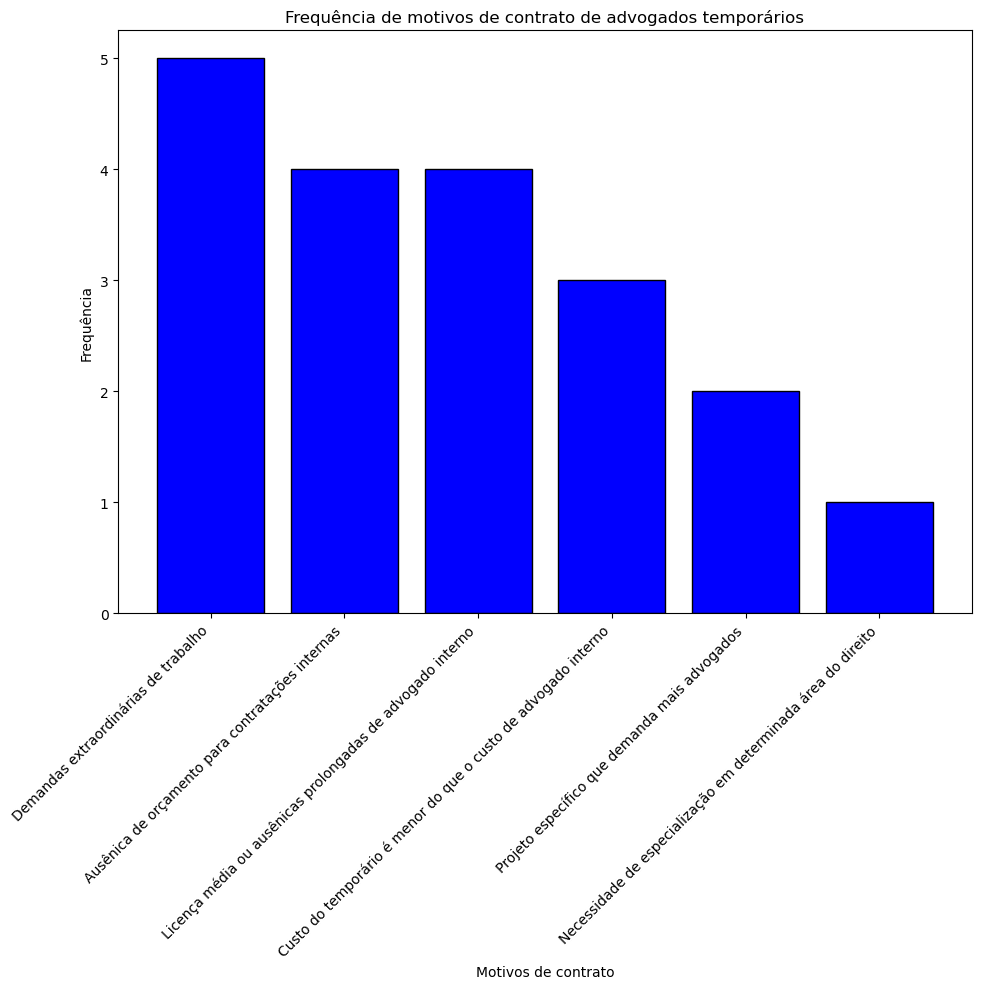

In [159]:
data_q8_4 = data_contratou[
    (data_contratou['Q8'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)) &
    ((data_contratou['Q11'] == 1) | (data_contratou['Q11'] == 3))
]

q10A_series = data_q8_4['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q10AXQ11(dado o motivo de contrato, a experiencia foi satisfatória?)

In [1]:
data_q10A_1 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q9_series = data_q10A_1['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'data_contratou' is not defined

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3756292578.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_2 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


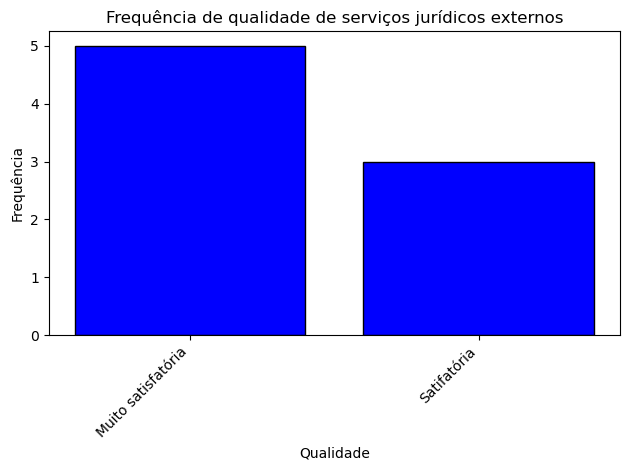

In [ ]:
data_q10A_2 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q9_series = data_q10A_2['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/2991349231.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_3 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


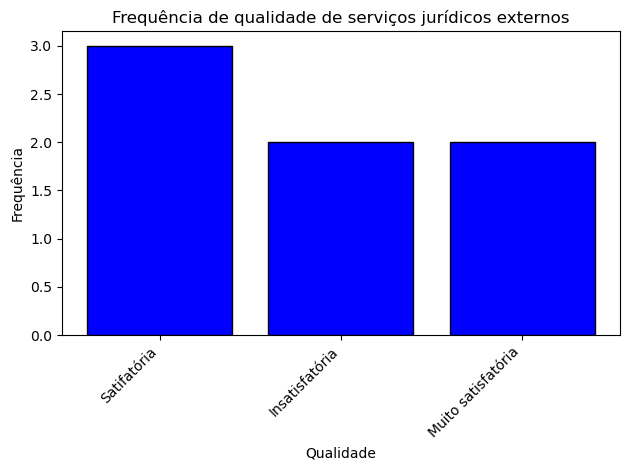

In [ ]:
data_q10A_3 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q9_series = data_q10A_3['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/1258210811.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_4 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


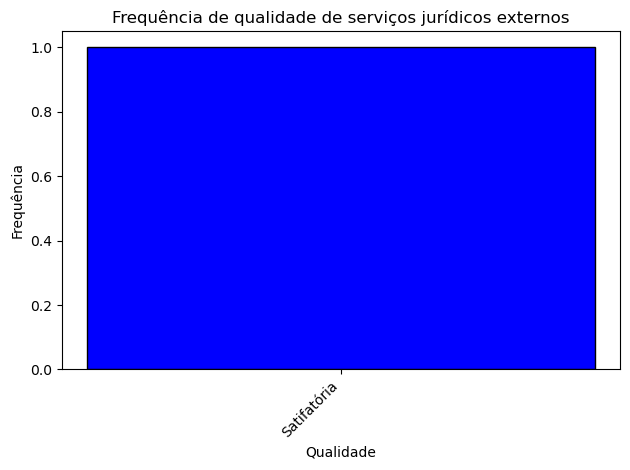

In [ ]:
data_q10A_4 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q9_series = data_q10A_4['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3827773224.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_5 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


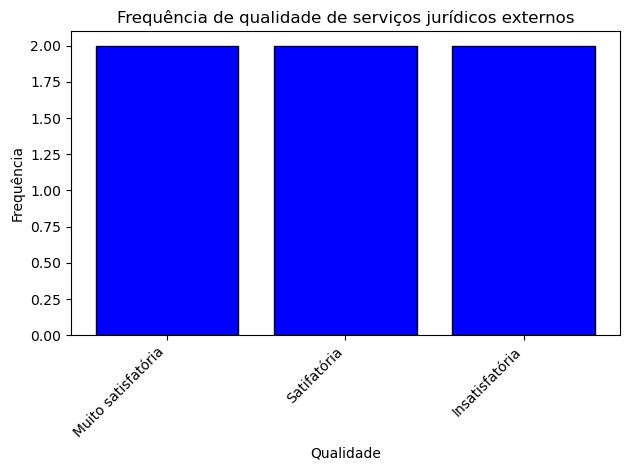

In [ ]:
data_q10A_5 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q9_series = data_q10A_5['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/794915786.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_6 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)6(,|$)', regex=True)]


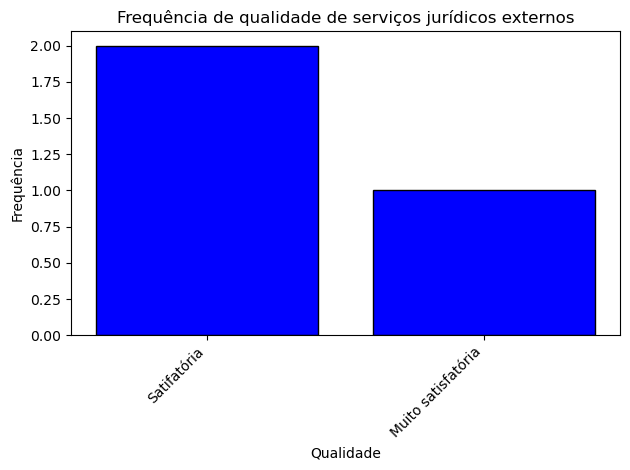

In [ ]:
data_q10A_6 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)6(,|$)', regex=True)]
q9_series = data_q10A_6['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/1586434218.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_7 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)7(,|$)', regex=True)]


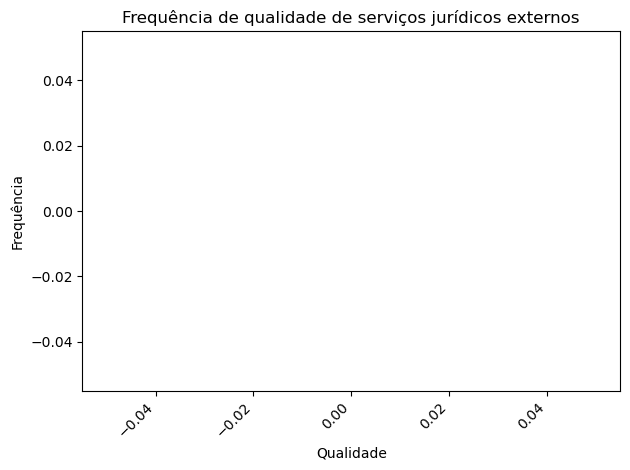

In [ ]:
data_q10A_7 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)7(,|$)', regex=True)]
q9_series = data_q10A_7['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# q10xq11(dado o motivo do contrato, contrataria novamente?)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/2700410939.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_1 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]


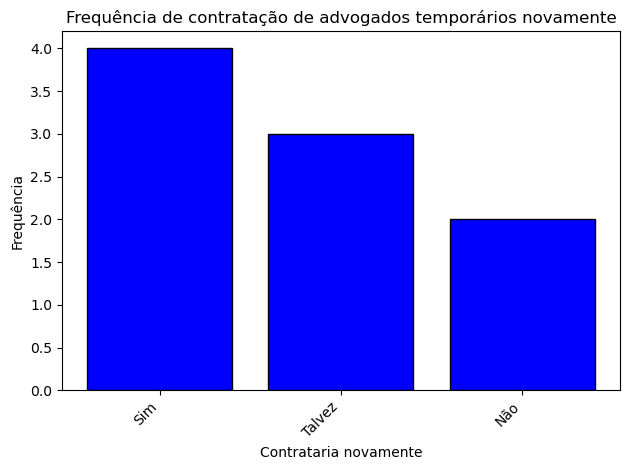

In [ ]:

data_q10A_1 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)1(,|$)', regex=True)]
q11_series = data_q10A_1['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/669060605.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_2= data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]


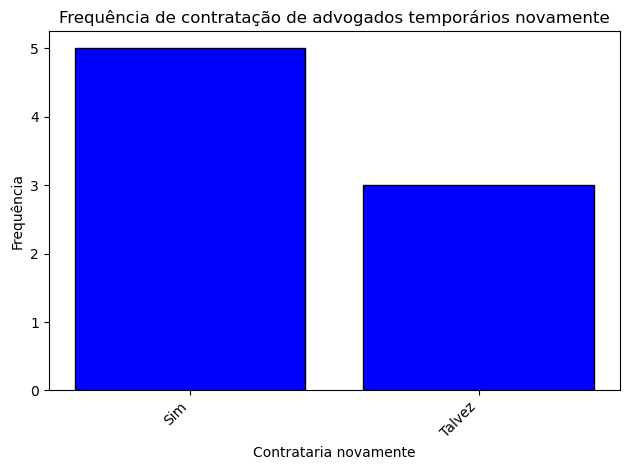

In [ ]:

data_q10A_2= data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)2(,|$)', regex=True)]
q11_series = data_q10A_2['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3180022261.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_3 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]


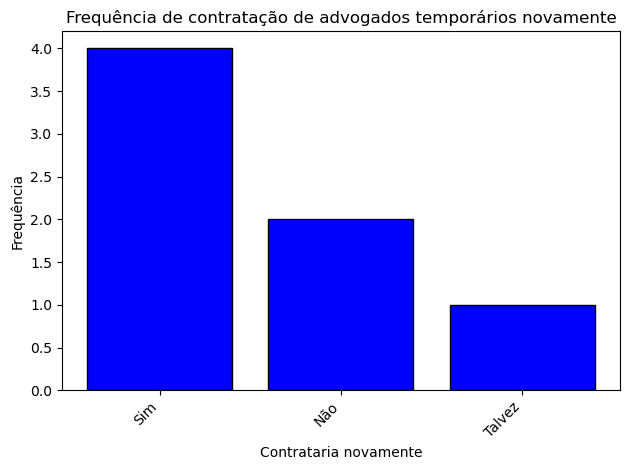

In [ ]:

data_q10A_3 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)3(,|$)', regex=True)]
q11_series = data_q10A_3['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/2193154178.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_4 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]


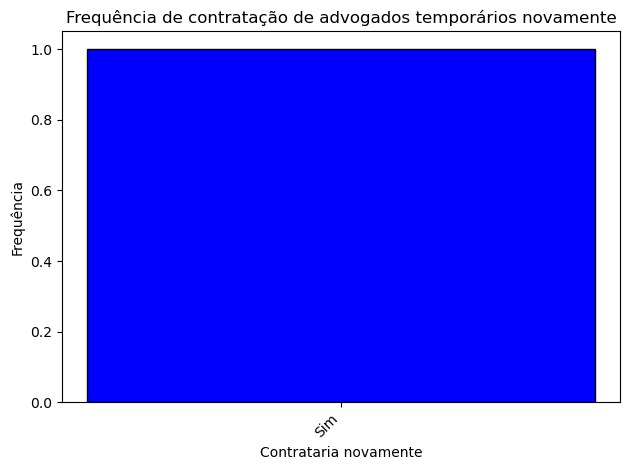

In [ ]:

data_q10A_4 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
q11_series = data_q10A_4['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3953706853.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_5 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]


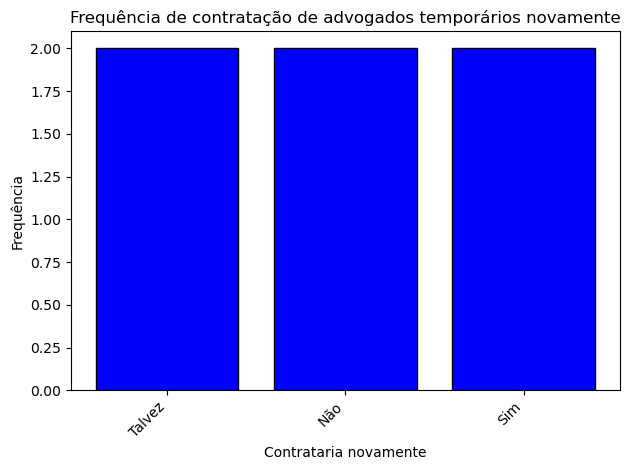

In [ ]:

data_q10A_5 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)5(,|$)', regex=True)]
q11_series = data_q10A_5['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3477685131.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_6 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)6(,|$)', regex=True)]


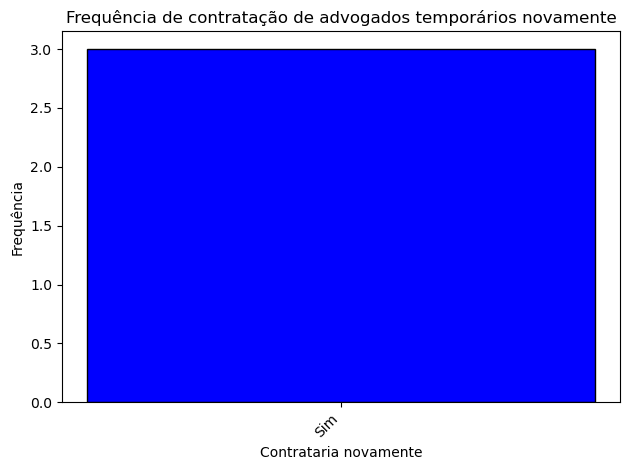

In [ ]:

data_q10A_6 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)6(,|$)', regex=True)]
q11_series = data_q10A_6['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/1525576715.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_q10A_7 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)7(,|$)', regex=True)]


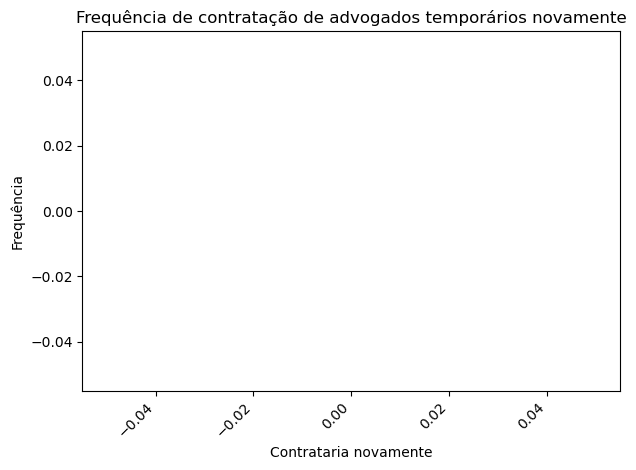

In [ ]:

data_q10A_7 = data_contratou[data_contratou['Q10A'].fillna('').str.contains(r'(^|,)7(,|$)', regex=True)]
q11_series = data_q10A_7['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Q8 X Q11 X Q12(Quais são os valores esperados daqueles que pretende contratar o serviço dado que conhecem a Viseu)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3320131104.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_viseu = data[data['Q12'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3320131104.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_contratar = data_viseu[(data_viseu['Q11'].fillna('')==1) | (data_viseu['Q11']==3)]


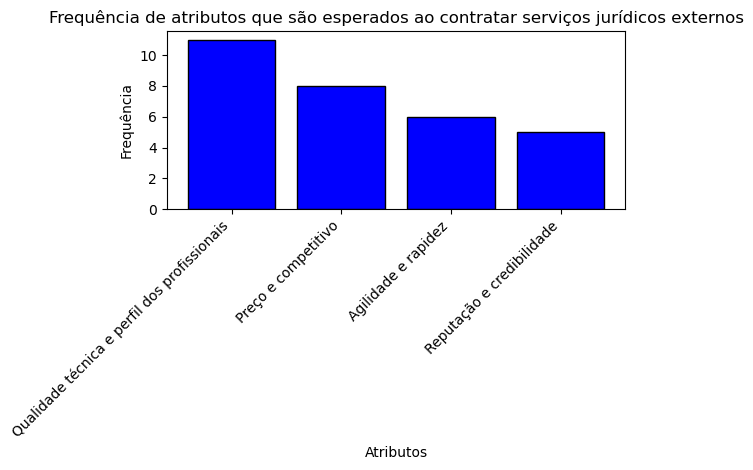

In [ ]:
data_viseu = data[data['Q12'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
data_contratar = data_viseu[(data_viseu['Q11'].fillna('')==1) | (data_viseu['Q11']==3)]
q8_series = data_contratar['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q9 X Q10A X Q11 X Q12(Dado que já contrataram, pretendem contratar novamente e conhecem a Viseu, qual foi o motivo de contrato?)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/2232023119.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_viseu= data_contratou[data_contratou['Q12'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/2232023119.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_contratar = data_viseu[(data_viseu['Q11'].fillna('')==1) | (data_viseu['Q11']==3)]


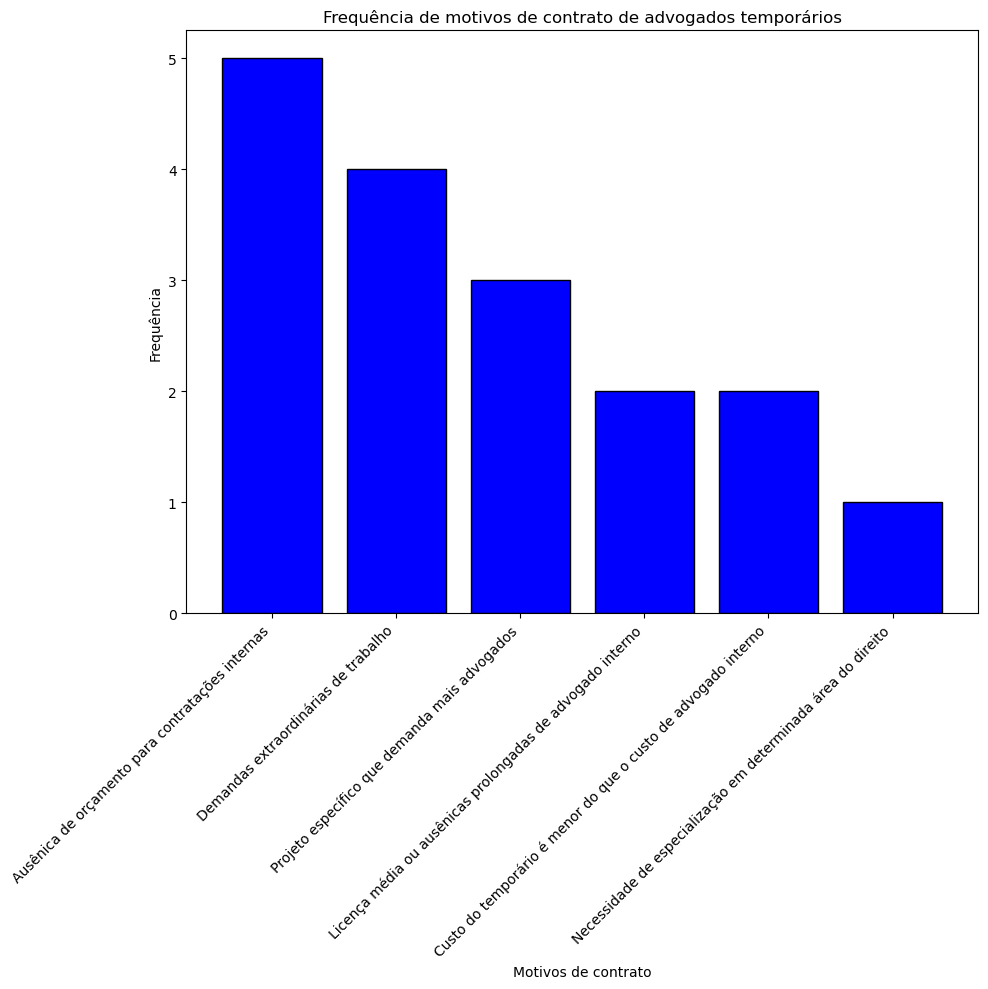

In [ ]:
data_viseu= data_contratou[data_contratou['Q12'].fillna('').str.contains(r'(^|,)4(,|$)', regex=True)]
data_contratar = data_viseu[(data_viseu['Q11'].fillna('')==1) | (data_viseu['Q11']==3)]

q10A_series = data_contratar['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Tag

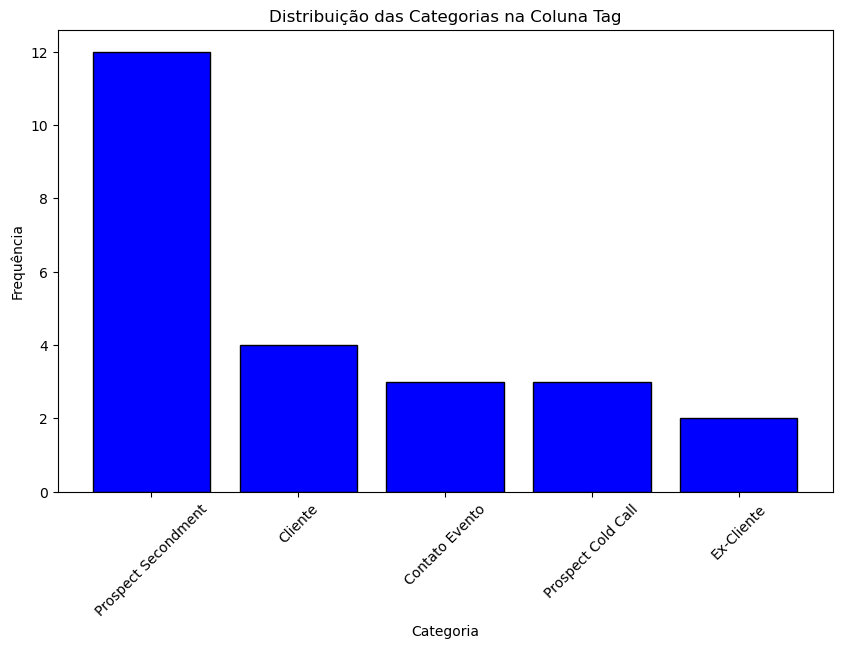

In [ ]:

# Contando a frequência de cada categoria na coluna 'Tag'
contagem_tags = data['Tag'].value_counts()

# Criando o bar plot
plt.figure(figsize=(10, 6))
plt.bar(contagem_tags.index, contagem_tags.values, color='blue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.title('Distribuição das Categorias na Coluna Tag')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização

# Exibindo o gráfico
plt.show()

# SetorXTAG(Qual o principal setor que estão localizados os prospects e os clientes da Vizeu?)

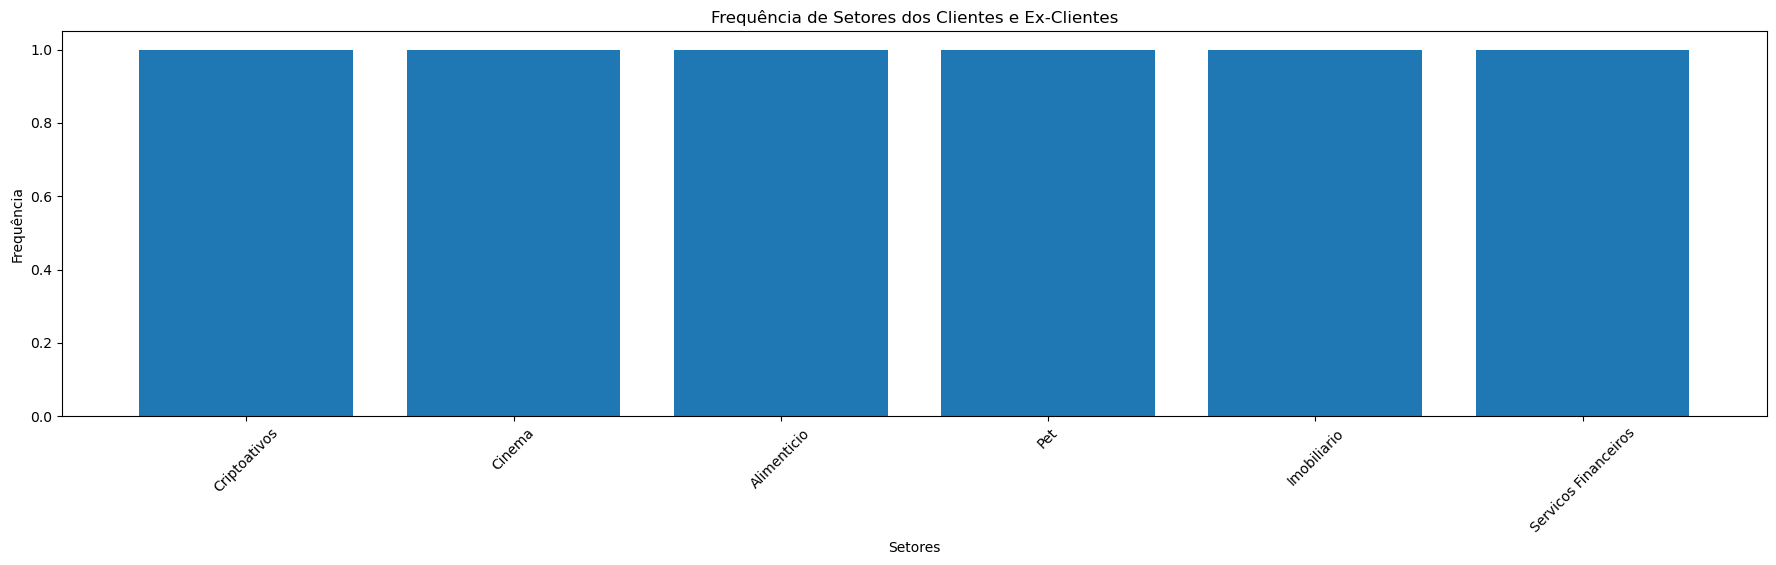

In [ ]:
data_clientes_exclientes = data[(data['Tag']=='Cliente') | (data['Tag']=='Ex-Cliente')]
counts = data_clientes_exclientes['Setores'].value_counts(dropna=True)

plt.figure(figsize=(22,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Setores')
plt.ylabel('Frequência')
plt.title('Frequência de Setores dos Clientes e Ex-Clientes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_clientes_exclientes

LocationLatitude LocationLongitude                               Q1  \
4          -23.5335          -46.6359             Artur Ferraz Martins   
5          -23.6283          -46.6409  Danilo Yoshinori Calado Takaesu   
11         -23.6283          -46.6409                          Luciana   
23         -23.6283          -46.6409                Ana Júlia Ribeiro   
24         -23.6283          -46.6409                Edith Bertoletti    
30         -23.5475          -46.6361  JESSICA PAULA FERNANDES BARBOSA   

               Q2                                              Q3  \
4          Foxbit                Gerente Jurídico e de Compliance   
5       Cinepolis                                   Head of Legal   
11  Grupo Bisutti                                Gerente Jurídico   
23        Petlove  Gerente de Contratos, Contencioso e Consultivo   
24       Goodman                              diretora executiva    
30      Credz S/A                           COORDENADORA JURÍDICA   

                              Q4   Q5   Q6 Q6_5_TEXT Q7  ... Q10B_7_TEXT Q11  \
4    artur.martins@foxbit.com.br  3.0    4       NaN  2  ...         NaN   2   
5          daniloy10@hotmail.com  3.0  3,4       NaN  3  ...         NaN   3   
11     lucrisbertolini@gmail.com  1.0    3       NaN  2  ...         NaN   2   
23    ana.ribeiro@petlove.com.br  4.0    4       NaN  3  ...         NaN   1   
24  Edith.bertoletti@goodman.com  3.0  1,3       NaN  2  ...         NaN   1   
30  jessica.barbosa@credz.com.br  6.0    3       NaN  2  ...         NaN   2   

                                           Q11_2_TEXT          Q11_3_TEXT  \
4                                 Não tenho interesse                 NaN   
5                                                 NaN  Depende da demanda   
11  Prefiro uma pessoa que entenda melhor do busin...                 NaN   
23                                                NaN                 NaN   
24                                                NaN                 NaN   
30    é muito sensivel a inclusão no ambiente interno                 NaN   

    Q12 Q12_6_TEXT   Q13         Tag               Setores area de atuacao  
4     5        NaN   NaN     Cliente          Criptoativos        juridica  
5     4        NaN   NaN     Cliente                Cinema        juridica  
11    4        NaN  Não.     Cliente           Alimenticio        juridica  
23  1,4        NaN   NaN  Ex-Cliente                   Pet          Outros  
24    4        NaN  Não   Ex-Cliente           Imobiliario          Outros  
30    3        NaN   NaN     Cliente  Servicos Financeiros        juridica  

[6 rows x 28 columns]

Bem dividido, e dos prospects?

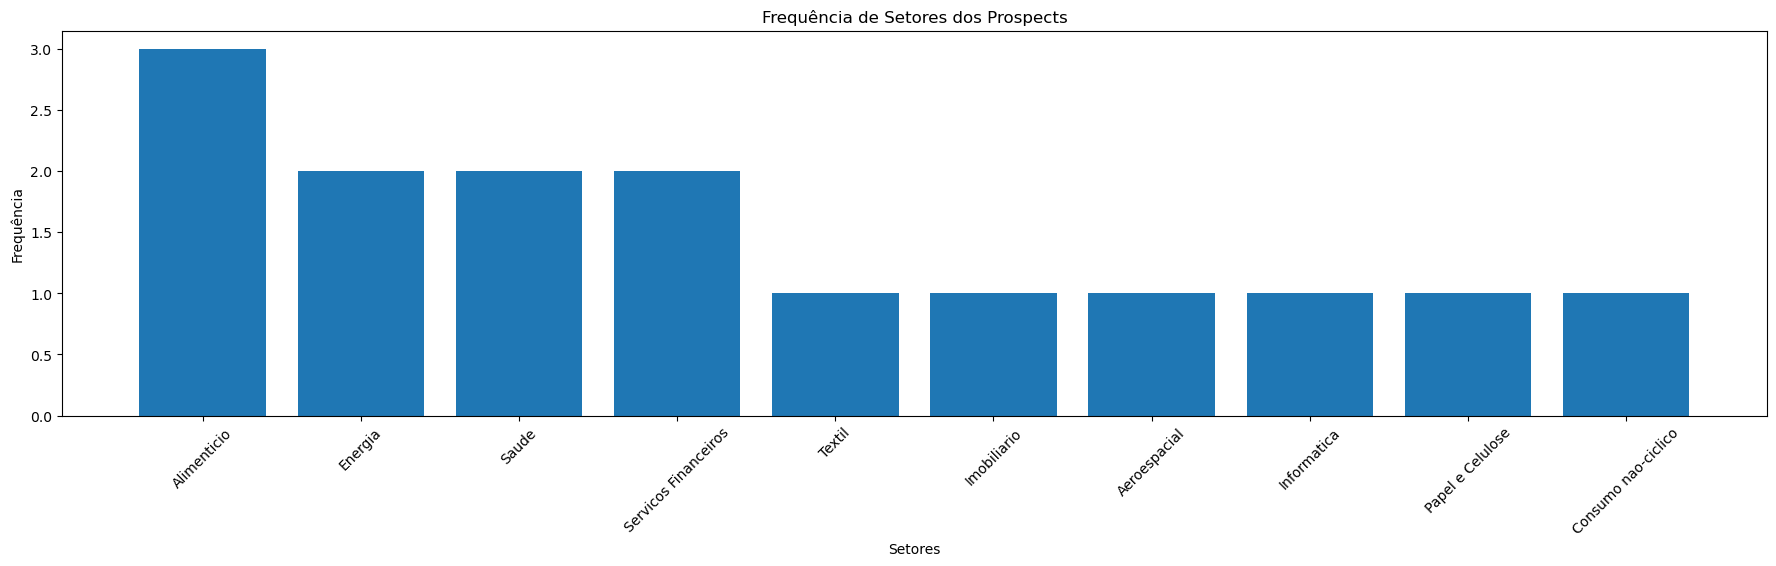

In [ ]:
data_prospects = data[(data['Tag']=='Prospect Secondment') | (data['Tag']=='Prospect Cold Call')]
counts = data_prospects['Setores'].value_counts(dropna=True)

plt.figure(figsize=(22,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Setores')
plt.ylabel('Frequência')
plt.title('Frequência de Setores dos Prospects')
plt.xticks(rotation=45)
plt.show()

Bem dividido, mas mais frequentens do setor alimenticio

# Q5XTAG(Qual o tamamnho da equipe dos prospect e dos clientes da Vizeu?)

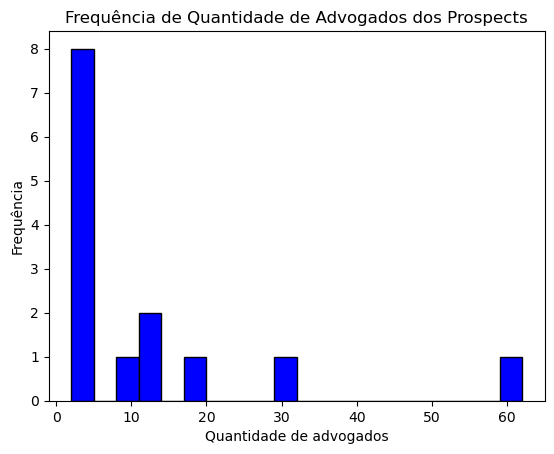

Tabela de Frequência:
Q5
2.0     1
3.0     2
4.0     5
9.0     1
11.0    1
13.0    1
19.0    1
30.0    1
62.0    1
Name: count, dtype: int64


In [ ]:

data_tamanho = data_prospects['Q5']
plt.hist(data_tamanho, bins=20, color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados dos Prospects')
plt.show()
# Criando uma tabela de frequência
tabela_frequencia = data_tamanho.value_counts().sort_index()

# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)


In [ ]:
data_tamanho.describe()

count    14.000000
mean     12.285714
std      16.325669
min       2.000000
25%       4.000000
50%       4.000000
75%      12.500000
max      62.000000
Name: Q5, dtype: float64

Dois outliers bem grandes, vamos filtrar

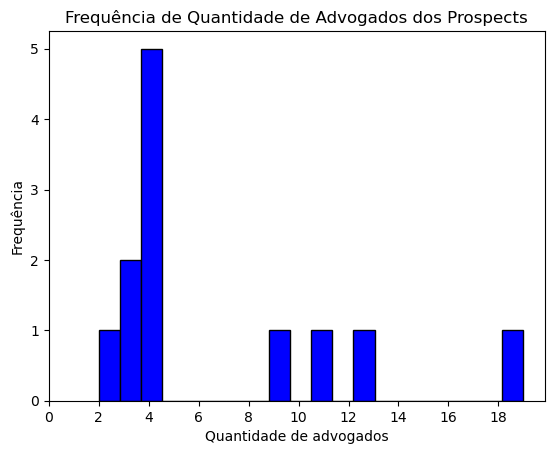

Tabela de Frequência:
Q5
2.0     1
3.0     2
4.0     5
9.0     1
11.0    1
13.0    1
19.0    1
Name: count, dtype: int64


In [ ]:
data_filtrado = data_tamanho[data_tamanho<30]
plt.hist(data_filtrado, bins=20, color='blue', edgecolor='black')
plt.xticks(range(0, 19,2))
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados dos Prospects')
plt.show()
# Criando uma tabela de frequência
tabela_frequencia = data_filtrado.value_counts().sort_index()
# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

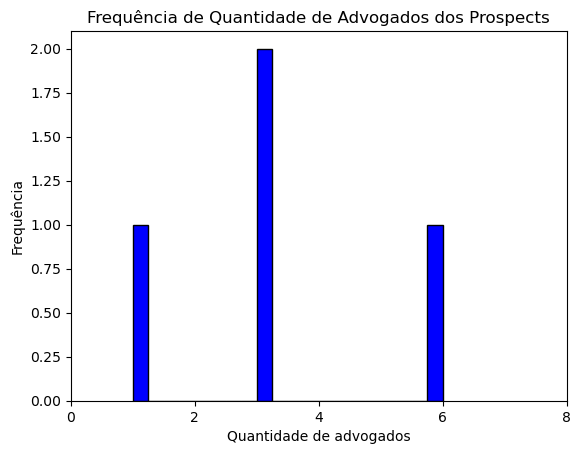

Tabela de Frequência:
Q5
1.0    1
3.0    2
6.0    1
Name: count, dtype: int64


In [ ]:
data_clientes = data[data['Tag']=='Cliente']
data_plot = data_clientes['Q5']
plt.hist(data_plot, bins=20, color='blue', edgecolor='black')
plt.xticks(range(0, 10,2))
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados dos Prospects')
plt.show()
# Criando uma tabela de frequência
tabela_frequencia = data_plot.value_counts().sort_index()
# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

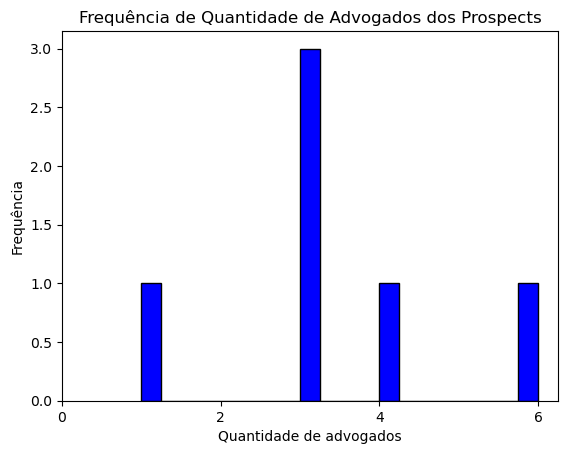

Tabela de Frequência:
Q5
1.0    1
3.0    3
4.0    1
6.0    1
Name: count, dtype: int64


In [ ]:
data_plot = data_clientes_exclientes['Q5']
plt.hist(data_plot, bins=20, color='blue', edgecolor='black')
plt.xticks(range(0, 8,2))
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados dos Prospects')
plt.show()
# Criando uma tabela de frequência
tabela_frequencia = data_plot.value_counts().sort_index()
# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

In [ ]:
data_plot.describe()

count    6.000000
mean     3.333333
std      1.632993
min      1.000000
25%      3.000000
50%      3.000000
75%      3.750000
max      6.000000
Name: Q5, dtype: float64

Vizeu normalmente trabalha com equipes menores, estranho pq maioira das empresas pequenas nunca trabalharam com secondment ou nao tem interesse no futuro

# Q8xQ10AXTAG(Quais são os motivos de contrato e qual valor cada desses motivos esperam dawueles que são prospect da Viseu? E dos que são clientes da Viseu?)

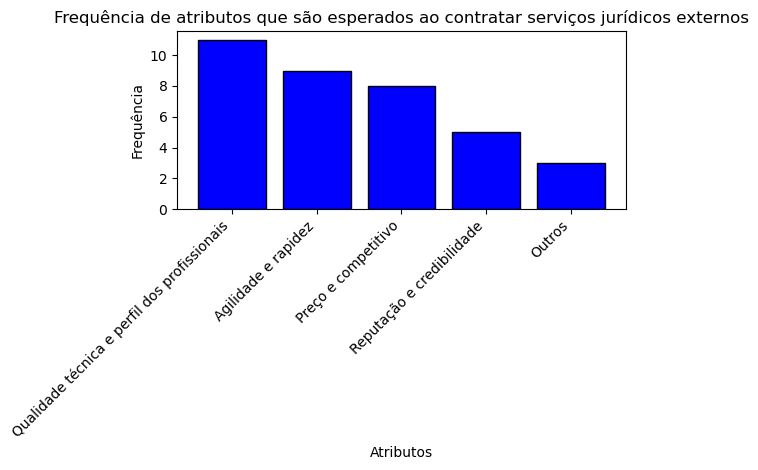

In [ ]:
q8_series = data_prospects['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

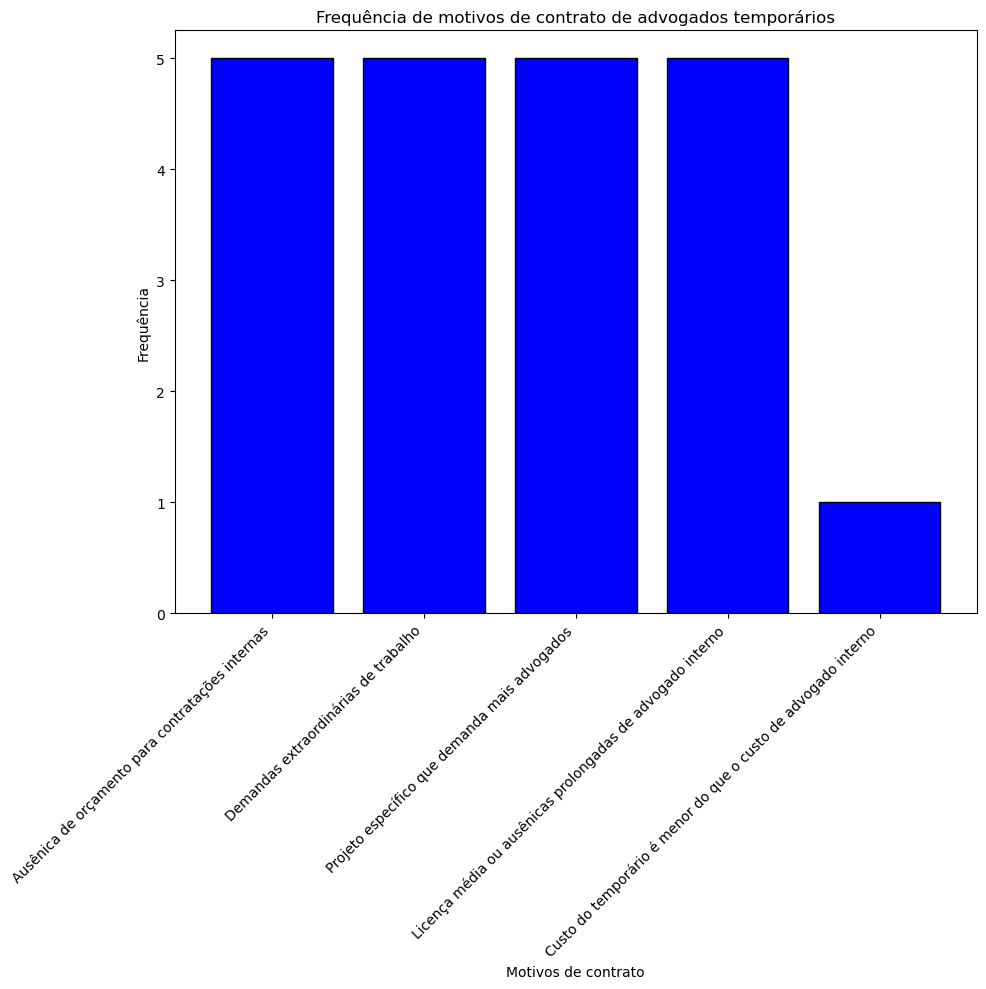

Tabela de Frequência:
Ausênica de orçamento para contratações internas                  5
Custo do temporário é menor do que o custo de advogado interno    1
Demandas extraordinárias de trabalho                              5
Licença média ou ausênicas prolongadas de advogado interno        5
Projeto específico que demanda mais advogados                     5
Name: count, dtype: int64


In [ ]:
q10A_series = data_prospects['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criando uma tabela de frequência
tabela_frequencia = counts_q10A.sort_index()

# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

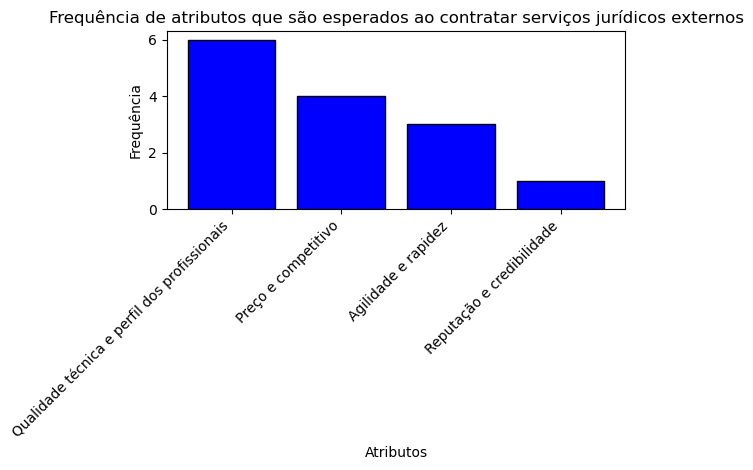

In [ ]:
q8_series = data_clientes_exclientes['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

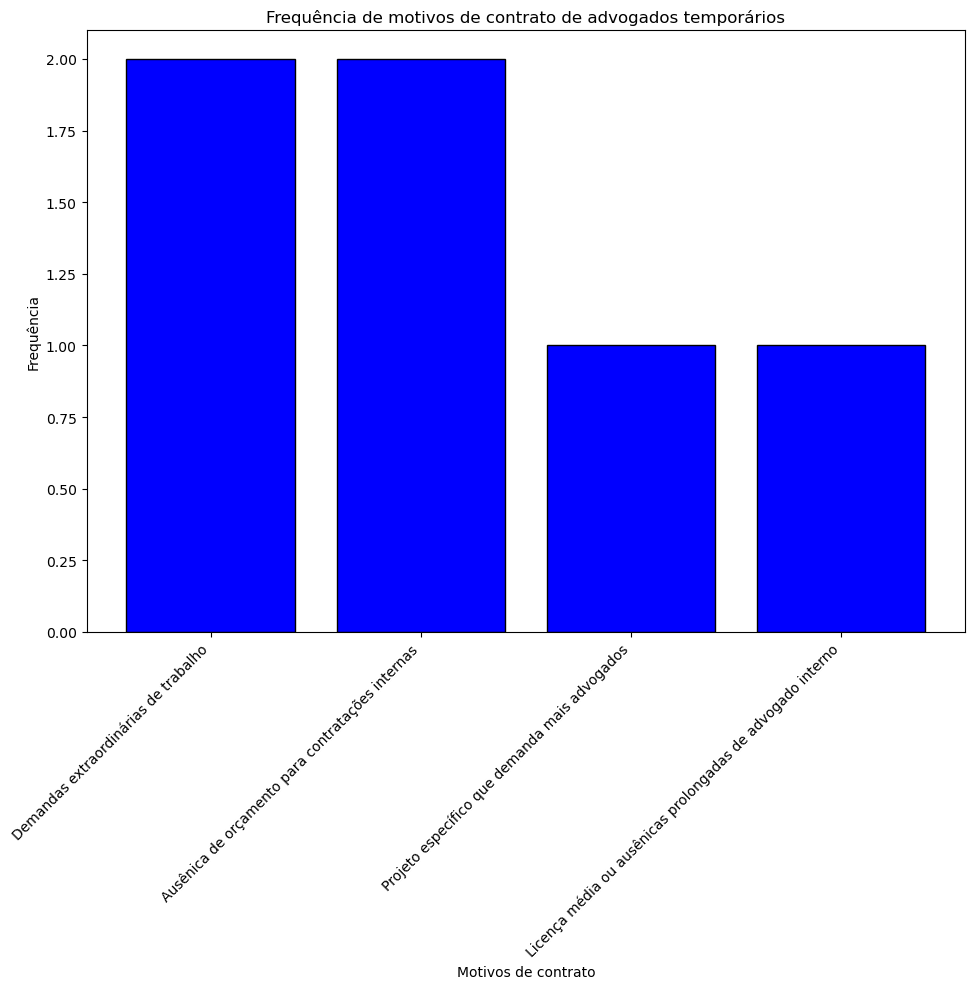

Tabela de Frequência:
Ausênica de orçamento para contratações internas              2
Demandas extraordinárias de trabalho                          2
Licença média ou ausênicas prolongadas de advogado interno    1
Projeto específico que demanda mais advogados                 1
Name: count, dtype: int64


In [ ]:
q10A_series = data_clientes_exclientes['Q10A'].dropna().astype(str)
all_choices_q10A = []
for resp in q10A_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q10A.extend(choices)

counts_q10A = pd.Series(all_choices_q10A).value_counts()
descricao_map_q10A = {
    '1': 'Demandas extraordinárias de trabalho',
    '2': 'Ausênica de orçamento para contratações internas',
    '3': 'Licença média ou ausênicas prolongadas de advogado interno',
    '4': 'Necessidade de especialização em determinada área do direito',
    '5': 'Projeto específico que demanda mais advogados',
    '6': 'Custo do temporário é menor do que o custo de advogado interno',
    '7': 'Outros'
}
counts_q10A.index = counts_q10A.index.map(descricao_map_q10A)
plt.figure(figsize=(10,10))
plt.bar(counts_q10A.index, counts_q10A.values, color='blue', edgecolor='black')
plt.xlabel('Motivos de contrato')
plt.ylabel('Frequência')
plt.title('Frequência de motivos de contrato de advogados temporários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criando uma tabela de frequência
tabela_frequencia = counts_q10A.sort_index()

# Exibindo a tabela
print("Tabela de Frequência:")
print(tabela_frequencia)

# Q6XTAG(Qual o maior desafio dos clientes? e dos prospects?)

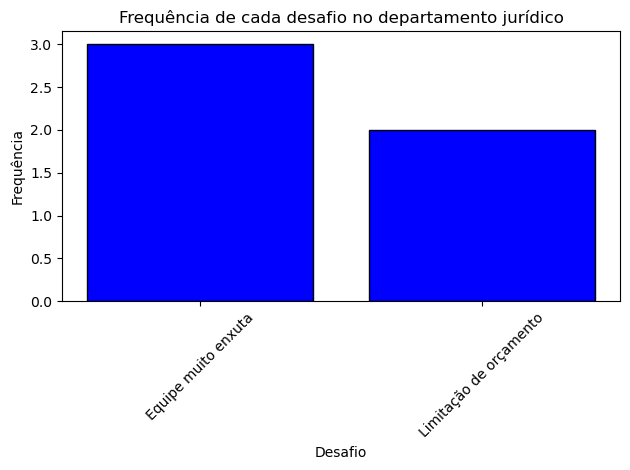

In [ ]:
q6_series = data_clientes['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

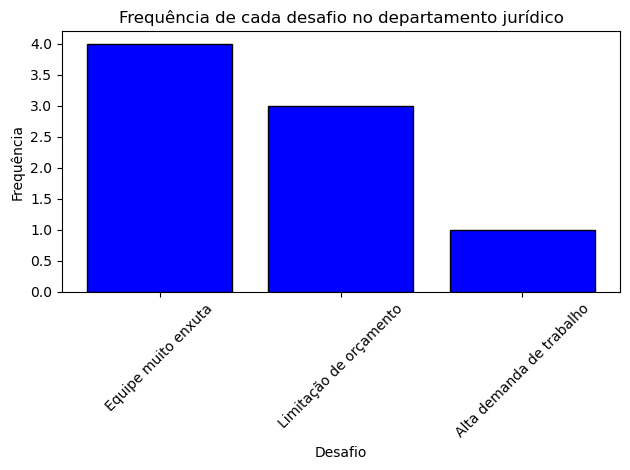

In [ ]:
q6_series = data_clientes_exclientes['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

Apesar de no overall a alta demanda de trabalho é a principal dor, as dos clientes da Vizeu na verdade é equipe muito enxuta

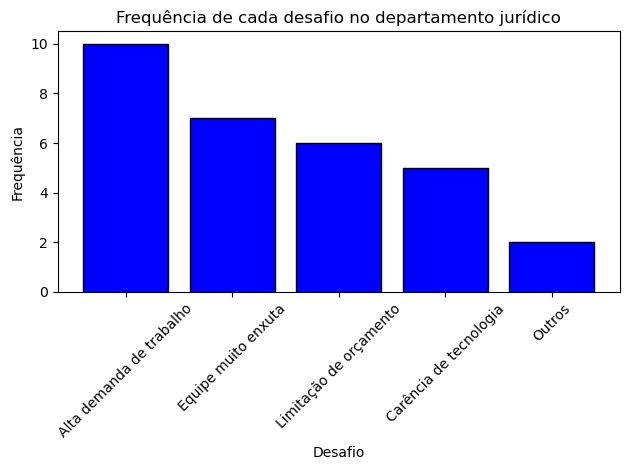

In [ ]:
q6_series = data_prospects['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

# Q9XQ11XTAG(Qual a experienca dos clientes da Vizeu? Eles pretendem contratar de novo?)

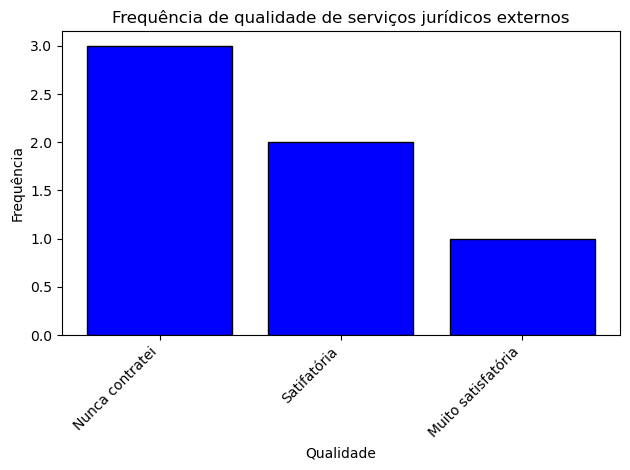

In [ ]:
q9_series = data_clientes_exclientes['Q9'].dropna().astype(str)
all_choices_q9 = []
for resp in q9_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q9.extend(choices)

counts_q9 = pd.Series(all_choices_q9).value_counts()
descricao_map_q9 = {
    '1': 'Nunca contratei',
    '2': 'Muito satisfatória',
    '3': 'Satifatória',
    '4': 'Insatisfatória'
}
counts_q9.index = counts_q9.index.map(descricao_map_q9)
plt.bar(counts_q9.index, counts_q9.values, color='blue', edgecolor='black')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Frequência de qualidade de serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Porque os clientes preencheram nunca contratei?

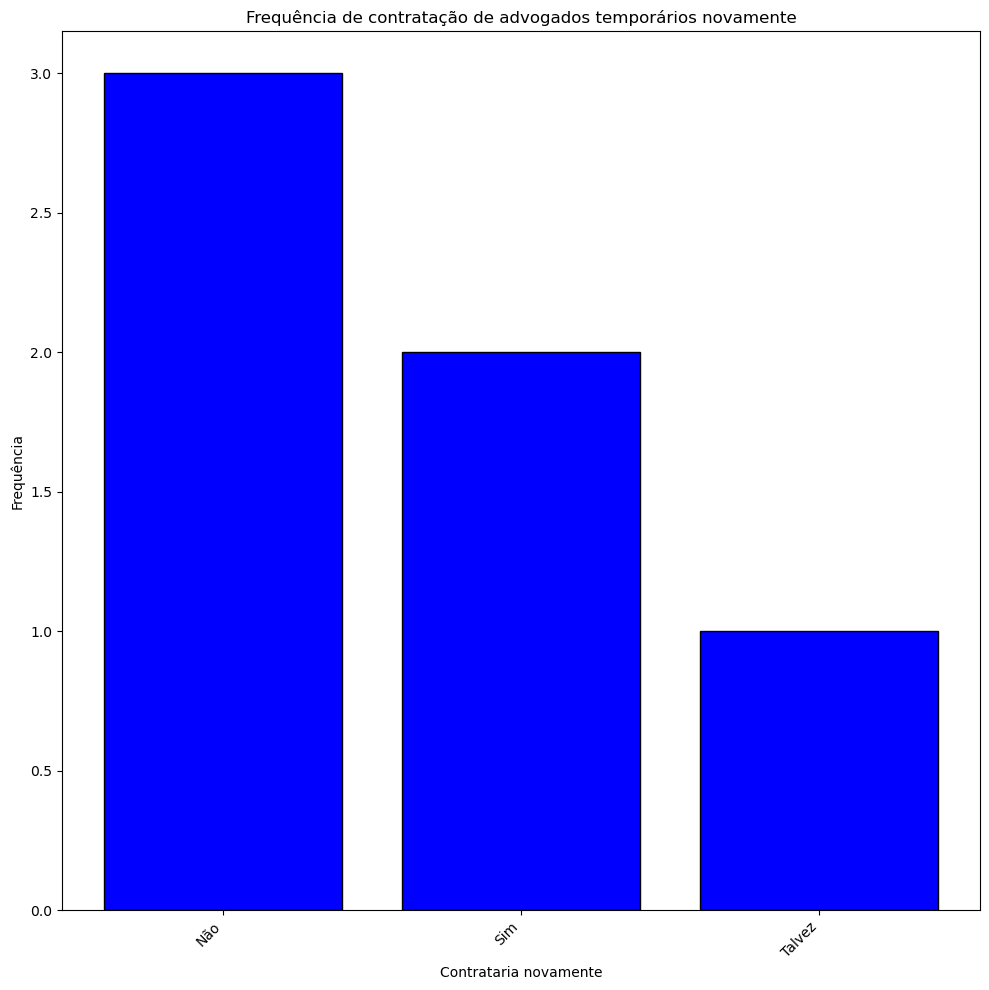

In [ ]:
q11_series = data_clientes_exclientes['Q11'].dropna().astype(str)
all_choices_q11 = []
for resp in q11_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q11.extend(choices)
counts_q11 = pd.Series(all_choices_q11).value_counts()
descricao_map_q11 = {
    '1': 'Sim',
    '2': 'Não',
    '3': 'Talvez',
}
counts_q11.index = counts_q11.index.map(descricao_map_q11)
plt.figure(figsize=(10,10))
plt.bar(counts_q11.index, counts_q11.values, color='blue', edgecolor='black')
plt.xlabel('Contrataria novamente')
plt.ylabel('Frequência')
plt.title('Frequência de contratação de advogados temporários novamente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_clientes_exclientes['Q11_2_TEXT'].value_counts()

Q11_2_TEXT
Não tenho interesse                                                                                      1
Prefiro uma pessoa que entenda melhor do business, que saiba das especificidades da área que atuamos.    1
é muito sensivel a inclusão no ambiente interno                                                          1
Name: count, dtype: int64

In [ ]:
data_clientes_exclientes['Q11_3_TEXT'].value_counts()

Q11_3_TEXT
Depende da demanda    1
Name: count, dtype: int64